In [1]:
from moviepy.editor import *

import srt,json
from tqdm import tqdm
from moviepy.video.tools.subtitles import TextClip,SubtitlesClip

In [2]:
import pickle

import os

def dump_pickle(file,dir):
    """
    cannot serialize a bytes object larger than 4 GiB
    """
    with open(dir,'wb') as f:
        pickle.dump(file,f,protocol=4)

def load_pickle(dir):
    with open(dir,'rb') as f:
        out_file = pickle.load(f)
    return out_file


def check_path(movie_name):
    
    for d in ['','srt','movie','imgs']:
        p = f"./data/{movie_name}/{d}"
        if not os.path.exists(p):
            os.mkdir(p)          

def extract_frames(movie,start,end,img_path='./data/imgs/'):
    # start = start.total_seconds()
    # end = end.total_seconds()
    time_gap = end - start
    time_mid =  (end - start)/2
    base_path = img_path + f'{start}_{end}'
    
    result_ls = []
    
    for i,t in enumerate([start,end,time_mid]):
        if i <= int(time_gap/2):
            movie.save_frame(base_path + f'_{i}.png',t = t)
            result_ls.append(base_path + f'_{i}.png')
    return result_ls

def process_subs(s):
    subs_dict = {}
    start = s.start.total_seconds()
    end = s.end.total_seconds()
    
    subs_dict["id"] = s.index
    subs_dict["start"] = start
    subs_dict["end"] = end
    subs_dict["content"] = s.content
    subs_dict["img_start"] = f"{start}_{end}"
    return subs_dict,start,end

def mian_process(movie_name, srt_file, video_file):

    # 读取视频文件
    movie = VideoFileClip(video_file)


    # 检查路径 
    check_path(movie_name)
    
    # 读取字幕文件
    with open(srt_file, 'r') as f:
        subs = srt.parse("".join(f.readlines()))
    
    subs_list = []
    img_path=f'./data/{movie_name}/imgs/'
    
    for s in tqdm(subs):
        subs_dict,start,end = process_subs(s)
        # 抽取每段字幕文件
        img_ls = extract_frames(movie,start,end,img_path)
        subs_dict['img_ls'] = img_ls
        subs_list.append(subs_dict)
    
    return subs_list

### 字幕处理

In [9]:
# 读取字幕文件
movie_name = "最初的梦想"
base_path = f'../data/{movie_name}'
srt_file_name = [f for f in os.listdir(base_path+"/srt") if f.split('.')[-1] in ["sub","srt","ssa","ass","txt"]][0]
video_file_name = [f for f in os.listdir(base_path+"/movie")][0]
srt_file = base_path + f'/srt/{srt_file_name}'
if srt_file.endswith(".ass"):
    convert_ass_to_srt(srt_file)
    srt_file = srt_file[:-4] + ".srt"
video_file = base_path + f'/movie/{video_file_name}'

In [4]:
def process_subs(s):
    subs_dict = {}
    start = s.start.total_seconds()
    end = s.end.total_seconds()
    
    subs_dict["id"] = s.index
    subs_dict["start"] = start
    subs_dict["end"] = end
    subs_dict["content"] = s.content
    subs_dict["img_start"] = f"{start}_{end}"
    return subs_dict,start,end

In [5]:
#字幕文件转换

In [6]:
# !pip install cchardet

In [7]:
from ass2srt.ass2srt import convert_ass_to_srt

In [8]:
convert_ass_to_srt(srt_file)

In [238]:
# 读取字幕文件
with open(srt_file, 'r') as f:
    subs = srt.parse("".join(f.readlines()))

In [239]:
for s in tqdm(subs):
    subs_dict,start,end = process_subs(s)
    # 抽取每段字幕文件
#     img_ls = extract_frames(movie,start,end,img_path)
#     subs_dict['img_ls'] = img_ls
    subs_list.append(subs_dict)

0it [00:00, ?it/s]

SRTParseError: Expected contiguous start of match or end of input at char 0, but started at char 132961 (unmatched content: '\ufeff[Script Info]\n;SrtEdit 6.3.2012.1001\n;Copyright(C) 2005-2012 Yuan Weiguo\n\nTitle: \nOriginal Script: \nOriginal Translation: \nOriginal Timing: \nOriginal Editing: \nScript Updated By: \nUpdate Details: \nScriptType: v4.00+\nCollisions: Normal\nPlayResX: 1920\nPlayResY: 1080\nTimer: 100.0000\nSynch Point: \nWrapStyle: 0\nScaledBorderAndShadow: yes\n\n[V4+ Styles]\nFormat: Name, Fontname, Fontsize, PrimaryColour, SecondaryColour, OutlineColour, BackColour, Bold, Italic, Underline, StrikeOut, ScaleX, ScaleY, Spacing, Angle, BorderStyle, Outline, Shadow, Alignment, MarginL, MarginR, MarginV, Encoding\nStyle: 黑边繁体,DFKai-SB,70,&H00CCCCCC,&H0000FFFF,&H00000000,&H00000000,0,0,0,0,100,100,0,0,0,1,2,2,0,0,145,1\nStyle: 黑边简体,FZYouH_509R,70,&H00CCCCCC,&H0000FFFF,&H00000000,&H00000000,0,0,0,0,100,100,0,0,0,1,2,2,0,0,145,134\nStyle: Default,Arial,18,&H00FFFFFF,&H0000FFFF,&H00000000,&H00000000,-1,0,0,0,100,100,0,0,1,2,3,2,20,20,20,1\n\n[Events]\nFormat: Layer, Start, End, Style, Name, MarginL, MarginR, MarginV, Effect, Text\n\n\nDialogue: 0,0:00:01.14,0:00:06.07,黑边简体,,0000,0000,0000,,（故事人物纯属虚构，如有雷同实属巧合）\nDialogue: 0,0:01:06.74,0:01:11.47,黑边简体,,0000,0000,0000,,（片名：万万没想到）\nDialogue: 0,0:01:12.21,0:01:16.31,黑边简体,,0000,0000,0000,,（四舍）\nDialogue: 0,0:01:39.84,0:01:43.24,黑边简体,,0000,0000,0000,,搞啥，半夜不穿衣服想吓谁？\nDialogue: 0,0:01:43.24,0:01:45.37,黑边简体,,0000,0000,0000,,来见你啊，宝贝\nDialogue: 0,0:01:46.11,0:01:47.37,黑边简体,,0000,0000,0000,,帮我装水水\nDialogue: 0,0:01:48.04,0:01:49.94,黑边简体,,0000,0000,0000,,- 打水仗？\u3000\\N- 好久没玩了\\N\nDialogue: 0,0:01:50.94,0:01:52.04,黑边简体,,0000,0000,0000,,正合我意\nDialogue: 0,0:01:52.67,0:01:55.27,黑边简体,,0000,0000,0000,,熬夜读量子物理闷爆了\nDialogue: 0,0:01:59.91,0:02:01.81,黑边简体,,0000,0000,0000,,第一个衰鬼是谁？\nDialogue: 0,0:02:01.81,0:02:06.97,黑边简体,,0000,0000,0000,,我们别找太好欺负的小孬孬\nDialogue: 0,0:02:07.01,0:02:10.01,黑边简体,,0000,0000,0000,,要找有仇必报、加倍奉还的人\nDialogue: 0,0:02:10.44,0:02:11.61,黑边简体,,0000,0000,0000,,我找到了\nDialogue: 0,0:02:12.54,0:02:13.44,黑边简体,,0000,0000,0000,,在哪里？\nDialogue: 0,0:02:13.44,0:02:14.27,黑边简体,,0000,0000,0000,,在这里\nDialogue: 0,0:02:16.34,0:02:17.44,黑边简体,,0000,0000,0000,,叛徒！\nDialogue: 0,0:02:17.97,0:02:21.87,黑边简体,,0000,0000,0000,,敢惹我算你狠，找死\nDialogue: 0,0:02:24.01,0:02:25.01,黑边简体,,0000,0000,0000,,你们在干嘛？\nDialogue: 0,0:02:25.01,0:02:26.27,黑边简体,,0000,0000,0000,,打水仗\nDialogue: 0,0:02:26.87,0:02:27.81,黑边简体,,0000,0000,0000,,快闪喔\nDialogue: 0,0:02:50.27,0:02:51.67,黑边简体,,0000,0000,0000,,逮住他\nDialogue: 0,0:03:25.51,0:03:27.54,黑边简体,,0000,0000,0000,,- 很爽吧，兄弟\\N- 不够爽\u3000\u3000\u3000\\N\nDialogue: 0,0:03:27.67,0:03:28.74,黑边简体,,0000,0000,0000,,杀去三舍\nDialogue: 0,0:03:28.74,0:03:32.71,黑边简体,,0000,0000,0000,,听说落汤“狗”会一秒娈疯狗\nDialogue: 0,0:03:33.64,0:03:35.27,黑边简体,,0000,0000,0000,,兄弟们\nDialogue: 0,0:03:37.07,0:03:38.07,黑边简体,,0000,0000,0000,,三舍\nDialogue: 0,0:03:38.07,0:03:39.14,黑边简体,,0000,0000,0000,,进攻！\nDialogue: 0,0:03:42.67,0:03:45.27,黑边简体,,0000,0000,0000,,（四舍）\nDialogue: 0,0:03:45.34,0:03:47.51,黑边简体,,0000,0000,0000,,（三舍）\nDialogue: 0,0:03:51.21,0:03:51.77,黑边简体,,0000,0000,0000,,是谁？\nDialogue: 0,0:03:52.67,0:03:54.61,黑边简体,,0000,0000,0000,,人家被你搞大肚子了\nDialogue: 0,0:03:55.01,0:03:56.27,黑边简体,,0000,0000,0000,,该死…\nDialogue: 0,0:04:01.24,0:04:04.17,黑边简体,,0000,0000,0000,,你想湿身还是湿房间？\nDialogue: 0,0:04:04.24,0:04:05.51,黑边简体,,0000,0000,0000,,- 警告你，阿尼\\N- 惦惦\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:04:08.24,0:04:10.27,黑边简体,,0000,0000,0000,,打爆他\nDialogue: 0,0:04:10.27,0:04:11.21,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,0:04:11.21,0:04:12.97,黑边简体,,0000,0000,0000,,- 使出吃奶的劲\\N- 好耶\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:04:12.97,0:04:14.74,黑边简体,,0000,0000,0000,,- 给他好看\\N- 好耶\u3000\u3000\\N\nDialogue: 0,0:04:14.74,0:04:16.61,黑边简体,,0000,0000,0000,,- 开战了\\N- 好耶\u3000\\N\nDialogue: 0,0:04:16.61,0:04:17.91,黑边简体,,0000,0000,0000,,该死的孬种\nDialogue: 0,0:04:26.67,0:04:27.97,黑边简体,,0000,0000,0000,,该死的鲁蛇\nDialogue: 0,0:04:28.84,0:04:30.64,黑边简体,,0000,0000,0000,,你才全家都鲁蛇\nDialogue: 0,0:04:35.81,0:04:39.74,黑边简体,,0000,0000,0000,,我们来继续回味90年代金曲\nDialogue: 0,0:04:39.74,0:04:41.54,黑边简体,,0000,0000,0000,,我是你的朋友\nDialogue: 0,0:04:52.91,0:04:54.31,黑边简体,,0000,0000,0000,,今天又加班？\nDialogue: 0,0:04:59.17,0:05:00.34,黑边简体,,0000,0000,0000,,要吃晚餐吗？\nDialogue: 0,0:05:00.61,0:05:02.77,黑边简体,,0000,0000,0000,,- 拉夫吃了吗？\\N- 还没\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:05:02.87,0:05:04.81,黑边简体,,0000,0000,0000,,自从大考后\nDialogue: 0,0:05:04.81,0:05:07.14,黑边简体,,0000,0000,0000,,他天天在担心成绩\nDialogue: 0,0:05:08.87,0:05:10.07,黑边简体,,0000,0000,0000,,他人呢？\nDialogue: 0,0:05:12.97,0:05:13.97,黑边简体,,0000,0000,0000,,帮他弄点吃的\nDialogue: 0,0:05:14.91,0:05:15.81,黑边简体,,0000,0000,0000,,你睡了吗？\nDialogue: 0,0:05:15.81,0:05:17.77,黑边简体,,0000,0000,0000,,被你吵醒了\nDialogue: 0,0:05:17.77,0:05:20.11,黑边简体,,0000,0000,0000,,我好焦虑，再让我问一次就好\nDialogue: 0,0:05:20.11,0:05:21.04,黑边简体,,0000,0000,0000,,又来了\nDialogue: 0,0:05:21.04,0:05:24.64,黑边简体,,0000,0000,0000,,“今年大考比较难？还是去年？”\nDialogue: 0,0:05:24.64,0:05:27.97,黑边简体,,0000,0000,0000,,“你数学考最好？还是大家都很好？”\nDialogue: 0,0:05:27.97,0:05:30.77,黑边简体,,0000,0000,0000,,“你物理考最差，还是大家一样烂？”\nDialogue: 0,0:05:30.77,0:05:32.47,黑边简体,,0000,0000,0000,,你想问这些吧？\nDialogue: 0,0:05:32.84,0:05:35.14,黑边简体,,0000,0000,0000,,抱歉，我有点担心\nDialogue: 0,0:05:35.14,0:05:36.31,黑边简体,,0000,0000,0000,,干嘛一个人烦恼？\nDialogue: 0,0:05:36.31,0:05:37.54,黑边简体,,0000,0000,0000,,我们把阿苏也吵醒\nDialogue: 0,0:05:37.84,0:05:39.17,黑边简体,,0000,0000,0000,,（拉夫来电）\nDialogue: 0,0:05:42.81,0:05:43.91,黑边简体,,0000,0000,0000,,喂，拉夫？\nDialogue: 0,0:05:43.91,0:05:44.91,黑边简体,,0000,0000,0000,,你睡了吗？\nDialogue: 0,0:05:44.91,0:05:47.81,黑边简体,,0000,0000,0000,,还没，我刚洗好澡\nDialogue: 0,0:05:47.81,0:05:48.47,黑边简体,,0000,0000,0000,,说吧\nDialogue: 0,0:05:48.47,0:05:50.64,黑边简体,,0000,0000,0000,,拉夫很担心成绩\nDialogue: 0,0:05:50.64,0:05:51.57,黑边简体,,0000,0000,0000,,劝劝他吧\nDialogue: 0,0:05:51.57,0:05:54.64,黑边简体,,0000,0000,0000,,虽然我们是随叩随到的兄弟\nDialogue: 0,0:05:54.64,0:05:56.51,黑边简体,,0000,0000,0000,,但交情再好也别太超过\nDialogue: 0,0:05:57.24,0:05:59.57,黑边简体,,0000,0000,0000,,考完就别想了\nDialogue: 0,0:05:59.57,0:06:01.34,黑边简体,,0000,0000,0000,,成绩几天后公布\nDialogue: 0,0:06:01.34,0:06:04.64,黑边简体,,0000,0000,0000,,很快就知道结果\nDialogue: 0,0:06:04.81,0:06:07.51,黑边简体,,0000,0000,0000,,拜托去睡觉，我们也要睡了\nDialogue: 0,0:06:13.84,0:06:14.67,黑边简体,,0000,0000,0000,,大少爷，怎么啦？\nDialogue: 0,0:06:18.61,0:06:22.27,黑边简体,,0000,0000,0000,,吃点东西吧\nDialogue: 0,0:06:22.27,0:06:24.57,黑边简体,,0000,0000,0000,,- 抱歉，爸\\N- 不必道歉\\N\nDialogue: 0,0:06:24.57,0:06:27.04,黑边简体,,0000,0000,0000,,过几天你就要住宿舍了\nDialogue: 0,0:06:27.44,0:06:29.77,黑边简体,,0000,0000,0000,,知道宿舍食物有多难吃吗？\nDialogue: 0,0:06:29.77,0:06:33.31,黑边简体,,0000,0000,0000,,你吐出来的，比吃进去的还多\nDialogue: 0,0:06:33.31,0:06:34.67,黑边简体,,0000,0000,0000,,这我都能忍，爸\nDialogue: 0,0:06:35.27,0:06:36.87,黑边简体,,0000,0000,0000,,只要能考上就好\nDialogue: 0,0:06:36.87,0:06:38.37,黑边简体,,0000,0000,0000,,你当然会考上\nDialogue: 0,0:06:39.27,0:06:40.71,黑边简体,,0000,0000,0000,,你很用功\nDialogue: 0,0:06:40.71,0:06:41.81,黑边简体,,0000,0000,0000,,考卷也写得很顺\nDialogue: 0,0:06:41.81,0:06:43.87,黑边简体,,0000,0000,0000,,不用担心啦\nDialogue: 0,0:06:44.44,0:06:45.64,黑边简体,,0000,0000,0000,,你以前都不担心吗？\nDialogue: 0,0:06:46.04,0:06:46.84,黑边简体,,0000,0000,0000,,别…\nDialogue: 0,0:06:46.84,0:06:48.71,黑边简体,,0000,0000,0000,,你根本不用担心\nDialogue: 0,0:06:48.71,0:06:49.87,黑边简体,,0000,0000,0000,,你是天才\nDialogue: 0,0:06:50.27,0:06:52.27,黑边简体,,0000,0000,0000,,全国排名384\nDialogue: 0,0:06:52.27,0:06:55.71,黑边简体,,0000,0000,0000,,我的排名能进2000就偷笑了\nDialogue: 0,0:06:55.71,0:06:57.94,黑边简体,,0000,0000,0000,,这两个月你心神不宁…\nDialogue: 0,0:06:57.94,0:06:59.97,黑边简体,,0000,0000,0000,,整天担心考试\nDialogue: 0,0:07:00.54,0:07:02.17,黑边简体,,0000,0000,0000,,你应该去交个女朋友\nDialogue: 0,0:07:02.74,0:07:05.31,黑边简体,,0000,0000,0000,,知道工学院女生多稀有吗？\nDialogue: 0,0:07:05.31,0:07:08.44,黑边简体,,0000,0000,0000,,- 你不就遇到妈了？\\N- 我运气好\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:07:08.81,0:07:11.61,黑边简体,,0000,0000,0000,,不是每个人都像你爸狗屎运\nDialogue: 0,0:07:11.61,0:07:13.87,黑边简体,,0000,0000,0000,,别想了，快吃\nDialogue: 0,0:07:26.64,0:07:29.04,黑边简体,,0000,0000,0000,,（我能做到，我会做到）\nDialogue: 0,0:07:29.04,0:07:30.47,黑边简体,,0000,0000,0000,,（行动才能让梦想成真）\nDialogue: 0,0:07:34.91,0:07:37.64,黑边简体,,0000,0000,0000,,你竟然亲自送我去妈家\nDialogue: 0,0:07:37.64,0:07:38.91,黑边简体,,0000,0000,0000,,怎么回事？\nDialogue: 0,0:07:40.14,0:07:42.14,黑边简体,,0000,0000,0000,,我想多陪陪你\nDialogue: 0,0:07:42.84,0:07:44.54,黑边简体,,0000,0000,0000,,你很快就要去住宿舍\nDialogue: 0,0:07:45.34,0:07:47.04,黑边简体,,0000,0000,0000,,你妈一定会霸占你一整天\nDialogue: 0,0:07:47.04,0:07:48.27,黑边简体,,0000,0000,0000,,别那样说\nDialogue: 0,0:07:48.87,0:07:50.54,黑边简体,,0000,0000,0000,,我也想见她\nDialogue: 0,0:07:50.54,0:07:54.14,黑边简体,,0000,0000,0000,,少来，你是想去吃好料吧\nDialogue: 0,0:07:54.14,0:07:55.07,黑边简体,,0000,0000,0000,,乱说\nDialogue: 0,0:07:55.07,0:07:56.74,黑边简体,,0000,0000,0000,,别以为我不知道\nDialogue: 0,0:07:56.74,0:07:58.84,黑边简体,,0000,0000,0000,,以前在宿舍，两杯奶昔就能贿赂人\nDialogue: 0,0:07:58.84,0:08:00.81,黑边简体,,0000,0000,0000,,如果你有更棒的提议\nDialogue: 0,0:08:00.81,0:08:01.54,黑边简体,,0000,0000,0000,,我就不去\nDialogue: 0,0:08:02.54,0:08:04.47,黑边简体,,0000,0000,0000,,你爸的绝招可多了\nDialogue: 0,0:08:04.81,0:08:05.81,黑边简体,,0000,0000,0000,,你知道的\nDialogue: 0,0:08:07.21,0:08:09.47,黑边简体,,0000,0000,0000,,去吧，哀怨老妈在等你\nDialogue: 0,0:08:09.67,0:08:11.91,黑边简体,,0000,0000,0000,,哀怨老妈，最好是\nDialogue: 0,0:08:12.57,0:08:16.01,黑边简体,,0000,0000,0000,,就算你们离婚，还是有感情\nDialogue: 0,0:08:18.31,0:08:18.94,黑边简体,,0000,0000,0000,,因为有你啊\nDialogue: 0,0:08:43.47,0:08:45.27,黑边简体,,0000,0000,0000,,至少打个招呼嘛\nDialogue: 0,0:08:45.27,0:08:47.64,黑边简体,,0000,0000,0000,,不了，你们自己聊吧\nDialogue: 0,0:08:49.27,0:08:50.47,黑边简体,,0000,0000,0000,,记住…\nDialogue: 0,0:08:51.27,0:08:52.77,黑边简体,,0000,0000,0000,,有好吃的要帮我外带\nDialogue: 0,0:08:53.84,0:08:54.64,黑边简体,,0000,0000,0000,,快去吧\nDialogue: 0,0:08:54.97,0:08:56.14,黑边简体,,0000,0000,0000,,开动吧\nDialogue: 0,0:09:02.34,0:09:03.91,黑边简体,,0000,0000,0000,,成绩几天后公布\nDialogue: 0,0:09:04.54,0:09:05.71,黑边简体,,0000,0000,0000,,所以呢？\nDialogue: 0,0:09:06.54,0:09:07.71,黑边简体,,0000,0000,0000,,你觉得呢？\nDialogue: 0,0:09:08.31,0:09:09.11,黑边简体,,0000,0000,0000,,我会考上吗？\nDialogue: 0,0:09:11.87,0:09:14.67,黑边简体,,0000,0000,0000,,说真的，你没考上也没关系\nDialogue: 0,0:09:16.24,0:09:17.61,黑边简体,,0000,0000,0000,,爸觉得我会上\nDialogue: 0,0:09:18.41,0:09:19.61,黑边简体,,0000,0000,0000,,他又来了\nDialogue: 0,0:09:22.07,0:09:25.77,黑边简体,,0000,0000,0000,,听着，别让他给你太多压力\nDialogue: 0,0:09:26.01,0:09:27.87,黑边简体,,0000,0000,0000,,他没给我压力\nDialogue: 0,0:09:28.67,0:09:30.51,黑边简体,,0000,0000,0000,,我很了解他\nDialogue: 0,0:09:30.51,0:09:33.74,黑边简体,,0000,0000,0000,,那你知道他爱吃秋葵吧？\nDialogue: 0,0:09:34.07,0:09:36.04,黑边简体,,0000,0000,0000,,当然，我有多做一份\nDialogue: 0,0:09:37.07,0:09:37.71,黑边简体,,0000,0000,0000,,爱你喔\nDialogue: 0,0:09:38.77,0:09:39.87,黑边简体,,0000,0000,0000,,老爸的应声虫\nDialogue: 0,0:09:48.14,0:09:49.61,黑边简体,,0000,0000,0000,,整天滑手机\nDialogue: 0,0:09:50.57,0:09:51.97,黑边简体,,0000,0000,0000,,儿子，还好吗？\nDialogue: 0,0:09:55.01,0:09:57.87,黑边简体,,0000,0000,0000,,- 这是给你的\\N- 哇\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:10:04.57,0:10:05.37,黑边简体,,0000,0000,0000,,等会儿再吃\nDialogue: 0,0:10:06.54,0:10:08.21,黑边简体,,0000,0000,0000,,看我买了什么给你\nDialogue: 0,0:10:13.81,0:10:15.81,黑边简体,,0000,0000,0000,,等你成绩公布\nDialogue: 0,0:10:16.14,0:10:18.07,黑边简体,,0000,0000,0000,,我们父子一起庆祝\nDialogue: 0,0:10:18.44,0:10:19.47,黑边简体,,0000,0000,0000,,把这瓶干掉\nDialogue: 0,0:10:21.84,0:10:23.81,黑边简体,,0000,0000,0000,,爸，你这样我压力好大\nDialogue: 0,0:10:23.81,0:10:27.97,黑边简体,,0000,0000,0000,,乱说，喝酒很纾压的好吗\nDialogue: 0,0:10:31.67,0:10:35.04,黑边简体,,0000,0000,0000,,你离家后我只剩回忆了\nDialogue: 0,0:10:44.07,0:10:45.94,黑边简体,,0000,0000,0000,,一切会很好的\nDialogue: 0,0:10:46.71,0:10:47.57,黑边简体,,0000,0000,0000,,开心点\nDialogue: 0,0:11:03.71,0:11:04.44,黑边简体,,0000,0000,0000,,碰！\nDialogue: 0,0:11:06.11,0:11:09.44,黑边简体,,0000,0000,0000,,仿佛昨日\nDialogue: 0,0:11:14.97,0:11:18.07,黑边简体,,0000,0000,0000,,仿佛昨日\nDialogue: 0,0:11:18.07,0:11:25.94,黑边简体,,0000,0000,0000,,当我第一次拥你入怀\nDialogue: 0,0:11:28.34,0:11:32.47,黑边简体,,0000,0000,0000,,前所未有的感觉\nDialogue: 0,0:11:33.57,0:11:41.77,黑边简体,,0000,0000,0000,,因你而涌现\nDialogue: 0,0:11:47.67,0:11:51.34,黑边简体,,0000,0000,0000,,你的笑容\nDialogue: 0,0:11:51.34,0:11:52.24,黑边简体,,0000,0000,0000,,好棒棒？\nDialogue: 0,0:11:52.24,0:11:56.64,黑边简体,,0000,0000,0000,,就像上天的礼物\nDialogue: 0,0:11:56.64,0:12:04.51,黑边简体,,0000,0000,0000,,你没出声，但眼睛会说话\nDialogue: 0,0:12:04.51,0:12:13.61,黑边简体,,0000,0000,0000,,我的孤寂生活，有你注入欢乐\nDialogue: 0,0:12:13.61,0:12:21.67,黑边简体,,0000,0000,0000,,当我第一次拥你入怀\nDialogue: 0,0:12:21.67,0:12:24.67,黑边简体,,0000,0000,0000,,仿佛昨日\nDialogue: 0,0:12:24.67,0:12:25.61,黑边简体,,0000,0000,0000,,真好喝\nDialogue: 0,0:12:30.54,0:12:34.21,黑边简体,,0000,0000,0000,,仿佛昨日\nDialogue: 0,0:12:37.27,0:12:41.44,黑边简体,,0000,0000,0000,,仿佛昨日\nDialogue: 0,0:12:41.47,0:12:43.11,黑边简体,,0000,0000,0000,,（2018联考成绩查询）\nDialogue: 0,0:12:45.67,0:12:47.34,黑边简体,,0000,0000,0000,,干嘛？这么紧张？\nDialogue: 0,0:12:48.11,0:12:49.01,黑边简体,,0000,0000,0000,,你帮我查\nDialogue: 0,0:12:49.01,0:12:51.37,黑边简体,,0000,0000,0000,,没问题，冷静\nDialogue: 0,0:12:58.21,0:12:59.41,黑边简体,,0000,0000,0000,,（再接再厉！）\nDialogue: 0,0:13:02.77,0:13:03.81,黑边简体,,0000,0000,0000,,结果呢？\nDialogue: 0,0:13:19.97,0:13:21.14,黑边简体,,0000,0000,0000,,（再接再厉！）\nDialogue: 0,0:13:27.47,0:13:29.47,黑边简体,,0000,0000,0000,,你明明考得很好\nDialogue: 0,0:13:34.94,0:13:36.94,黑边简体,,0000,0000,0000,,（再接再厉！）\nDialogue: 0,0:13:44.17,0:13:46.34,黑边简体,,0000,0000,0000,,我很担心，安尼鲁\nDialogue: 0,0:13:46.34,0:13:48.01,黑边简体,,0000,0000,0000,,我刚打给拉夫\nDialogue: 0,0:13:48.71,0:13:49.84,黑边简体,,0000,0000,0000,,他一直在哭\nDialogue: 0,0:13:49.84,0:13:51.24,黑边简体,,0000,0000,0000,,我有劝他看开点\nDialogue: 0,0:13:51.84,0:13:53.31,黑边简体,,0000,0000,0000,,他听不进去\nDialogue: 0,0:13:57.87,0:13:59.44,黑边简体,,0000,0000,0000,,我尽力了\nDialogue: 0,0:14:00.27,0:14:02.71,黑边简体,,0000,0000,0000,,我放弃一切，每天读书18小时\nDialogue: 0,0:14:03.61,0:14:05.01,黑边简体,,0000,0000,0000,,还是没考上\nDialogue: 0,0:14:05.01,0:14:07.24,黑边简体,,0000,0000,0000,,今年没上，明年再考\nDialogue: 0,0:14:07.24,0:14:08.87,黑边简体,,0000,0000,0000,,不是每个人都一次考上\nDialogue: 0,0:14:08.87,0:14:11.11,黑边简体,,0000,0000,0000,,你怎么老是那么轻松？\nDialogue: 0,0:14:11.12,0:14:13.11,黑边简体,,0000,0000,0000,,你怎么老是那么严肃？\nDialogue: 0,0:14:14.37,0:14:17.91,黑边简体,,0000,0000,0000,,阿沙排名都吊车尾\nDialogue: 0,0:14:17.91,0:14:20.24,黑边简体,,0000,0000,0000,,连他都考上了\nDialogue: 0,0:14:21.57,0:14:23.11,黑边简体,,0000,0000,0000,,大家一定会笑我\nDialogue: 0,0:14:23.37,0:14:23.97,黑边简体,,0000,0000,0000,,拉夫\nDialogue: 0,0:14:23.97,0:14:26.81,黑边简体,,0000,0000,0000,,我要怎么面对爸妈？\nDialogue: 0,0:14:26.81,0:14:28.94,黑边简体,,0000,0000,0000,,我要去找他了，你要过来吗？\nDialogue: 0,0:14:28.94,0:14:31.51,黑边简体,,0000,0000,0000,,我剩一场会议，开完就去\nDialogue: 0,0:14:31.51,0:14:33.64,黑边简体,,0000,0000,0000,,继续开你的会吧\nDialogue: 0,0:14:38.54,0:14:41.87,黑边简体,,0000,0000,0000,,我爸妈都是学霸\nDialogue: 0,0:14:42.71,0:14:43.91,黑边简体,,0000,0000,0000,,儿子却是鲁蛇\nDialogue: 0,0:14:43.91,0:14:46.71,黑边简体,,0000,0000,0000,,拉夫，冷静点\nDialogue: 0,0:14:46.97,0:14:48.17,黑边简体,,0000,0000,0000,,你不懂啦\nDialogue: 0,0:14:53.41,0:14:55.74,黑边简体,,0000,0000,0000,,我这辈子注定是鲁蛇\nDialogue: 0,0:14:56.31,0:14:57.84,黑边简体,,0000,0000,0000,,你想太多了\nDialogue: 0,0:15:00.14,0:15:01.04,黑边简体,,0000,0000,0000,,不\nDialogue: 0,0:15:03.84,0:15:05.01,黑边简体,,0000,0000,0000,,一切都没救了\nDialogue: 0,0:15:07.87,0:15:09.17,黑边简体,,0000,0000,0000,,都没救了\nDialogue: 0,0:15:20.97,0:15:21.84,黑边简体,,0000,0000,0000,,拉夫！\nDialogue: 0,0:15:23.47,0:15:24.74,黑边简体,,0000,0000,0000,,拉夫！\nDialogue: 0,0:15:31.04,0:15:33.77,黑边简体,,0000,0000,0000,,“（拉夫来电）每季我们都一定要评估”\nDialogue: 0,0:15:33.77,0:15:35.17,黑边简体,,0000,0000,0000,,我们要确保…\nDialogue: 0,0:15:35.37,0:15:36.54,黑边简体,,0000,0000,0000,,不好意思\nDialogue: 0,0:15:39.47,0:15:41.07,黑边简体,,0000,0000,0000,,儿子，我在开会，再打给你\nDialogue: 0,0:15:41.07,0:15:42.61,黑边简体,,0000,0000,0000,,叔叔，拉夫他…\nDialogue: 0,0:15:44.74,0:15:47.27,黑边简体,,0000,0000,0000,,拉夫跳楼了\nDialogue: 0,0:15:47.27,0:15:47.91,黑边简体,,0000,0000,0000,,什么？\nDialogue: 0,0:15:48.31,0:15:50.34,黑边简体,,0000,0000,0000,,我叫救护车了\nDialogue: 0,0:16:07.87,0:16:08.97,黑边简体,,0000,0000,0000,,怎么会这样？\nDialogue: 0,0:16:10.57,0:16:12.41,黑边简体,,0000,0000,0000,,叔叔，他很难过\nDialogue: 0,0:16:14.67,0:16:17.24,黑边简体,,0000,0000,0000,,他说大家会叫他鲁蛇\nDialogue: 0,0:16:19.21,0:16:21.07,黑边简体,,0000,0000,0000,,我一直安慰他\nDialogue: 0,0:16:21.71,0:16:24.27,黑边简体,,0000,0000,0000,,还来不及反应，他就跳下去了\nDialogue: 0,0:16:26.77,0:16:28.67,黑边简体,,0000,0000,0000,,对不起，叔叔\nDialogue: 0,0:16:41.94,0:16:43.64,黑边简体,,0000,0000,0000,,都是我的错\nDialogue: 0,0:16:44.87,0:16:47.34,黑边简体,,0000,0000,0000,,我不该把拉夫的监护权交给你\nDialogue: 0,0:16:49.97,0:16:53.14,黑边简体,,0000,0000,0000,,你把一切怪到我头上？\nDialogue: 0,0:16:53.21,0:16:57.44,黑边简体,,0000,0000,0000,,你根本不懂他压力多大\nDialogue: 0,0:16:58.81,0:17:00.77,黑边简体,,0000,0000,0000,,他压力大到想自杀\nDialogue: 0,0:17:00.77,0:17:02.64,黑边简体,,0000,0000,0000,,玛雅，我没想到…\nDialogue: 0,0:17:03.31,0:17:05.24,黑边简体,,0000,0000,0000,,他竟然会想不开\nDialogue: 0,0:17:05.41,0:17:06.74,黑边简体,,0000,0000,0000,,阿尼，你哪会想到\nDialogue: 0,0:17:07.27,0:17:09.61,黑边简体,,0000,0000,0000,,你只顾着开会和工作\nDialogue: 0,0:17:09.67,0:17:12.81,黑边简体,,0000,0000,0000,,你都不懂我了，怎么可能懂儿子\nDialogue: 0,0:17:13.01,0:17:15.61,黑边简体,,0000,0000,0000,,拜托小声点，别人会听到\nDialogue: 0,0:17:16.14,0:17:17.21,黑边简体,,0000,0000,0000,,听到又怎样\nDialogue: 0,0:17:17.71,0:17:20.64,黑边简体,,0000,0000,0000,,就让大家知道你是失职老爸\nDialogue: 0,0:17:21.14,0:17:23.91,黑边简体,,0000,0000,0000,,- 你害我儿子…\\N- 别说了\u3000\u3000\u3000\\N\nDialogue: 0,0:17:25.94,0:17:27.97,黑边简体,,0000,0000,0000,,我们的儿子没死\nDialogue: 0,0:17:52.74,0:17:53.97,黑边简体,,0000,0000,0000,,不好意思\nDialogue: 0,0:17:56.14,0:17:57.24,黑边简体,,0000,0000,0000,,请两位跟我来\nDialogue: 0,0:17:57.51,0:18:00.24,黑边简体,,0000,0000,0000,,我无法保证令郎会没事\nDialogue: 0,0:18:02.97,0:18:07.24,黑边简体,,0000,0000,0000,,他的脑部严重损伤\nDialogue: 0,0:18:08.27,0:18:10.74,黑边简体,,0000,0000,0000,,多处器官受损\nDialogue: 0,0:18:13.11,0:18:17.71,黑边简体,,0000,0000,0000,,目前手术止住内出血\nDialogue: 0,0:18:18.21,0:18:20.47,黑边简体,,0000,0000,0000,,也移除了脑部血块\nDialogue: 0,0:18:21.11,0:18:22.47,黑边简体,,0000,0000,0000,,但没这么简单\nDialogue: 0,0:18:25.51,0:18:27.57,黑边简体,,0000,0000,0000,,他的脑部有挫伤\nDialogue: 0,0:18:28.07,0:18:30.51,黑边简体,,0000,0000,0000,,如果挫伤扩大\nDialogue: 0,0:18:31.61,0:18:33.47,黑边简体,,0000,0000,0000,,脑水肿会越来越严重\nDialogue: 0,0:18:34.11,0:18:37.91,黑边简体,,0000,0000,0000,,就要再动一次手术\nDialogue: 0,0:18:39.47,0:18:43.34,黑边简体,,0000,0000,0000,,他要待在加护病房观察\nDialogue: 0,0:18:44.34,0:18:46.11,黑边简体,,0000,0000,0000,,直到状况稳定下来\nDialogue: 0,0:18:47.91,0:18:49.47,黑边简体,,0000,0000,0000,,他的伤势很严重\nDialogue: 0,0:18:51.34,0:18:52.61,黑边简体,,0000,0000,0000,,但他会活下来，对吧？\nDialogue: 0,0:18:54.21,0:18:55.84,黑边简体,,0000,0000,0000,,我们会尽全力\nDialogue: 0,0:19:01.07,0:19:04.87,黑边简体,,0000,0000,0000,,医生，我们能见他吗？\nDialogue: 0,0:19:05.11,0:19:06.41,黑边简体,,0000,0000,0000,,拜托，一下就好\nDialogue: 0,0:19:15.24,0:19:16.51,黑边简体,,0000,0000,0000,,我不忍心看他\nDialogue: 0,0:19:17.51,0:19:18.64,黑边简体,,0000,0000,0000,,你去吧\nDialogue: 0,0:19:47.37,0:19:49.64,黑边简体,,0000,0000,0000,,这不公平\nDialogue: 0,0:19:49.64,0:19:50.84,黑边简体,,0000,0000,0000,,拉夫\nDialogue: 0,0:19:51.74,0:19:54.47,黑边简体,,0000,0000,0000,,我好想骂你一顿\nDialogue: 0,0:19:55.24,0:19:57.84,黑边简体,,0000,0000,0000,,我忍受你闭关两年\nDialogue: 0,0:20:03.97,0:20:05.64,黑边简体,,0000,0000,0000,,“爸，我有模拟考”\nDialogue: 0,0:20:06.71,0:20:08.34,黑边简体,,0000,0000,0000,,“我不能看电影”\nDialogue: 0,0:20:09.47,0:20:14.14,黑边简体,,0000,0000,0000,,“爸，考完试再去度假”\nDialogue: 0,0:20:14.27,0:20:16.54,黑边简体,,0000,0000,0000,,“爸，我要跟同学去读书”\nDialogue: 0,0:20:16.54,0:20:19.14,黑边简体,,0000,0000,0000,,“我没空跟你聊天”\nDialogue: 0,0:20:19.27,0:20:20.74,黑边简体,,0000,0000,0000,,开什么玩笑\nDialogue: 0,0:20:21.64,0:20:25.51,黑边简体,,0000,0000,0000,,老爸苦等你两年\nDialogue: 0,0:20:28.24,0:20:31.21,黑边简体,,0000,0000,0000,,我还要等多久？\nDialogue: 0,0:20:32.97,0:20:33.87,黑边简体,,0000,0000,0000,,可恶\nDialogue: 0,0:21:15.21,0:21:16.51,黑边简体,,0000,0000,0000,,医生？\nDialogue: 0,0:21:17.24,0:21:18.27,黑边简体,,0000,0000,0000,,坚强点\nDialogue: 0,0:21:45.57,0:21:47.07,黑边简体,,0000,0000,0000,,护士，怎么了？\nDialogue: 0,0:21:47.37,0:21:49.47,黑边简体,,0000,0000,0000,,感染引发败血症\nDialogue: 0,0:21:50.24,0:21:52.24,黑边简体,,0000,0000,0000,,导致他的肾脏衰竭\nDialogue: 0,0:21:52.24,0:21:53.77,黑边简体,,0000,0000,0000,,所以要洗肾\nDialogue: 0,0:21:54.24,0:21:55.14,黑边简体,,0000,0000,0000,,失陪了\nDialogue: 0,0:21:56.14,0:21:58.04,黑边简体,,0000,0000,0000,,我知道你很担心，帕克先生\nDialogue: 0,0:21:58.87,0:22:01.47,黑边简体,,0000,0000,0000,,但医学能做的有限\nDialogue: 0,0:22:02.47,0:22:04.51,黑边简体,,0000,0000,0000,,病患也要努力\nDialogue: 0,0:22:06.11,0:22:08.84,黑边简体,,0000,0000,0000,,拉夫的身体没有回应\nDialogue: 0,0:22:10.61,0:22:15.77,黑边简体,,0000,0000,0000,,很多重伤病患能活下来\nDialogue: 0,0:22:18.01,0:22:19.47,黑边简体,,0000,0000,0000,,是因为求生意志很强\nDialogue: 0,0:22:20.57,0:22:23.07,黑边简体,,0000,0000,0000,,你们儿子刚好相反\nDialogue: 0,0:22:23.24,0:22:24.27,黑边简体,,0000,0000,0000,,看来…\nDialogue: 0,0:22:26.17,0:22:27.41,黑边简体,,0000,0000,0000,,他并不想活下去\nDialogue: 0,0:22:30.24,0:22:31.64,黑边简体,,0000,0000,0000,,这不是好现象\nDialogue: 0,0:22:38.01,0:22:40.91,黑边简体,,0000,0000,0000,,看来…他并不想活下去\nDialogue: 0,0:22:41.51,0:22:43.27,黑边简体,,0000,0000,0000,,这不是好现象\nDialogue: 0,0:22:45.27,0:22:47.84,黑边简体,,0000,0000,0000,,他说大家会叫他鲁蛇\nDialogue: 0,0:22:48.47,0:22:50.11,黑边简体,,0000,0000,0000,,该死的鲁蛇\nDialogue: 0,0:22:50.27,0:22:52.01,黑边简体,,0000,0000,0000,,你才全家都鲁蛇\nDialogue: 0,0:23:33.11,0:23:37.27,黑边简体,,0000,0000,0000,,（鲁蛇帮）\nDialogue: 0,0:23:52.61,0:23:53.64,黑边简体,,0000,0000,0000,,你…\nDialogue: 0,0:23:54.84,0:23:56.97,黑边简体,,0000,0000,0000,,你知道这是馊主意吧？\nDialogue: 0,0:24:00.84,0:24:02.24,黑边简体,,0000,0000,0000,,我不知道，玛雅\nDialogue: 0,0:24:03.64,0:24:05.27,黑边简体,,0000,0000,0000,,我只知道…\nDialogue: 0,0:24:06.27,0:24:09.41,黑边简体,,0000,0000,0000,,他怕当鲁蛇，所以不想活了\nDialogue: 0,0:24:09.77,0:24:12.87,黑边简体,,0000,0000,0000,,没人比我们更懂这种感觉\nDialogue: 0,0:24:12.91,0:24:15.61,黑边简体,,0000,0000,0000,,我们被贴过鲁蛇标签\nDialogue: 0,0:24:15.61,0:24:16.97,黑边简体,,0000,0000,0000,,但我们也把标签撕掉\nDialogue: 0,0:24:17.47,0:24:19.24,黑边简体,,0000,0000,0000,,你要怎么告诉他？\nDialogue: 0,0:24:19.24,0:24:20.27,黑边简体,,0000,0000,0000,,他听得到吗？\nDialogue: 0,0:24:21.74,0:24:22.84,黑边简体,,0000,0000,0000,,我不知道\nDialogue: 0,0:24:23.11,0:24:24.87,黑边简体,,0000,0000,0000,,你简直疯了\nDialogue: 0,0:24:34.14,0:24:36.27,黑边简体,,0000,0000,0000,,儿子，你觉得你是鲁蛇？\nDialogue: 0,0:24:38.21,0:24:41.01,黑边简体,,0000,0000,0000,,你爸当年才是真正的鲁蛇\nDialogue: 0,0:24:42.41,0:24:47.64,黑边简体,,0000,0000,0000,,老爸这辈子最美好的时光\nDialogue: 0,0:24:49.14,0:24:50.77,黑边简体,,0000,0000,0000,,都是和一群鲁蛇度过的\nDialogue: 0,0:24:59.24,0:25:01.74,黑边简体,,0000,0000,0000,,孟买国立理工大学\nDialogue: 0,0:25:01.74,0:25:03.51,黑边简体,,0000,0000,0000,,印度最顶尖的工学院\nDialogue: 0,0:25:04.37,0:25:07.24,黑边简体,,0000,0000,0000,,听说进了这里，人生就会改变\nDialogue: 0,0:25:07.74,0:25:10.41,黑边简体,,0000,0000,0000,,当时我还不知人生竟会如此不同\nDialogue: 0,0:25:12.11,0:25:13.24,黑边简体,,0000,0000,0000,,下一个\nDialogue: 0,0:25:14.04,0:25:14.74,黑边简体,,0000,0000,0000,,安尼鲁帕克\nDialogue: 0,0:25:15.27,0:25:16.37,黑边简体,,0000,0000,0000,,阿尼\nDialogue: 0,0:25:16.37,0:25:19.24,黑边简体,,0000,0000,0000,,- 阿尼\u3000\u3000\u3000\u3000\u3000\u3000\u3000\\N- 不是，是安尼鲁帕克\\N\nDialogue: 0,0:25:19.74,0:25:21.27,黑边简体,,0000,0000,0000,,宿舍就是这样，孩子\nDialogue: 0,0:25:21.27,0:25:23.34,黑边简体,,0000,0000,0000,,戴希潘就叫阿潘\nDialogue: 0,0:25:23.34,0:25:24.74,黑边简体,,0000,0000,0000,,保瓦登就叫保庇\nDialogue: 0,0:25:24.74,0:25:26.74,黑边简体,,0000,0000,0000,,- 乔德里就叫乔仔\\N- 好啦\u3000\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:25:26.74,0:25:30.51,黑边简体,,0000,0000,0000,,- 麻烦了\\N- 阿尼…\\N\nDialogue: 0,0:25:30.51,0:25:31.71,黑边简体,,0000,0000,0000,,你惨了…\nDialogue: 0,0:25:32.77,0:25:33.84,黑边简体,,0000,0000,0000,,怎样？我不在名单上？\nDialogue: 0,0:25:33.84,0:25:36.01,黑边简体,,0000,0000,0000,,不在名单上还比较好\nDialogue: 0,0:25:36.01,0:25:36.61,黑边简体,,0000,0000,0000,,为什么？\nDialogue: 0,0:25:36.61,0:25:39.47,黑边简体,,0000,0000,0000,,因为你被分配到第四宿舍\nDialogue: 0,0:25:39.87,0:25:40.51,黑边简体,,0000,0000,0000,,所以咧？\nDialogue: 0,0:25:40.51,0:25:45.27,黑边简体,,0000,0000,0000,,全校最废、最没前途又…\nDialogue: 0,0:25:45.77,0:25:48.91,黑边简体,,0000,0000,0000,,- 最逊？\u3000\u3000\u3000\u3000\u3000\\N- 对，逊咖都在四舍\\N\nDialogue: 0,0:25:48.91,0:25:51.47,黑边简体,,0000,0000,0000,,全校都叫他们鲁蛇\nDialogue: 0,0:25:51.91,0:25:52.74,黑边简体,,0000,0000,0000,,鲁蛇？\nDialogue: 0,0:25:52.74,0:25:57.14,黑边简体,,0000,0000,0000,,你最好到隔壁柜台申请换宿舍\nDialogue: 0,0:25:57.24,0:25:58.41,黑边简体,,0000,0000,0000,,（换宿舍申请柜台）\nDialogue: 0,0:25:58.41,0:26:01.24,黑边简体,,0000,0000,0000,,运气好就能换\nDialogue: 0,0:26:01.34,0:26:02.27,黑边简体,,0000,0000,0000,,不然咧？\nDialogue: 0,0:26:02.41,0:26:04.11,黑边简体,,0000,0000,0000,,你的人生从此走下坡\nDialogue: 0,0:26:04.11,0:26:06.71,黑边简体,,0000,0000,0000,,老兄，我疯起来也是很可怕的\nDialogue: 0,0:26:06.71,0:26:07.84,黑边简体,,0000,0000,0000,,四舍没啥大不了\nDialogue: 0,0:26:07.84,0:26:08.97,黑边简体,,0000,0000,0000,,祝福你啰\nDialogue: 0,0:26:09.71,0:26:11.57,黑边简体,,0000,0000,0000,,很快你就会懂\nDialogue: 0,0:26:11.57,0:26:12.84,黑边简体,,0000,0000,0000,,你试试看就知道了\nDialogue: 0,0:26:12.84,0:26:14.74,黑边简体,,0000,0000,0000,,你会哭着跑回来，隔壁柜台等你喔\nDialogue: 0,0:26:16.21,0:26:20.37,黑边简体,,0000,0000,0000,,天晓得四舍到底有多糟\nDialogue: 0,0:26:21.87,0:26:23.97,黑边简体,,0000,0000,0000,,捧油，来表演菜鸟出糗啊\nDialogue: 0,0:26:26.61,0:26:27.77,黑边简体,,0000,0000,0000,,门票收多少？\nDialogue: 0,0:26:27.77,0:26:29.11,黑边简体,,0000,0000,0000,,你们在干嘛？\nDialogue: 0,0:26:30.91,0:26:32.47,黑边简体,,0000,0000,0000,,先生，林志零来了\nDialogue: 0,0:26:36.21,0:26:36.97,黑边简体,,0000,0000,0000,,死兔崽子\nDialogue: 0,0:26:38.71,0:26:39.34,黑边简体,,0000,0000,0000,,快走\nDialogue: 0,0:26:41.01,0:26:41.84,黑边简体,,0000,0000,0000,,喂\nDialogue: 0,0:26:50.47,0:26:52.04,黑边简体,,0000,0000,0000,,他们是四舍的学长\nDialogue: 0,0:26:56.61,0:26:58.11,黑边简体,,0000,0000,0000,,我家浴室都比这里大\nDialogue: 0,0:26:58.37,0:27:00.27,黑边简体,,0000,0000,0000,,这是四舍的房间\nDialogue: 0,0:27:02.11,0:27:04.27,黑边简体,,0000,0000,0000,,这是四舍的食物\nDialogue: 0,0:27:06.77,0:27:09.24,黑边简体,,0000,0000,0000,,请问这是马铃薯还是南瓜？\nDialogue: 0,0:27:09.24,0:27:11.11,黑边简体,,0000,0000,0000,,吃吃看就知道啰\nDialogue: 0,0:27:11.11,0:27:13.01,黑边简体,,0000,0000,0000,,于是，我受够了\nDialogue: 0,0:27:13.11,0:27:15.14,黑边简体,,0000,0000,0000,,（换宿舍申请柜台）\nDialogue: 0,0:27:22.71,0:27:24.74,黑边简体,,0000,0000,0000,,我最怕两件事\nDialogue: 0,0:27:24.91,0:27:28.87,黑边简体,,0000,0000,0000,,- 第一，不能换宿舍怎么办？\\N- 菜鸟\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:27:29.47,0:27:33.47,黑边简体,,0000,0000,0000,,第二，换宿舍前会有什么下场？\nDialogue: 0,0:27:33.97,0:27:35.27,黑边简体,,0000,0000,0000,,他们会揍扁你\nDialogue: 0,0:27:35.34,0:27:38.11,黑边简体,,0000,0000,0000,,会逼你尿在暖炉上\nDialogue: 0,0:27:38.11,0:27:40.11,黑边简体,,0000,0000,0000,,要你脱光坐在酒瓶上\nDialogue: 0,0:27:41.24,0:27:42.24,黑边简体,,0000,0000,0000,,过来\nDialogue: 0,0:27:43.47,0:27:44.97,黑边简体,,0000,0000,0000,,你是美人鱼\nDialogue: 0,0:27:45.51,0:27:46.97,黑边简体,,0000,0000,0000,,你是大鸟\nDialogue: 0,0:27:46.97,0:27:48.71,黑边简体,,0000,0000,0000,,大鸟爱上美人鱼\nDialogue: 0,0:27:56.71,0:27:58.51,黑边简体,,0000,0000,0000,,你笑什么笑？\nDialogue: 0,0:27:58.51,0:27:59.54,黑边简体,,0000,0000,0000,,过来\nDialogue: 0,0:28:00.87,0:28:02.11,黑边简体,,0000,0000,0000,,报上名来\nDialogue: 0,0:28:02.11,0:28:03.61,黑边简体,,0000,0000,0000,,安尼鲁帕克，阿尼\nDialogue: 0,0:28:03.61,0:28:05.97,黑边简体,,0000,0000,0000,,好，阿尼，跳钢管舞\nDialogue: 0,0:28:05.97,0:28:06.87,黑边简体,,0000,0000,0000,,阿丹\nDialogue: 0,0:28:07.11,0:28:08.11,黑边简体,,0000,0000,0000,,你当钢管\nDialogue: 0,0:28:09.47,0:28:10.64,黑边简体,,0000,0000,0000,,跳吧，阿尼\nDialogue: 0,0:28:16.37,0:28:20.84,黑边简体,,0000,0000,0000,,我以为跳完舞会被揍\nDialogue: 0,0:28:20.84,0:28:21.97,黑边简体,,0000,0000,0000,,卡\nDialogue: 0,0:28:23.84,0:28:25.07,黑边简体,,0000,0000,0000,,这叫钢管舞？\nDialogue: 0,0:28:25.71,0:28:26.64,黑边简体,,0000,0000,0000,,我…\nDialogue: 0,0:28:27.37,0:28:28.34,黑边简体,,0000,0000,0000,,闪开\nDialogue: 0,0:28:28.57,0:28:29.47,黑边简体,,0000,0000,0000,,我教你怎么跳啦\nDialogue: 0,0:28:29.47,0:28:33.47,黑边简体,,0000,0000,0000,,但可怕的霸凌从没发生\nDialogue: 0,0:28:34.04,0:28:34.77,黑边简体,,0000,0000,0000,,下音乐\nDialogue: 0,0:28:42.01,0:28:44.47,黑边简体,,0000,0000,0000,,这些学长其实不坏\nDialogue: 0,0:28:45.11,0:28:49.24,黑边简体,,0000,0000,0000,,只是看学弟一脸欠欺负\nDialogue: 0,0:28:50.37,0:28:53.34,黑边简体,,0000,0000,0000,,他们想替生活找点乐子\nDialogue: 0,0:28:57.71,0:29:00.01,黑边简体,,0000,0000,0000,,他是鲁蛇一号\nDialogue: 0,0:29:00.01,0:29:00.84,黑边简体,,0000,0000,0000,,阿性\nDialogue: 0,0:29:01.21,0:29:02.07,黑边简体,,0000,0000,0000,,阿“性”？\nDialogue: 0,0:29:02.07,0:29:05.27,黑边简体,,0000,0000,0000,,他的绰号\nDialogue: 0,0:29:05.87,0:29:10.04,黑边简体,,0000,0000,0000,,因为他的脑袋只装一种东西\nDialogue: 0,0:29:10.04,0:29:11.04,黑边简体,,0000,0000,0000,,性？\nDialogue: 0,0:29:12.24,0:29:13.27,黑边简体,,0000,0000,0000,,正解\nDialogue: 0,0:29:13.27,0:29:14.41,黑边简体,,0000,0000,0000,,继续\nDialogue: 0,0:29:14.41,0:29:17.74,黑边简体,,0000,0000,0000,,他是四舍最无可救药的家伙\nDialogue: 0,0:29:17.74,0:29:19.11,黑边简体,,0000,0000,0000,,捧油，挑一个？\nDialogue: 0,0:29:19.11,0:29:23.34,黑边简体,,0000,0000,0000,,饭岛爱、波多野、三上悠亚还是洋妞？\nDialogue: 0,0:29:23.61,0:29:24.97,黑边简体,,0000,0000,0000,,本土妞也行\nDialogue: 0,0:29:25.37,0:29:28.21,黑边简体,,0000,0000,0000,,宿舍放“动作片”他坐摇滚区\nDialogue: 0,0:29:29.71,0:29:33.24,黑边简体,,0000,0000,0000,,黄色书刊拍卖会他喊价最高\nDialogue: 0,0:29:33.24,0:29:35.24,黑边简体,,0000,0000,0000,,1卢比25派萨\nDialogue: 0,0:29:35.24,0:29:37.07,黑边简体,,0000,0000,0000,,- 这就是阿性\\N- 哇\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:29:37.07,0:29:39.01,黑边简体,,0000,0000,0000,,1卢比50派萨\nDialogue: 0,0:29:39.11,0:29:41.54,黑边简体,,0000,0000,0000,,哇\nDialogue: 0,0:29:41.97,0:29:43.24,黑边简体,,0000,0000,0000,,3卢比\nDialogue: 0,0:29:43.24,0:29:44.74,黑边简体,,0000,0000,0000,,哇\nDialogue: 0,0:29:45.37,0:29:49.11,黑边简体,,0000,0000,0000,,3卢比一次，两次，成交\nDialogue: 0,0:29:49.97,0:29:51.47,黑边简体,,0000,0000,0000,,阿性\nDialogue: 0,0:29:52.91,0:29:54.01,黑边简体,,0000,0000,0000,,阿性\nDialogue: 0,0:29:55.97,0:29:57.34,黑边简体,,0000,0000,0000,,阿性\nDialogue: 0,0:30:00.84,0:30:01.77,黑边简体,,0000,0000,0000,,快去叫医生\nDialogue: 0,0:30:01.97,0:30:02.61,黑边简体,,0000,0000,0000,,护士，怎么了？\nDialogue: 0,0:30:02.61,0:30:03.77,黑边简体,,0000,0000,0000,,他的血压不稳\nDialogue: 0,0:30:03.77,0:30:04.57,黑边简体,,0000,0000,0000,,什么意思？\nDialogue: 0,0:30:04.57,0:30:07.01,黑边简体,,0000,0000,0000,,请到外面等，医生会照顾他\nDialogue: 0,0:30:21.04,0:30:24.01,黑边简体,,0000,0000,0000,,你是害他，不是帮他\nDialogue: 0,0:30:34.21,0:30:35.37,黑边简体,,0000,0000,0000,,医生，现在状况是？\nDialogue: 0,0:30:36.51,0:30:37.21,黑边简体,,0000,0000,0000,,他没事了\nDialogue: 0,0:30:38.57,0:30:41.37,黑边简体,,0000,0000,0000,,病患试着醒来前会有这种状况\nDialogue: 0,0:30:41.87,0:30:42.71,黑边简体,,0000,0000,0000,,谢天谢地\nDialogue: 0,0:30:42.71,0:30:44.21,黑边简体,,0000,0000,0000,,他刚恢复意识\nDialogue: 0,0:30:44.91,0:30:46.24,黑边简体,,0000,0000,0000,,但病情没有改善\nDialogue: 0,0:30:48.91,0:30:51.87,黑边简体,,0000,0000,0000,,对了，谁是阿性？\nDialogue: 0,0:30:54.61,0:30:56.77,黑边简体,,0000,0000,0000,,他有在听\nDialogue: 0,0:30:58.34,0:31:00.41,黑边简体,,0000,0000,0000,,- 医生，能进去吗？\\N- 请便\u3000\u3000\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:31:16.51,0:31:17.37,黑边简体,,0000,0000,0000,,嗨\nDialogue: 0,0:31:26.41,0:31:27.77,黑边简体,,0000,0000,0000,,赶快好起来吧\nDialogue: 0,0:31:29.31,0:31:30.51,黑边简体,,0000,0000,0000,,一切会没事的\nDialogue: 0,0:31:32.54,0:31:33.51,黑边简体,,0000,0000,0000,,爸\nDialogue: 0,0:31:34.04,0:31:35.01,黑边简体,,0000,0000,0000,,什么？\nDialogue: 0,0:31:36.14,0:31:38.54,黑边简体,,0000,0000,0000,,是真的吗？\nDialogue: 0,0:31:39.14,0:31:40.04,黑边简体,,0000,0000,0000,,你说什么？\nDialogue: 0,0:31:41.14,0:31:42.31,黑边简体,,0000,0000,0000,,鲁蛇？\nDialogue: 0,0:31:43.87,0:31:45.24,黑边简体,,0000,0000,0000,,阿性？\nDialogue: 0,0:31:47.11,0:31:48.91,黑边简体,,0000,0000,0000,,当然是真的\nDialogue: 0,0:31:49.37,0:31:50.61,黑边简体,,0000,0000,0000,,是真的吧，玛雅？\nDialogue: 0,0:31:50.91,0:31:51.74,黑边简体,,0000,0000,0000,,是真的\nDialogue: 0,0:31:51.74,0:31:53.11,黑边简体,,0000,0000,0000,,都在里面\nDialogue: 0,0:32:05.84,0:32:09.47,黑边简体,,0000,0000,0000,,他喜欢这个故事，但又不相信\nDialogue: 0,0:32:12.27,0:32:14.97,黑边简体,,0000,0000,0000,,他醒来是因为医生的治疗\nDialogue: 0,0:32:14.97,0:32:16.47,黑边简体,,0000,0000,0000,,不是你的故事\nDialogue: 0,0:32:18.57,0:32:22.34,黑边简体,,0000,0000,0000,,好，医生会尽他的本分\nDialogue: 0,0:32:22.64,0:32:23.97,黑边简体,,0000,0000,0000,,也让我尽我的本分\nDialogue: 0,0:32:24.57,0:32:26.77,黑边简体,,0000,0000,0000,,疗程以外，我也想帮忙\nDialogue: 0,0:32:28.47,0:32:32.27,黑边简体,,0000,0000,0000,,阿性能来就好了\nDialogue: 0,0:32:32.27,0:32:34.74,黑边简体,,0000,0000,0000,,- 阿性？来这里？\\N- 对\u3000\u3000\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:32:35.47,0:32:36.77,黑边简体,,0000,0000,0000,,你又知道他在哪了？\nDialogue: 0,0:32:37.51,0:32:38.41,黑边简体,,0000,0000,0000,,这…\nDialogue: 0,0:32:40.97,0:32:43.21,黑边简体,,0000,0000,0000,,我们忙着打拚事业\nDialogue: 0,0:32:44.77,0:32:46.71,黑边简体,,0000,0000,0000,,搞得大家都失联了\nDialogue: 0,0:32:49.37,0:32:51.24,黑边简体,,0000,0000,0000,,反正，现在找还不迟\nDialogue: 0,0:32:51.47,0:32:53.24,黑边简体,,0000,0000,0000,,问估狗、找脸书…\nDialogue: 0,0:32:53.71,0:32:54.87,黑边简体,,0000,0000,0000,,滑交友软体？\nDialogue: 0,0:32:58.87,0:33:00.37,黑边简体,,0000,0000,0000,,要怎么搜寻他呢？\nDialogue: 0,0:33:00.97,0:33:02.74,黑边简体,,0000,0000,0000,,阿性的本名是什么？\nDialogue: 0,0:33:02.74,0:33:04.97,黑边简体,,0000,0000,0000,,你们同宿舍，你应该知道吧\nDialogue: 0,0:33:04.97,0:33:07.91,黑边简体,,0000,0000,0000,,但宿舍里大家都叫他阿性\nDialogue: 0,0:33:09.47,0:33:11.24,黑边简体,,0000,0000,0000,,阿性的本名是什么？\nDialogue: 0,0:33:12.91,0:33:14.24,黑边简体,,0000,0000,0000,,新垣劫衣我老婆\nDialogue: 0,0:33:14.24,0:33:15.11,黑边简体,,0000,0000,0000,,请问一下\nDialogue: 0,0:33:15.27,0:33:17.01,黑边简体,,0000,0000,0000,,我想找古梅辛迪伦\nDialogue: 0,0:33:17.71,0:33:18.34,黑边简体,,0000,0000,0000,,我是他爸\nDialogue: 0,0:33:18.34,0:33:19.34,黑边简体,,0000,0000,0000,,古梅辛迪伦？\nDialogue: 0,0:33:19.64,0:33:20.34,黑边简体,,0000,0000,0000,,谁啊？\nDialogue: 0,0:33:20.64,0:33:25.24,黑边简体,,0000,0000,0000,,机械系二年级，微胖卷发\nDialogue: 0,0:33:25.24,0:33:26.37,黑边简体,,0000,0000,0000,,阿性？\nDialogue: 0,0:33:26.37,0:33:29.07,黑边简体,,0000,0000,0000,,叔叔，他住152号房\nDialogue: 0,0:33:29.84,0:33:30.87,黑边简体,,0000,0000,0000,,阿性？\nDialogue: 0,0:33:33.14,0:33:34.24,黑边简体,,0000,0000,0000,,古梅辛迪伦\nDialogue: 0,0:33:35.37,0:33:37.37,黑边简体,,0000,0000,0000,,要是早点知道，我就能罩他了\nDialogue: 0,0:33:40.74,0:33:41.74,黑边简体,,0000,0000,0000,,你来大学读这些东西？\nDialogue: 0,0:33:42.34,0:33:44.27,黑边简体,,0000,0000,0000,,不，爸，都是朋友的\nDialogue: 0,0:33:45.74,0:33:46.77,黑边简体,,0000,0000,0000,,讲到朋友\nDialogue: 0,0:33:47.41,0:33:48.84,黑边简体,,0000,0000,0000,,为什么他们叫你阿性？\nDialogue: 0,0:33:51.27,0:33:54.27,黑边简体,,0000,0000,0000,,因为我肉肉的很性感\nDialogue: 0,0:33:56.61,0:33:57.77,黑边简体,,0000,0000,0000,,哼\nDialogue: 0,0:34:02.37,0:34:05.24,黑边简体,,0000,0000,0000,,（古梅辛迪伦）\nDialogue: 0,0:34:09.54,0:34:11.91,黑边简体,,0000,0000,0000,,各位，这正是我的重点\nDialogue: 0,0:34:11.91,0:34:14.84,黑边简体,,0000,0000,0000,,从全球趋势看来，市场就在那里\nDialogue: 0,0:34:14.84,0:34:16.97,黑边简体,,0000,0000,0000,,- 所以你们需要我们…\\N- 打扰了\u3000\u3000\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:34:16.97,0:34:19.41,黑边简体,,0000,0000,0000,,先生，有您的电话\nDialogue: 0,0:34:20.84,0:34:21.61,黑边简体,,0000,0000,0000,,现在不方便\nDialogue: 0,0:34:21.61,0:34:24.47,黑边简体,,0000,0000,0000,,他说他是四舍的朋友\nDialogue: 0,0:34:27.21,0:34:28.11,黑边简体,,0000,0000,0000,,请见谅\nDialogue: 0,0:34:31.74,0:34:32.51,黑边简体,,0000,0000,0000,,喂？\nDialogue: 0,0:34:32.51,0:34:34.34,黑边简体,,0000,0000,0000,,是古梅辛吗？\nDialogue: 0,0:34:34.84,0:34:35.47,黑边简体,,0000,0000,0000,,我是\nDialogue: 0,0:34:36.57,0:34:39.24,黑边简体,,0000,0000,0000,,阿性，我是阿尼\nDialogue: 0,0:34:39.24,0:34:41.61,黑边简体,,0000,0000,0000,,捧油，要死啦\nDialogue: 0,0:34:41.61,0:34:45.14,黑边简体,,0000,0000,0000,,兄弟，吃屎啦\nDialogue: 0,0:34:51.11,0:34:52.11,黑边简体,,0000,0000,0000,,失陪一下，各位\nDialogue: 0,0:35:13.47,0:35:15.47,黑边简体,,0000,0000,0000,,夏伦，取消我下周所有会议\nDialogue: 0,0:35:15.87,0:35:17.47,黑边简体,,0000,0000,0000,,出了什么事吗？\nDialogue: 0,0:35:17.47,0:35:18.77,黑边简体,,0000,0000,0000,,我要回印度一趟\nDialogue: 0,0:35:31.47,0:35:32.61,黑边简体,,0000,0000,0000,,捧油，最近如何？\nDialogue: 0,0:35:44.07,0:35:47.61,黑边简体,,0000,0000,0000,,没想到会在这里开同学会\nDialogue: 0,0:35:48.97,0:35:50.41,黑边简体,,0000,0000,0000,,我很遗憾\nDialogue: 0,0:35:52.41,0:35:56.51,黑边简体,,0000,0000,0000,,年纪轻轻的怎会想不开呢？\nDialogue: 0,0:36:00.74,0:36:01.61,黑边简体,,0000,0000,0000,,进去吧\nDialogue: 0,0:36:06.61,0:36:07.64,黑边简体,,0000,0000,0000,,拉夫\nDialogue: 0,0:36:08.14,0:36:10.47,黑边简体,,0000,0000,0000,,看看谁来了\nDialogue: 0,0:36:13.14,0:36:13.74,黑边简体,,0000,0000,0000,,猜猜我是谁？\nDialogue: 0,0:36:19.77,0:36:21.24,黑边简体,,0000,0000,0000,,捧油，挑一个？\nDialogue: 0,0:36:21.47,0:36:24.77,黑边简体,,0000,0000,0000,,饭岛爱、波多野、三上悠亚还是…\nDialogue: 0,0:36:25.11,0:36:26.54,黑边简体,,0000,0000,0000,,洋妞？\nDialogue: 0,0:36:29.01,0:36:30.27,黑边简体,,0000,0000,0000,,阿性叔叔？\nDialogue: 0,0:36:32.11,0:36:33.51,黑边简体,,0000,0000,0000,,小妞，好聪明\nDialogue: 0,0:36:33.97,0:36:36.37,黑边简体,,0000,0000,0000,,幸好你是撞到头，不是下面断掉\nDialogue: 0,0:36:36.84,0:36:38.37,黑边简体,,0000,0000,0000,,不然就惨了\nDialogue: 0,0:36:40.61,0:36:42.61,黑边简体,,0000,0000,0000,,我比你爸大一届\nDialogue: 0,0:36:42.71,0:36:45.84,黑边简体,,0000,0000,0000,,搞不懂他为何想换宿舍\nDialogue: 0,0:36:46.64,0:36:49.01,黑边简体,,0000,0000,0000,,请问我申请换宿舍成功了吗？\nDialogue: 0,0:36:49.71,0:36:51.74,黑边简体,,0000,0000,0000,,资料都送到其他宿舍了\nDialogue: 0,0:36:51.91,0:36:55.11,黑边简体,,0000,0000,0000,,如果能成功，就要放鞭炮了\nDialogue: 0,0:36:55.11,0:36:56.64,黑边简体,,0000,0000,0000,,如果没成功？\nDialogue: 0,0:36:57.37,0:36:58.74,黑边简体,,0000,0000,0000,,想办法活下去吧\nDialogue: 0,0:37:00.54,0:37:02.24,黑边简体,,0000,0000,0000,,捧油，在干嘛？\nDialogue: 0,0:37:02.24,0:37:03.47,黑边简体,,0000,0000,0000,,还在排队？\nDialogue: 0,0:37:03.47,0:37:04.47,黑边简体,,0000,0000,0000,,不是啦\nDialogue: 0,0:37:04.47,0:37:06.64,黑边简体,,0000,0000,0000,,你换宿舍有啥用？\nDialogue: 0,0:37:06.64,0:37:09.11,黑边简体,,0000,0000,0000,,就算住好吃好\nDialogue: 0,0:37:09.11,0:37:11.71,黑边简体,,0000,0000,0000,,小弟弟也派不上用场\nDialogue: 0,0:37:12.21,0:37:13.77,黑边简体,,0000,0000,0000,,- 小弟弟？\\N- 没听懂？\\N\nDialogue: 0,0:37:15.27,0:37:16.47,黑边简体,,0000,0000,0000,,我来解释一下\nDialogue: 0,0:37:16.61,0:37:17.27,黑边简体,,0000,0000,0000,,听着\nDialogue: 0,0:37:17.61,0:37:20.57,黑边简体,,0000,0000,0000,,工学院生活的两大重点\nDialogue: 0,0:37:20.87,0:37:22.51,黑边简体,,0000,0000,0000,,脑袋瓜和小弟弟\nDialogue: 0,0:37:23.37,0:37:26.01,黑边简体,,0000,0000,0000,,补脑机会很多\nDialogue: 0,0:37:27.11,0:37:28.41,黑边简体,,0000,0000,0000,,但小弟弟呢？\nDialogue: 0,0:37:29.04,0:37:31.24,黑边简体,,0000,0000,0000,,这里闹旱灾，很缺水\nDialogue: 0,0:37:31.47,0:37:33.54,黑边简体,,0000,0000,0000,,工学院的女生超稀有\nDialogue: 0,0:37:33.97,0:37:36.34,黑边简体,,0000,0000,0000,,男女比是40比1\nDialogue: 0,0:37:38.51,0:37:41.84,黑边简体,,0000,0000,0000,,恐龙妹大家都想追\nDialogue: 0,0:37:42.97,0:37:46.51,黑边简体,,0000,0000,0000,,普妹更是抢得头破血流\nDialogue: 0,0:37:47.11,0:37:48.47,黑边简体,,0000,0000,0000,,轮不到你啦\nDialogue: 0,0:37:49.97,0:37:51.74,黑边简体,,0000,0000,0000,,那正妹呢？\nDialogue: 0,0:37:52.47,0:37:54.84,黑边简体,,0000,0000,0000,,你好傻好天真\nDialogue: 0,0:37:55.34,0:37:56.97,黑边简体,,0000,0000,0000,,这里是工学院\nDialogue: 0,0:37:56.97,0:38:00.47,黑边简体,,0000,0000,0000,,撞见正妹就像看到哈雷彗星\nDialogue: 0,0:38:00.47,0:38:02.24,黑边简体,,0000,0000,0000,,要等76年才会出现一次\nDialogue: 0,0:38:02.47,0:38:03.87,黑边简体,,0000,0000,0000,,还肖想咧\nDialogue: 0,0:38:05.37,0:38:06.97,黑边简体,,0000,0000,0000,,我的天\nDialogue: 0,0:38:07.91,0:38:09.24,黑边简体,,0000,0000,0000,,哈雷彗星出现了\nDialogue: 0,0:38:15.11,0:38:17.21,黑边简体,,0000,0000,0000,,那是我第一次见到玛雅\nDialogue: 0,0:38:24.21,0:38:30.74,黑边简体,,0000,0000,0000,,你知道我是什么感觉吗？\nDialogue: 0,0:38:30.74,0:38:35.27,黑边简体,,0000,0000,0000,,没有你，我活不下去\nDialogue: 0,0:38:35.27,0:38:38.54,黑边简体,,0000,0000,0000,,别肖想她了，兄弟\nDialogue: 0,0:38:38.54,0:38:39.37,黑边简体,,0000,0000,0000,,为什么？\nDialogue: 0,0:38:39.97,0:38:40.64,黑边简体,,0000,0000,0000,,你看\nDialogue: 0,0:38:40.74,0:38:42.51,黑边简体,,0000,0000,0000,,看看我的心\nDialogue: 0,0:38:42.51,0:38:46.24,黑边简体,,0000,0000,0000,,别管我的样貌\nDialogue: 0,0:38:46.24,0:38:49.84,黑边简体,,0000,0000,0000,,没有你的每一天\nDialogue: 0,0:38:49.84,0:38:50.97,黑边简体,,0000,0000,0000,,看吧\nDialogue: 0,0:38:54.11,0:38:57.87,黑边简体,,0000,0000,0000,,我不在乎后果\nDialogue: 0,0:38:57.87,0:39:01.71,黑边简体,,0000,0000,0000,,你注定是我的\nDialogue: 0,0:39:01.71,0:39:03.14,黑边简体,,0000,0000,0000,,- 你好\u3000\\N- 想得美\\N\nDialogue: 0,0:39:03.21,0:39:09.14,黑边简体,,0000,0000,0000,,无论我们距离多远\nDialogue: 0,0:39:11.77,0:39:12.87,黑边简体,,0000,0000,0000,,嗨\nDialogue: 0,0:39:13.11,0:39:14.61,黑边简体,,0000,0000,0000,,直走右转\nDialogue: 0,0:39:18.11,0:39:20.24,黑边简体,,0000,0000,0000,,你知道我是什么感觉吗？\nDialogue: 0,0:39:20.24,0:39:21.97,黑边简体,,0000,0000,0000,,- 咖啡？\\N- 省省吧\\N\nDialogue: 0,0:39:21.97,0:39:24.51,黑边简体,,0000,0000,0000,,你知道我是什么感受吗？\nDialogue: 0,0:39:24.51,0:39:28.61,黑边简体,,0000,0000,0000,,没有你，我活不下去\nDialogue: 0,0:39:28.61,0:39:29.34,黑边简体,,0000,0000,0000,,看那里\nDialogue: 0,0:39:31.54,0:39:33.14,黑边简体,,0000,0000,0000,,忍不住了吧？\nDialogue: 0,0:39:34.77,0:39:36.14,黑边简体,,0000,0000,0000,,我也是\nDialogue: 0,0:39:37.21,0:39:38.54,黑边简体,,0000,0000,0000,,看那里\nDialogue: 0,0:39:39.44,0:39:40.91,黑边简体,,0000,0000,0000,,女士，还需要什么？\nDialogue: 0,0:39:43.64,0:39:45.14,黑边简体,,0000,0000,0000,,她还是很抢手\nDialogue: 0,0:39:47.67,0:39:48.87,黑边简体,,0000,0000,0000,,好了，各位\nDialogue: 0,0:39:49.51,0:39:50.64,黑边简体,,0000,0000,0000,,时间到\nDialogue: 0,0:39:51.04,0:39:51.77,黑边简体,,0000,0000,0000,,让他休息吧\nDialogue: 0,0:39:53.77,0:39:55.27,黑边简体,,0000,0000,0000,,捧油，好好休息\nDialogue: 0,0:39:55.27,0:39:56.37,黑边简体,,0000,0000,0000,,明天见\nDialogue: 0,0:40:06.71,0:40:07.74,黑边简体,,0000,0000,0000,,到底怎么回事？\nDialogue: 0,0:40:08.94,0:40:11.07,黑边简体,,0000,0000,0000,,当年这么努力追她\nDialogue: 0,0:40:12.51,0:40:14.31,黑边简体,,0000,0000,0000,,现在随便就让她走？\nDialogue: 0,0:40:24.11,0:40:25.94,黑边简体,,0000,0000,0000,,要不是阿母和阿酸\nDialogue: 0,0:40:25.94,0:40:27.67,黑边简体,,0000,0000,0000,,你永远接近不了她\nDialogue: 0,0:40:31.61,0:40:32.84,黑边简体,,0000,0000,0000,,阿母和阿酸\nDialogue: 0,0:40:33.94,0:40:34.84,黑边简体,,0000,0000,0000,,要找他们来吗？\nDialogue: 0,0:40:35.61,0:40:36.21,黑边简体,,0000,0000,0000,,他们会来吗？\nDialogue: 0,0:40:36.97,0:40:38.17,黑边简体,,0000,0000,0000,,还带老爸一起来咧\nDialogue: 0,0:40:38.71,0:40:39.47,黑边简体,,0000,0000,0000,,讲到老爸\nDialogue: 0,0:40:39.81,0:40:42.57,黑边简体,,0000,0000,0000,,你绝对不信阿母他爸\nDialogue: 0,0:40:42.57,0:40:45.24,黑边简体,,0000,0000,0000,,叫我和阿酸帮什么忙\nDialogue: 0,0:40:45.24,0:40:46.21,黑边简体,,0000,0000,0000,,你还记得？\nDialogue: 0,0:40:47.61,0:40:48.87,黑边简体,,0000,0000,0000,,请问一下\nDialogue: 0,0:40:50.24,0:40:52.74,黑边简体,,0000,0000,0000,,- 你们是学长？\\N- 对\u3000\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:40:52.74,0:40:54.84,黑边简体,,0000,0000,0000,,这是我儿子桑德\nDialogue: 0,0:40:54.84,0:40:57.84,黑边简体,,0000,0000,0000,,叔叔，这是你儿子？\nDialogue: 0,0:40:57.84,0:41:00.31,黑边简体,,0000,0000,0000,,- 他比较像妈妈\\N- 原来\u3000\u3000\u3000\u3000\\N\nDialogue: 0,0:41:00.84,0:41:02.17,黑边简体,,0000,0000,0000,,我有个不情之请\nDialogue: 0,0:41:02.17,0:41:04.81,黑边简体,,0000,0000,0000,,叔叔别怕，我们不会整他\nDialogue: 0,0:41:04.81,0:41:07.84,黑边简体,,0000,0000,0000,,我就是要你们整他\nDialogue: 0,0:41:07.84,0:41:09.44,黑边简体,,0000,0000,0000,,- 阿母\u3000\u3000\u3000\u3000\\N- 瞧他这副德性\\N\nDialogue: 0,0:41:09.71,0:41:12.34,黑边简体,,0000,0000,0000,,整天只会叫阿母\nDialogue: 0,0:41:12.34,0:41:14.84,黑边简体,,0000,0000,0000,,他连内裤都不会洗\nDialogue: 0,0:41:15.04,0:41:17.54,黑边简体,,0000,0000,0000,,看爱情电影还哭哭啼啼\nDialogue: 0,0:41:18.31,0:41:22.37,黑边简体,,0000,0000,0000,,正港的妈宝\nDialogue: 0,0:41:22.61,0:41:27.71,黑边简体,,0000,0000,0000,,你们要让他转大人\nDialogue: 0,0:41:29.44,0:41:30.47,黑边简体,,0000,0000,0000,,没问题，叔叔\nDialogue: 0,0:41:31.24,0:41:32.24,黑边简体,,0000,0000,0000,,您放心走吧\nDialogue: 0,0:41:32.24,0:41:33.74,黑边简体,,0000,0000,0000,,太感谢了\nDialogue: 0,0:41:33.74,0:41:34.84,黑边简体,,0000,0000,0000,,把拔\nDialogue: 0,0:41:37.34,0:41:38.31,黑边简体,,0000,0000,0000,,过来\nDialogue: 0,0:41:39.84,0:41:40.67,黑边简体,,0000,0000,0000,,自我介绍\nDialogue: 0,0:41:41.11,0:41:41.71,黑边简体,,0000,0000,0000,,报上名字\nDialogue: 0,0:41:42.84,0:41:44.67,黑边简体,,0000,0000,0000,,你聋了吗？站好\nDialogue: 0,0:41:45.57,0:41:46.47,黑边简体,,0000,0000,0000,,报上名字\nDialogue: 0,0:41:46.47,0:41:48.17,黑边简体,,0000,0000,0000,,阿母\nDialogue: 0,0:41:48.34,0:41:49.84,黑边简体,,0000,0000,0000,,- 阿母？\\N- 阿母？\\N\nDialogue: 0,0:41:51.91,0:41:53.47,黑边简体,,0000,0000,0000,,- 阿母？\\N- 阿母？\\N\nDialogue: 0,0:41:53.47,0:41:55.44,黑边简体,,0000,0000,0000,,他是鲁蛇二号\nDialogue: 0,0:41:55.44,0:41:56.44,黑边简体,,0000,0000,0000,,阿母\nDialogue: 0,0:42:01.44,0:42:02.17,黑边简体,,0000,0000,0000,,嗨，老弟\nDialogue: 0,0:42:03.17,0:42:04.11,黑边简体,,0000,0000,0000,,嗨\nDialogue: 0,0:42:04.34,0:42:06.84,黑边简体,,0000,0000,0000,,我和阿尼是同届\nDialogue: 0,0:42:06.84,0:42:09.47,黑边简体,,0000,0000,0000,,他以前没有口音\nDialogue: 0,0:42:09.81,0:42:12.17,黑边简体,,0000,0000,0000,,我在美国待20年了嘛\nDialogue: 0,0:42:12.17,0:42:13.97,黑边简体,,0000,0000,0000,,- 不然咧？\\N- 你等等\u3000\\N\nDialogue: 0,0:42:13.97,0:42:15.34,黑边简体,,0000,0000,0000,,阿酸快到了\nDialogue: 0,0:42:15.84,0:42:17.31,黑边简体,,0000,0000,0000,,他会帮你改掉口音\nDialogue: 0,0:42:18.04,0:42:18.84,黑边简体,,0000,0000,0000,,老天爷\nDialogue: 0,0:42:19.97,0:42:21.97,黑边简体,,0000,0000,0000,,阿酸嘴巴很贱\nDialogue: 0,0:42:22.04,0:42:23.71,黑边简体,,0000,0000,0000,,会说脏话吗？\nDialogue: 0,0:42:24.67,0:42:25.34,黑边简体,,0000,0000,0000,,去你老母？\nDialogue: 0,0:42:26.81,0:42:30.11,黑边简体,,0000,0000,0000,,你老子？大姨妈？三叔公？\nDialogue: 0,0:42:30.71,0:42:32.94,黑边简体,,0000,0000,0000,,你到底会不会说脏话？\nDialogue: 0,0:42:34.31,0:42:35.11,黑边简体,,0000,0000,0000,,对他飙脏话\nDialogue: 0,0:42:38.17,0:42:38.74,黑边简体,,0000,0000,0000,,你坏坏？\nDialogue: 0,0:42:40.44,0:42:41.34,黑边简体,,0000,0000,0000,,对不起\nDialogue: 0,0:42:41.34,0:42:42.47,黑边简体,,0000,0000,0000,,那也叫脏话？\nDialogue: 0,0:42:42.97,0:42:44.54,黑边简体,,0000,0000,0000,,不如骂他笨蛋或白痴\nDialogue: 0,0:42:45.11,0:42:46.21,黑边简体,,0000,0000,0000,,- 笨…\\N- 闭嘴\\N\nDialogue: 0,0:42:47.11,0:42:48.54,黑边简体,,0000,0000,0000,,每年都有低能儿要教\nDialogue: 0,0:42:48.54,0:42:50.11,黑边简体,,0000,0000,0000,,阿母很天真\nDialogue: 0,0:42:50.11,0:42:51.91,黑边简体,,0000,0000,0000,,- 搞啥？\u3000\u3000\\N- 阿酸很火爆\\N\nDialogue: 0,0:42:52.47,0:42:56.67,黑边简体,,0000,0000,0000,,他每科都很强，除了工程学\nDialogue: 0,0:42:56.81,0:43:00.61,黑边简体,,0000,0000,0000,,他生气讲话就很酸，所以叫阿酸\nDialogue: 0,0:43:00.61,0:43:02.37,黑边简体,,0000,0000,0000,,鲁蛇三号\nDialogue: 0,0:43:02.47,0:43:03.74,黑边简体,,0000,0000,0000,,小子，还好吗？\nDialogue: 0,0:43:04.74,0:43:07.07,黑边简体,,0000,0000,0000,,阿母，你好吗？\nDialogue: 0,0:43:07.71,0:43:09.07,黑边简体,,0000,0000,0000,,听说你现在有口音\nDialogue: 0,0:43:10.97,0:43:13.47,黑边简体,,0000,0000,0000,,阿酸和阿性缠着我不放\nDialogue: 0,0:43:13.47,0:43:16.47,黑边简体,,0000,0000,0000,,你这小孬孬，娘炮\nDialogue: 0,0:43:16.61,0:43:17.71,黑边简体,,0000,0000,0000,,是我们让你硬起来的\nDialogue: 0,0:43:18.61,0:43:20.67,黑边简体,,0000,0000,0000,,你爸还求我们咧，记得吗？\nDialogue: 0,0:43:21.31,0:43:24.97,黑边简体,,0000,0000,0000,,他刚来宿舍是爱哭包\nDialogue: 0,0:43:25.84,0:43:27.34,黑边简体,,0000,0000,0000,,只差没吃奶嘴\nDialogue: 0,0:43:29.71,0:43:32.11,黑边简体,,0000,0000,0000,,你从小只会读书，啥都不会？\nDialogue: 0,0:43:32.87,0:43:33.87,黑边简体,,0000,0000,0000,,告诉我\nDialogue: 0,0:43:34.81,0:43:35.44,黑边简体,,0000,0000,0000,,你会打手枪吗？\nDialogue: 0,0:43:36.07,0:43:36.94,黑边简体,,0000,0000,0000,,什么？\nDialogue: 0,0:43:39.07,0:43:41.97,黑边简体,,0000,0000,0000,,你会玩自己的小弟弟吗？\nDialogue: 0,0:43:41.97,0:43:43.47,黑边简体,,0000,0000,0000,,我没有弟弟\nDialogue: 0,0:43:43.47,0:43:44.47,黑边简体,,0000,0000,0000,,到底有没有？\nDialogue: 0,0:43:45.84,0:43:47.24,黑边简体,,0000,0000,0000,,- 没有\u3000\u3000\\N- 为什么？\\N\nDialogue: 0,0:43:48.11,0:43:49.97,黑边简体,,0000,0000,0000,,你爸把小弟弟关起来了？\nDialogue: 0,0:43:52.31,0:43:53.47,黑边简体,,0000,0000,0000,,那是罪过\nDialogue: 0,0:43:54.97,0:43:56.04,黑边简体,,0000,0000,0000,,罪过咧\nDialogue: 0,0:43:56.44,0:43:57.61,黑边简体,,0000,0000,0000,,真假？\nDialogue: 0,0:43:57.61,0:43:59.57,黑边简体,,0000,0000,0000,,那我就十恶不赦\nDialogue: 0,0:44:00.41,0:44:03.34,黑边简体,,0000,0000,0000,,兄弟，全宿舍都是罪人\nDialogue: 0,0:44:03.34,0:44:04.34,黑边简体,,0000,0000,0000,,给你个任务\nDialogue: 0,0:44:04.34,0:44:07.61,黑边简体,,0000,0000,0000,,去女生宿舍，拿些衣服回来\nDialogue: 0,0:44:07.61,0:44:08.81,黑边简体,,0000,0000,0000,,用偷的？\nDialogue: 0,0:44:08.81,0:44:10.74,黑边简体,,0000,0000,0000,,偷什么偷，爱哭包\nDialogue: 0,0:44:11.24,0:44:12.47,黑边简体,,0000,0000,0000,,跟她们借一下\nDialogue: 0,0:44:12.47,0:44:14.07,黑边简体,,0000,0000,0000,,他是阿宅\nDialogue: 0,0:44:14.07,0:44:15.31,黑边简体,,0000,0000,0000,,他办不到的\nDialogue: 0,0:44:15.31,0:44:16.24,黑边简体,,0000,0000,0000,,是喔\nDialogue: 0,0:44:16.74,0:44:18.97,黑边简体,,0000,0000,0000,,你很有种嘛，过来\nDialogue: 0,0:44:19.34,0:44:20.61,黑边简体,,0000,0000,0000,,你是小大一，对吧？\nDialogue: 0,0:44:21.11,0:44:22.24,黑边简体,,0000,0000,0000,,你们一起去\nDialogue: 0,0:44:22.24,0:44:23.84,黑边简体,,0000,0000,0000,,- 我跟他不熟\\N- 抱歉\u3000\u3000\u3000\\N\nDialogue: 0,0:44:23.84,0:44:25.81,黑边简体,,0000,0000,0000,,再不走我要踹人了\nDialogue: 0,0:44:25.81,0:44:26.71,黑边简体,,0000,0000,0000,,想坐酒瓶吗？\nDialogue: 0,0:44:27.31,0:44:28.47,黑边简体,,0000,0000,0000,,听着\nDialogue: 0,0:44:28.71,0:44:31.47,黑边简体,,0000,0000,0000,,多弄几条内裤\nDialogue: 0,0:44:33.57,0:44:35.34,黑边简体,,0000,0000,0000,,不试白不试啊\nDialogue: 0,0:44:35.34,0:44:36.07,黑边简体,,0000,0000,0000,,变态\nDialogue: 0,0:44:37.34,0:44:38.57,黑边简体,,0000,0000,0000,,人家求求你\nDialogue: 0,0:44:39.21,0:44:42.07,黑边简体,,0000,0000,0000,,等下借衣服可以请你开口吗？\nDialogue: 0,0:44:42.97,0:44:45.57,黑边简体,,0000,0000,0000,,你们乡下小孩很有事\nDialogue: 0,0:44:45.57,0:44:47.07,黑边简体,,0000,0000,0000,,跟女生说话就怕得要死\nDialogue: 0,0:44:48.61,0:44:51.34,黑边简体,,0000,0000,0000,,但这不是你的错\nDialogue: 0,0:44:51.34,0:44:53.47,黑边简体,,0000,0000,0000,,你没跟女生说过话吧？\nDialogue: 0,0:44:54.57,0:44:56.11,黑边简体,,0000,0000,0000,,深呼吸\nDialogue: 0,0:44:56.47,0:44:57.94,黑边简体,,0000,0000,0000,,学着点\nDialogue: 0,0:44:57.94,0:45:00.47,黑边简体,,0000,0000,0000,,拿出自信，自我感觉良好\nDialogue: 0,0:45:00.47,0:45:02.21,黑边简体,,0000,0000,0000,,- 怎么做？\\N- 就…\u3000\u3000\\N\nDialogue: 0,0:45:03.67,0:45:04.54,黑边简体,,0000,0000,0000,,我来示范\nDialogue: 0,0:45:04.54,0:45:05.57,黑边简体,,0000,0000,0000,,请问一下\nDialogue: 0,0:45:06.04,0:45:06.57,黑边简体,,0000,0000,0000,,什么事？\nDialogue: 0,0:45:14.87,0:45:15.61,黑边简体,,0000,0000,0000,,嗨\nDialogue: 0,0:45:17.97,0:45:18.81,黑边简体,,0000,0000,0000,,什么？\nDialogue: 0,0:45:19.24,0:45:20.11,黑边简体,,0000,0000,0000,,我们学长…\nDialogue: 0,0:45:22.81,0:45:24.11,黑边简体,,0000,0000,0000,,- 什么？\\N- 不是\u3000\\N\nDialogue: 0,0:45:24.84,0:45:26.24,黑边简体,,0000,0000,0000,,兄弟，你在干嘛？\nDialogue: 0,0:45:32.44,0:45:33.21,黑边简体,,0000,0000,0000,,你没事吧？\nDialogue: 0,0:45:34.97,0:45:36.94,黑边简体,,0000,0000,0000,,学长要我们来借女生的衣服\nDialogue: 0,0:45:36.94,0:45:38.57,黑边简体,,0000,0000,0000,,如果我们空手回去会被痛扁\nDialogue: 0,0:45:38.57,0:45:40.41,黑边简体,,0000,0000,0000,,拜托借我们衣服好吗？\nDialogue: 0,0:45:40.41,0:45:43.07,黑边简体,,0000,0000,0000,,就这样？他在紧张什么？\nDialogue: 0,0:45:43.07,0:45:44.47,黑边简体,,0000,0000,0000,,第一次跟女生说话吗？\nDialogue: 0,0:45:45.04,0:45:47.87,黑边简体,,0000,0000,0000,,他从乡下来，看到女生就冻未条\nDialogue: 0,0:45:48.21,0:45:50.24,黑边简体,,0000,0000,0000,,不是啦，他很害羞\nDialogue: 0,0:45:51.71,0:45:53.57,黑边简体,,0000,0000,0000,,- 马上来\u3000\\N- 多拿几件\\N\nDialogue: 0,0:45:55.07,0:45:56.24,黑边简体,,0000,0000,0000,,说好的自信呢？\nDialogue: 0,0:45:56.24,0:45:58.11,黑边简体,,0000,0000,0000,,拜托别告诉别人\nDialogue: 0,0:45:58.11,0:46:00.07,黑边简体,,0000,0000,0000,,我回去会被亏死\nDialogue: 0,0:46:01.34,0:46:03.11,黑边简体,,0000,0000,0000,,整个月我都愿意…\nDialogue: 0,0:46:03.11,0:46:04.21,黑边简体,,0000,0000,0000,,整个月？\nDialogue: 0,0:46:04.21,0:46:05.17,黑边简体,,0000,0000,0000,,别笑了\nDialogue: 0,0:46:05.84,0:46:07.71,黑边简体,,0000,0000,0000,,- 那只是丑一\\N- 少一件\u3000\u3000\\N\nDialogue: 0,0:46:07.71,0:46:08.47,黑边简体,,0000,0000,0000,,什么？\nDialogue: 0,0:46:08.71,0:46:10.97,黑边简体,,0000,0000,0000,,阿性说要内裤\nDialogue: 0,0:46:12.17,0:46:13.21,黑边简体,,0000,0000,0000,,我们怎么办？\nDialogue: 0,0:46:18.17,0:46:18.84,黑边简体,,0000,0000,0000,,你在笑什么？\nDialogue: 0,0:46:21.47,0:46:23.47,黑边简体,,0000,0000,0000,,这是玛丽亚的\nDialogue: 0,0:46:24.21,0:46:26.37,黑边简体,,0000,0000,0000,,这是玛德芙的\nDialogue: 0,0:46:26.37,0:46:28.24,黑边简体,,0000,0000,0000,,阿母\nDialogue: 0,0:46:29.34,0:46:31.11,黑边简体,,0000,0000,0000,,你真是深藏不露\nDialogue: 0,0:46:32.11,0:46:33.11,黑边简体,,0000,0000,0000,,这是特别给你的\nDialogue: 0,0:46:34.07,0:46:36.84,黑边简体,,0000,0000,0000,,校花的原味内裤\nDialogue: 0,0:46:37.31,0:46:38.34,黑边简体,,0000,0000,0000,,要死啦\nDialogue: 0,0:46:42.61,0:46:44.47,黑边简体,,0000,0000,0000,,她穿四角裤？\nDialogue: 0,0:46:44.47,0:46:47.07,黑边简体,,0000,0000,0000,,谁知道她里面穿什么？\nDialogue: 0,0:46:49.04,0:46:50.41,黑边简体,,0000,0000,0000,,管他的\nDialogue: 0,0:46:53.57,0:46:54.94,黑边简体,,0000,0000,0000,,我两天没洗了\nDialogue: 0,0:46:54.94,0:46:58.24,黑边简体,,0000,0000,0000,,很香吧，那是阿母的内裤\nDialogue: 0,0:46:58.94,0:47:00.57,黑边简体,,0000,0000,0000,,靠，你们整我\nDialogue: 0,0:47:01.47,0:47:04.67,黑边简体,,0000,0000,0000,,每次回想那些日子，都觉得…\nDialogue: 0,0:47:04.84,0:47:06.31,黑边简体,,0000,0000,0000,,那是我人生最美好的时光\nDialogue: 0,0:47:19.71,0:47:23.47,黑边简体,,0000,0000,0000,,我献上光溜溜的屁屁\nDialogue: 0,0:47:23.47,0:47:26.61,黑边简体,,0000,0000,0000,,给四舍的学长\nDialogue: 0,0:47:26.61,0:47:32.61,黑边简体,,0000,0000,0000,,我们为四舍而活\nDialogue: 0,0:47:32.61,0:47:36.74,黑边简体,,0000,0000,0000,,我们为十舍的女生而死\nDialogue: 0,0:47:39.97,0:47:42.81,黑边简体,,0000,0000,0000,,我那天有点紧张，别介意\nDialogue: 0,0:47:42.97,0:47:43.94,黑边简体,,0000,0000,0000,,只有一点？\nDialogue: 0,0:47:45.67,0:47:46.97,黑边简体,,0000,0000,0000,,不过还蛮可爱的\nDialogue: 0,0:47:49.71,0:47:50.54,黑边简体,,0000,0000,0000,,谢谢夸奖\nDialogue: 0,0:47:57.34,0:48:07.37,黑边简体,,0000,0000,0000,,那些日子的回忆，珍藏在老相簿里\nDialogue: 0,0:48:09.24,0:48:14.47,黑边简体,,0000,0000,0000,,像存钱筒里的硬币\nDialogue: 0,0:48:14.47,0:48:19.04,黑边简体,,0000,0000,0000,,每一天都很珍贵\nDialogue: 0,0:48:20.97,0:48:26.84,黑边简体,,0000,0000,0000,,未来什么都不想\nDialogue: 0,0:48:26.84,0:48:32.87,黑边简体,,0000,0000,0000,,尽力过好每一天\nDialogue: 0,0:48:32.87,0:48:39.71,黑边简体,,0000,0000,0000,,那些珍惜友谊、情义相挺的日子\nDialogue: 0,0:48:39.71,0:48:42.74,黑边简体,,0000,0000,0000,,那是我人生最美好的时光\nDialogue: 0,0:48:45.67,0:48:48.61,黑边简体,,0000,0000,0000,,那是我人生最美好的时光\nDialogue: 0,0:48:49.61,0:48:50.31,黑边简体,,0000,0000,0000,,专心\nDialogue: 0,0:48:50.71,0:48:51.67,黑边简体,,0000,0000,0000,,嗨\nDialogue: 0,0:48:52.31,0:48:55.71,黑边简体,,0000,0000,0000,,学长要我请你喝咖啡\nDialogue: 0,0:48:55.71,0:48:57.84,黑边简体,,0000,0000,0000,,不然他们会狠狠扁我\nDialogue: 0,0:48:58.07,0:49:00.21,黑边简体,,0000,0000,0000,,- 我不喝咖啡\\N- 没关系\u3000\u3000\\N\nDialogue: 0,0:49:00.21,0:49:01.67,黑边简体,,0000,0000,0000,,那我们喝茶，没问题\nDialogue: 0,0:49:02.34,0:49:03.84,黑边简体,,0000,0000,0000,,两杯特调茶\nDialogue: 0,0:49:16.97,0:49:19.61,黑边简体,,0000,0000,0000,,我们爱恶作剧\nDialogue: 0,0:49:19.61,0:49:22.74,黑边简体,,0000,0000,0000,,他来了，他来了\nDialogue: 0,0:49:22.74,0:49:28.17,黑边简体,,0000,0000,0000,,我们是小屁孩\nDialogue: 0,0:49:34.47,0:49:35.97,黑边简体,,0000,0000,0000,,可是兄弟啊\nDialogue: 0,0:49:35.97,0:49:37.81,黑边简体,,0000,0000,0000,,用力去感受\nDialogue: 0,0:49:37.81,0:49:39.51,黑边简体,,0000,0000,0000,,有人当面骂你\nDialogue: 0,0:49:39.51,0:49:40.61,黑边简体,,0000,0000,0000,,你要怎么嘴回去？\nDialogue: 0,0:49:40.61,0:49:44.97,黑边简体,,0000,0000,0000,,这群朋友是至交知已\nDialogue: 0,0:49:44.97,0:49:45.47,黑边简体,,0000,0000,0000,,凶一点\nDialogue: 0,0:49:45.61,0:49:46.24,黑边简体,,0000,0000,0000,,嗨\nDialogue: 0,0:49:46.24,0:49:49.61,黑边简体,,0000,0000,0000,,和大学女生眉目传情\nDialogue: 0,0:49:49.61,0:49:50.47,黑边简体,,0000,0000,0000,,又怎么了？\nDialogue: 0,0:49:50.47,0:49:54.84,黑边简体,,0000,0000,0000,,学长要我请你看电影\nDialogue: 0,0:49:54.84,0:49:57.21,黑边简体,,0000,0000,0000,,要是我说没心情呢？\nDialogue: 0,0:49:57.54,0:50:00.47,黑边简体,,0000,0000,0000,,那他们会很不爽\nDialogue: 0,0:50:04.04,0:50:06.47,黑边简体,,0000,0000,0000,,阿尼和大家不一样\nDialogue: 0,0:50:07.07,0:50:09.04,黑边简体,,0000,0000,0000,,他对我从不死心\nDialogue: 0,0:50:11.07,0:50:13.97,黑边简体,,0000,0000,0000,,那是我人生最美好的时光\nDialogue: 0,0:50:14.24,0:50:16.24,黑边简体,,0000,0000,0000,,兄弟，约会要穿帅点\nDialogue: 0,0:50:17.61,0:50:18.47,黑边简体,,0000,0000,0000,,借你穿\nDialogue: 0,0:50:20.21,0:50:21.34,黑边简体,,0000,0000,0000,,帅喔\nDialogue: 0,0:50:26.24,0:50:28.81,黑边简体,,0000,0000,0000,,你耍帅是想撩我？\nDialogue: 0,0:50:29.11,0:50:33.71,黑边简体,,0000,0000,0000,,要是我很会撩妹，早就成功了\nDialogue: 0,0:50:37.97,0:50:40.34,黑边简体,,0000,0000,0000,,拉夫的情况尚未改善\nDialogue: 0,0:50:41.41,0:50:43.47,黑边简体,,0000,0000,0000,,但也没有恶化\nDialogue: 0,0:50:43.71,0:50:44.81,黑边简体,,0000,0000,0000,,继续观察吧\nDialogue: 0,0:50:46.74,0:50:52.74,黑边简体,,0000,0000,0000,,我们尝试各种禁忌\nDialogue: 0,0:50:53.87,0:50:55.84,黑边简体,,0000,0000,0000,,那是谁？\nDialogue: 0,0:50:57.57,0:50:59.11,黑边简体,,0000,0000,0000,,大家的干爹\nDialogue: 0,0:50:59.11,0:50:59.84,黑边简体,,0000,0000,0000,,阿德\nDialogue: 0,0:51:04.44,0:51:15.07,黑边简体,,0000,0000,0000,,我们打破各种规则\nDialogue: 0,0:51:15.97,0:51:16.84,黑边简体,,0000,0000,0000,,是谁？\nDialogue: 0,0:51:17.31,0:51:18.97,黑边简体,,0000,0000,0000,,我没穿衣服，还来\nDialogue: 0,0:51:19.97,0:51:22.07,黑边简体,,0000,0000,0000,,阿尼，听着\nDialogue: 0,0:51:22.07,0:51:22.47,黑边简体,,0000,0000,0000,,阿尼\nDialogue: 0,0:51:23.44,0:51:24.24,黑边简体,,0000,0000,0000,,嗨\nDialogue: 0,0:51:25.24,0:51:26.97,黑边简体,,0000,0000,0000,,学姊要我今天过来\nDialogue: 0,0:51:28.74,0:51:34.61,黑边简体,,0000,0000,0000,,那些年少轻狂的日子\nDialogue: 0,0:51:34.61,0:51:41.17,黑边简体,,0000,0000,0000,,超越极限，无法无天\nDialogue: 0,0:51:42.34,0:51:45.34,黑边简体,,0000,0000,0000,,那是我人生最美好的时光\nDialogue: 0,0:51:46.91,0:51:49.41,黑边简体,,0000,0000,0000,,浑蛋，别走…\nDialogue: 0,0:51:50.07,0:51:57.31,黑边简体,,0000,0000,0000,,那时候我们物以类聚\nDialogue: 0,0:51:57.31,0:51:58.37,黑边简体,,0000,0000,0000,,我还活着\nDialogue: 0,0:52:01.94,0:52:11.94,黑边简体,,0000,0000,0000,,那时候尽情挥霍青春\nDialogue: 0,0:52:13.61,0:52:19.54,黑边简体,,0000,0000,0000,,我们唱着老电影的歌曲\nDialogue: 0,0:52:19.54,0:52:25.47,黑边简体,,0000,0000,0000,,所有不败的经典歌曲\nDialogue: 0,0:52:25.47,0:52:29.87,黑边简体,,0000,0000,0000,,全世界都怕我锐利的剑\nDialogue: 0,0:52:29.87,0:52:32.94,黑边简体,,0000,0000,0000,,我们边弹琴边高唱\nDialogue: 0,0:52:32.94,0:52:34.61,黑边简体,,0000,0000,0000,,阿性，你露点了啦\nDialogue: 0,0:52:38.31,0:52:41.34,黑边简体,,0000,0000,0000,,那是我人生最美好的时光\nDialogue: 0,0:52:44.21,0:52:47.31,黑边简体,,0000,0000,0000,,那是我人生最美好的时光\nDialogue: 0,0:52:50.11,0:52:53.17,黑边简体,,0000,0000,0000,,那是我人生最美好的时光\nDialogue: 0,0:52:53.17,0:52:54.57,黑边简体,,0000,0000,0000,,（三舍）\nDialogue: 0,0:52:54.57,0:52:55.54,黑边简体,,0000,0000,0000,,下一个\nDialogue: 0,0:52:55.54,0:52:57.91,黑边简体,,0000,0000,0000,,桑德史里瓦，全国排名92\nDialogue: 0,0:52:57.91,0:52:59.87,黑边简体,,0000,0000,0000,,别管排名了，他会打球吗？\nDialogue: 0,0:53:01.11,0:53:02.11,黑边简体,,0000,0000,0000,,演戏？\nDialogue: 0,0:53:02.11,0:53:02.61,黑边简体,,0000,0000,0000,,不会\nDialogue: 0,0:53:03.11,0:53:03.97,黑边简体,,0000,0000,0000,,下一个\nDialogue: 0,0:53:05.97,0:53:07.37,黑边简体,,0000,0000,0000,,安尼鲁帕克，全国排名…\nDialogue: 0,0:53:07.37,0:53:08.74,黑边简体,,0000,0000,0000,,我有问排名吗？\nDialogue: 0,0:53:11.34,0:53:12.74,黑边简体,,0000,0000,0000,,篮球选手\nDialogue: 0,0:53:13.94,0:53:15.31,黑边简体,,0000,0000,0000,,也会板球和足球\nDialogue: 0,0:53:17.34,0:53:18.21,黑边简体,,0000,0000,0000,,哪间宿舍？\nDialogue: 0,0:53:19.04,0:53:19.71,黑边简体,,0000,0000,0000,,鲁蛇四舍\nDialogue: 0,0:53:23.34,0:53:24.11,黑边简体,,0000,0000,0000,,打给他\nDialogue: 0,0:53:25.57,0:53:26.97,黑边简体,,0000,0000,0000,,我想当面聊聊\nDialogue: 0,0:53:34.44,0:53:35.87,黑边简体,,0000,0000,0000,,里面更棒\nDialogue: 0,0:53:36.71,0:53:37.44,黑边简体,,0000,0000,0000,,雷吉\nDialogue: 0,0:53:38.61,0:53:40.37,黑边简体,,0000,0000,0000,,明明是同一间学校\nDialogue: 0,0:53:41.11,0:53:42.84,黑边简体,,0000,0000,0000,,为什么三舍特别高级？\nDialogue: 0,0:53:43.61,0:53:45.61,黑边简体,,0000,0000,0000,,我们是国际学校\nDialogue: 0,0:53:46.34,0:53:48.34,黑边简体,,0000,0000,0000,,有很多外籍学生\nDialogue: 0,0:53:49.31,0:53:51.94,黑边简体,,0000,0000,0000,,要是让他们住四舍\nDialogue: 0,0:53:53.34,0:53:54.47,黑边简体,,0000,0000,0000,,他们会留下什么印象？\nDialogue: 0,0:53:56.34,0:53:57.31,黑边简体,,0000,0000,0000,,喝茶？\nDialogue: 0,0:54:05.81,0:54:07.11,黑边简体,,0000,0000,0000,,我们是全校的门面\nDialogue: 0,0:54:08.07,0:54:11.44,黑边简体,,0000,0000,0000,,学校会让这里很体面\nDialogue: 0,0:54:12.94,0:54:15.24,黑边简体,,0000,0000,0000,,收拾家当，明天搬来吧\nDialogue: 0,0:54:25.84,0:54:28.21,黑边简体,,0000,0000,0000,,你疯啦\nDialogue: 0,0:54:29.17,0:54:31.21,黑边简体,,0000,0000,0000,,你原本恨不得搬去三舍\nDialogue: 0,0:54:31.21,0:54:31.97,黑边简体,,0000,0000,0000,,改变心意了？\nDialogue: 0,0:54:33.57,0:54:35.71,黑边简体,,0000,0000,0000,,说不上来，我不想离开四舍\nDialogue: 0,0:54:36.84,0:54:38.21,黑边简体,,0000,0000,0000,,有什么好考虑的？\nDialogue: 0,0:54:38.67,0:54:40.61,黑边简体,,0000,0000,0000,,你待在四舍才两个月\nDialogue: 0,0:54:41.11,0:54:43.24,黑边简体,,0000,0000,0000,,我跟你在一起也才两个月\nDialogue: 0,0:54:43.87,0:54:46.07,黑边简体,,0000,0000,0000,,我有心事却只想跟你说\nDialogue: 0,0:54:48.47,0:54:50.34,黑边简体,,0000,0000,0000,,我跟这群人已经有感情了\nDialogue: 0,0:54:51.34,0:54:54.47,黑边简体,,0000,0000,0000,,每次阿母的爸妈寄零食来\nDialogue: 0,0:54:54.61,0:54:56.21,黑边简体,,0000,0000,0000,,不只有他的份\nDialogue: 0,0:54:56.67,0:54:57.81,黑边简体,,0000,0000,0000,,还寄给我们所有人\nDialogue: 0,0:54:58.21,0:55:01.61,黑边简体,,0000,0000,0000,,阿酸抓狂时\nDialogue: 0,0:55:02.11,0:55:04.44,黑边简体,,0000,0000,0000,,他边骂脏话，我们边笑\nDialogue: 0,0:55:05.34,0:55:07.17,黑边简体,,0000,0000,0000,,还有阿性虽然爱乱来\nDialogue: 0,0:55:07.67,0:55:11.54,黑边简体,,0000,0000,0000,,但凌晨3点找他，他会立马出现\nDialogue: 0,0:55:14.87,0:55:15.87,黑边简体,,0000,0000,0000,,这些人是什么？\nDialogue: 0,0:55:18.24,0:55:18.94,黑边简体,,0000,0000,0000,,家人\nDialogue: 0,0:55:21.97,0:55:22.97,黑边简体,,0000,0000,0000,,没错\nDialogue: 0,0:55:24.11,0:55:25.74,黑边简体,,0000,0000,0000,,无论家人怎样\nDialogue: 0,0:55:27.57,0:55:29.07,黑边简体,,0000,0000,0000,,你都不会丢下他们吧？\nDialogue: 0,0:55:41.47,0:55:43.21,黑边简体,,0000,0000,0000,,大家巴不得进三舍\nDialogue: 0,0:55:43.21,0:55:44.91,黑边简体,,0000,0000,0000,,你却敬酒不吃吃罚酒？\nDialogue: 0,0:55:45.91,0:55:48.47,黑边简体,,0000,0000,0000,,你哪来的胆子，死菜鸟\nDialogue: 0,0:55:49.47,0:55:51.07,黑边简体,,0000,0000,0000,,- 听着，很抱歉\\N- 抱歉？\u3000\u3000\u3000\\N\nDialogue: 0,0:55:51.07,0:55:54.61,黑边简体,,0000,0000,0000,,你会一路后悔到毕业\nDialogue: 0,0:55:55.74,0:55:56.61,黑边简体,,0000,0000,0000,,就像阿德\nDialogue: 0,0:55:57.24,0:55:59.11,黑边简体,,0000,0000,0000,,他跟你一样不知好歹\nDialogue: 0,0:55:59.11,0:56:01.34,黑边简体,,0000,0000,0000,,明明可以在三舍当人生胜利组\nDialogue: 0,0:56:01.61,0:56:05.34,黑边简体,,0000,0000,0000,,却宁可在四舍堕落当鲁蛇\nDialogue: 0,0:56:07.44,0:56:10.21,黑边简体,,0000,0000,0000,,你就继续当鲁蛇吧\nDialogue: 0,0:56:10.84,0:56:11.71,黑边简体,,0000,0000,0000,,滚回去\nDialogue: 0,0:56:13.21,0:56:14.84,黑边简体,,0000,0000,0000,,听到没？快滚\nDialogue: 0,0:56:18.21,0:56:19.51,黑边简体,,0000,0000,0000,,看什么看？\nDialogue: 0,0:56:19.71,0:56:20.57,黑边简体,,0000,0000,0000,,滚蛋\nDialogue: 0,0:56:41.11,0:56:42.81,黑边简体,,0000,0000,0000,,- 请问一下\\N- 什么事？\\N\nDialogue: 0,0:56:42.97,0:56:45.07,黑边简体,,0000,0000,0000,,我要找安尼鲁帕克\nDialogue: 0,0:56:45.57,0:56:46.91,黑边简体,,0000,0000,0000,,脸色最难看的那个\nDialogue: 0,0:56:55.87,0:56:59.37,黑边简体,,0000,0000,0000,,鲁蛇帮到齐了？\nDialogue: 0,0:56:59.94,0:57:02.34,黑边简体,,0000,0000,0000,,秃头，你叫谁鲁蛇？\nDialogue: 0,0:57:02.34,0:57:06.24,黑边简体,,0000,0000,0000,,胖子，你叫谁秃头？\nDialogue: 0,0:57:08.61,0:57:09.44,黑边简体,,0000,0000,0000,,阿德？\nDialogue: 0,0:57:10.84,0:57:11.94,黑边简体,,0000,0000,0000,,哇\nDialogue: 0,0:57:12.61,0:57:13.47,黑边简体,,0000,0000,0000,,你好吗？\nDialogue: 0,0:57:24.07,0:57:25.31,黑边简体,,0000,0000,0000,,你晚餐后会喝一杯？\nDialogue: 0,0:57:25.71,0:57:28.11,黑边简体,,0000,0000,0000,,我晚餐前中后都喝\nDialogue: 0,0:57:30.44,0:57:31.87,黑边简体,,0000,0000,0000,,这是阿德\nDialogue: 0,0:57:31.87,0:57:34.21,黑边简体,,0000,0000,0000,,四舍的鲁蛇一哥\nDialogue: 0,0:57:34.21,0:57:36.97,黑边简体,,0000,0000,0000,,大家的干爹\nDialogue: 0,0:57:37.07,0:57:38.24,黑边简体,,0000,0000,0000,,60毫升伏特加\nDialogue: 0,0:57:39.97,0:57:41.47,黑边简体,,0000,0000,0000,,40毫升柳橙汁\nDialogue: 0,0:57:44.34,0:57:46.71,黑边简体,,0000,0000,0000,,20毫升苏打水\nDialogue: 0,0:57:50.61,0:57:51.57,黑边简体,,0000,0000,0000,,这是什么？\nDialogue: 0,0:57:53.47,0:57:55.04,黑边简体,,0000,0000,0000,,喝到算你好运\nDialogue: 0,0:57:56.21,0:57:57.07,黑边简体,,0000,0000,0000,,“阿德特调”\nDialogue: 0,0:57:59.97,0:58:01.44,黑边简体,,0000,0000,0000,,- 干杯\\N- 干杯\\N\nDialogue: 0,0:58:02.44,0:58:03.44,黑边简体,,0000,0000,0000,,为什么挑这里？\nDialogue: 0,0:58:03.71,0:58:05.24,黑边简体,,0000,0000,0000,,半夜要去哪找冰块？\nDialogue: 0,0:58:09.47,0:58:10.97,黑边简体,,0000,0000,0000,,那是液态氮\nDialogue: 0,0:58:11.84,0:58:12.94,黑边简体,,0000,0000,0000,,冰块在那里\nDialogue: 0,0:58:19.71,0:58:20.97,黑边简体,,0000,0000,0000,,这真的是冰块吗？\nDialogue: 0,0:58:21.21,0:58:23.11,黑边简体,,0000,0000,0000,,你怀疑爱迪生卖假灯泡？\nDialogue: 0,0:58:23.47,0:58:24.34,黑边简体,,0000,0000,0000,,没啦\nDialogue: 0,0:58:33.37,0:58:37.21,黑边简体,,0000,0000,0000,,雷吉说你也受邀加入三舍\nDialogue: 0,0:58:37.97,0:58:39.21,黑边简体,,0000,0000,0000,,雷吉那个败类\nDialogue: 0,0:58:40.21,0:58:42.84,黑边简体,,0000,0000,0000,,他从别间宿舍挖角体育高手\nDialogue: 0,0:58:42.84,0:58:44.74,黑边简体,,0000,0000,0000,,这样他们才能赢冠军\nDialogue: 0,0:58:45.74,0:58:46.81,黑边简体,,0000,0000,0000,,冠军？\nDialogue: 0,0:58:48.97,0:58:50.21,黑边简体,,0000,0000,0000,,总冠军\nDialogue: 0,0:58:51.67,0:58:52.67,黑边简体,,0000,0000,0000,,体育\nDialogue: 0,0:58:53.34,0:58:55.17,黑边简体,,0000,0000,0000,,学校有办运动比赛？\nDialogue: 0,0:58:57.11,0:59:00.47,黑边简体,,0000,0000,0000,,你以为上学只有读书？\nDialogue: 0,0:59:01.57,0:59:04.97,黑边简体,,0000,0000,0000,,我们被叫鲁蛇只因为…\nDialogue: 0,0:59:05.41,0:59:07.37,黑边简体,,0000,0000,0000,,房间又小又破？\nDialogue: 0,0:59:07.74,0:59:09.24,黑边简体,,0000,0000,0000,,总冠军很重要吗？\nDialogue: 0,0:59:10.37,0:59:11.47,黑边简体,,0000,0000,0000,,重要？\nDialogue: 0,0:59:13.07,0:59:14.21,黑边简体,,0000,0000,0000,,如果不重要\nDialogue: 0,0:59:14.21,0:59:17.47,黑边简体,,0000,0000,0000,,10间宿舍不会花两个月比30项运动\nDialogue: 0,0:59:25.17,0:59:26.31,黑边简体,,0000,0000,0000,,如果不重要\nDialogue: 0,0:59:26.31,0:59:29.11,黑边简体,,0000,0000,0000,,那我们的自尊和名声\nDialogue: 0,0:59:29.71,0:59:30.97,黑边简体,,0000,0000,0000,,就不会每年都被践踏\nDialogue: 0,0:59:31.21,0:59:35.97,黑边简体,,0000,0000,0000,,鲁蛇，鲁蛇\nDialogue: 0,0:59:37.84,0:59:38.97,黑边简体,,0000,0000,0000,,我们这么逊？\nDialogue: 0,0:59:39.54,0:59:40.71,黑边简体,,0000,0000,0000,,干了它\nDialogue: 0,0:59:48.24,0:59:51.17,黑边简体,,0000,0000,0000,,过去15年我们没赢过冠军？\nDialogue: 0,0:59:51.97,0:59:53.67,黑边简体,,0000,0000,0000,,别说赢了\nDialogue: 0,0:59:55.17,0:59:56.71,黑边简体,,0000,0000,0000,,我们每年都吊车尾\nDialogue: 0,0:59:57.61,0:59:58.61,黑边简体,,0000,0000,0000,,听懂了没？\nDialogue: 0,1:00:02.21,1:00:04.67,黑边简体,,0000,0000,0000,,得冠军就不会被叫鲁蛇？\nDialogue: 0,1:00:04.81,1:00:06.07,黑边简体,,0000,0000,0000,,别做梦了\nDialogue: 0,1:00:06.07,1:00:08.17,黑边简体,,0000,0000,0000,,- 为什么？\u3000\\N- 我试了３年\\N\nDialogue: 0,1:00:09.07,1:00:10.47,黑边简体,,0000,0000,0000,,这是你的最后一年\nDialogue: 0,1:00:11.21,1:00:12.17,黑边简体,,0000,0000,0000,,要不要最后一搏？\nDialogue: 0,1:00:13.94,1:00:14.61,黑边简体,,0000,0000,0000,,算了吧\nDialogue: 0,1:00:17.11,1:00:17.94,黑边简体,,0000,0000,0000,,我们绝对赢不了\nDialogue: 0,1:00:18.47,1:00:19.97,黑边简体,,0000,0000,0000,,不试怎么会赢呢\nDialogue: 0,1:00:20.61,1:00:23.94,黑边简体,,0000,0000,0000,,你才大一，当然不服气\nDialogue: 0,1:00:23.94,1:00:25.47,黑边简体,,0000,0000,0000,,再过一两年\nDialogue: 0,1:00:27.57,1:00:28.97,黑边简体,,0000,0000,0000,,就不痛不痒了\nDialogue: 0,1:00:28.97,1:00:29.94,黑边简体,,0000,0000,0000,,鲁蛇\nDialogue: 0,1:00:30.61,1:00:33.11,黑边简体,,0000,0000,0000,,光用看的有啥用，要努力啊\nDialogue: 0,1:00:33.11,1:00:35.34,黑边简体,,0000,0000,0000,,你才全家都鲁蛇\nDialogue: 0,1:00:35.34,1:00:37.11,黑边简体,,0000,0000,0000,,有种过来单挑\nDialogue: 0,1:00:42.47,1:00:45.84,黑边简体,,0000,0000,0000,,就算你不承认，还是有点在意吧\nDialogue: 0,1:00:48.47,1:00:52.07,黑边简体,,0000,0000,0000,,阿尼的话我认真想了两天\nDialogue: 0,1:00:53.37,1:00:55.97,黑边简体,,0000,0000,0000,,如果我今年没做点什么\nDialogue: 0,1:00:56.24,1:00:58.24,黑边简体,,0000,0000,0000,,我绝对会后悔一辈子\nDialogue: 0,1:01:03.21,1:01:08.31,黑边简体,,0000,0000,0000,,许多人想离开四舍但没机会\nDialogue: 0,1:01:09.44,1:01:11.31,黑边简体,,0000,0000,0000,,现在我们有两个选择\nDialogue: 0,1:01:11.71,1:01:14.84,黑边简体,,0000,0000,0000,,继续背着鲁蛇标签\nDialogue: 0,1:01:15.71,1:01:18.07,黑边简体,,0000,0000,0000,,或是想办法撕掉它\nDialogue: 0,1:01:19.87,1:01:24.81,黑边简体,,0000,0000,0000,,甘愿被叫鲁蛇的人\nDialogue: 0,1:01:25.57,1:01:26.87,黑边简体,,0000,0000,0000,,请先离开\nDialogue: 0,1:01:27.97,1:01:28.84,黑边简体,,0000,0000,0000,,相信我\nDialogue: 0,1:01:30.11,1:01:31.44,黑边简体,,0000,0000,0000,,没人会怪你\nDialogue: 0,1:01:42.11,1:01:45.04,黑边简体,,0000,0000,0000,,依我的经验\nDialogue: 0,1:01:45.81,1:01:49.04,黑边简体,,0000,0000,0000,,在校园，被当作鲁蛇是很伤人的\nDialogue: 0,1:01:49.97,1:01:52.31,黑边简体,,0000,0000,0000,,但有件事更伤人\nDialogue: 0,1:01:53.21,1:01:56.11,黑边简体,,0000,0000,0000,,我们啥都不做任人嘲笑\nDialogue: 0,1:01:57.47,1:02:01.47,黑边简体,,0000,0000,0000,,现在问你们，想撕下鲁蛇标签吗？\nDialogue: 0,1:02:01.47,1:02:02.47,黑边简体,,0000,0000,0000,,想\nDialogue: 0,1:02:02.94,1:02:06.07,黑边简体,,0000,0000,0000,,我们能摆脱鲁蛇标签吗？\nDialogue: 0,1:02:06.07,1:02:07.34,黑边简体,,0000,0000,0000,,能\nDialogue: 0,1:02:07.34,1:02:10.21,黑边简体,,0000,0000,0000,,今年运动会能不能拿总冠军？\nDialogue: 0,1:02:10.21,1:02:11.11,黑边简体,,0000,0000,0000,,能\nDialogue: 0,1:02:12.21,1:02:15.71,黑边简体,,0000,0000,0000,,没拿总冠军怎么摆脱鲁蛇标签？\nDialogue: 0,1:02:15.94,1:02:18.97,黑边简体,,0000,0000,0000,,今年运动会能不能拿总冠军？\nDialogue: 0,1:02:18.97,1:02:20.04,黑边简体,,0000,0000,0000,,能\nDialogue: 0,1:02:22.21,1:02:25.81,黑边简体,,0000,0000,0000,,说能的人，阿德请喝奶昔\nDialogue: 0,1:02:26.87,1:02:28.94,黑边简体,,0000,0000,0000,,今年运动会能不能拿总冠军？\nDialogue: 0,1:02:28.94,1:02:29.87,黑边简体,,0000,0000,0000,,能！\nDialogue: 0,1:02:29.87,1:02:30.94,黑边简体,,0000,0000,0000,,简单\nDialogue: 0,1:02:32.61,1:02:36.94,黑边简体,,0000,0000,0000,,期中考完，我们展开选拔\nDialogue: 0,1:02:37.34,1:02:40.61,黑边简体,,0000,0000,0000,,本来期待会有不错的新生\nDialogue: 0,1:02:44.61,1:02:46.61,黑边简体,,0000,0000,0000,,你明明说会打桌球\nDialogue: 0,1:02:46.61,1:02:49.61,黑边简体,,0000,0000,0000,,在家里的餐桌上打过\nDialogue: 0,1:02:49.61,1:02:50.54,黑边简体,,0000,0000,0000,,跟我妹\nDialogue: 0,1:02:50.54,1:02:52.81,黑边简体,,0000,0000,0000,,赢的是你，还是你妹？\nDialogue: 0,1:02:54.71,1:02:56.34,黑边简体,,0000,0000,0000,,他看起来架式十足\nDialogue: 0,1:02:56.34,1:02:57.34,黑边简体,,0000,0000,0000,,赞啦\nDialogue: 0,1:03:02.87,1:03:05.11,黑边简体,,0000,0000,0000,,你在打保龄球还是丢炸弹？\nDialogue: 0,1:03:06.11,1:03:09.24,黑边简体,,0000,0000,0000,,卡巴迪，卡巴迪\nDialogue: 0,1:03:09.24,1:03:10.07,黑边简体,,0000,0000,0000,,暂停\nDialogue: 0,1:03:14.97,1:03:17.21,黑边简体,,0000,0000,0000,,你出去\nDialogue: 0,1:03:17.21,1:03:20.21,黑边简体,,0000,0000,0000,,我还有一口气，就不会放弃\nDialogue: 0,1:03:20.21,1:03:22.34,黑边简体,,0000,0000,0000,,你已经剩最后一口气了\nDialogue: 0,1:03:22.34,1:03:24.11,黑边简体,,0000,0000,0000,,走开，走开\nDialogue: 0,1:03:24.47,1:03:25.91,黑边简体,,0000,0000,0000,,谁找这个气喘哥来？\nDialogue: 0,1:03:26.31,1:03:27.97,黑边简体,,0000,0000,0000,,他还行吗？\nDialogue: 0,1:03:27.97,1:03:29.54,黑边简体,,0000,0000,0000,,他简直是美人鱼\nDialogue: 0,1:03:29.54,1:03:31.31,黑边简体,,0000,0000,0000,,30秒还没上岸\nDialogue: 0,1:03:37.11,1:03:39.47,黑边简体,,0000,0000,0000,,要是他挂掉，我们会被抓去关\nDialogue: 0,1:03:39.97,1:03:40.94,黑边简体,,0000,0000,0000,,好恶\nDialogue: 0,1:03:41.17,1:03:43.11,黑边简体,,0000,0000,0000,,怎么不去死一死\nDialogue: 0,1:03:44.84,1:03:47.94,黑边简体,,0000,0000,0000,,等到选拔结束，我们才领悟到\nDialogue: 0,1:03:48.47,1:03:51.54,黑边简体,,0000,0000,0000,,我们根本毫无胜算\nDialogue: 0,1:03:51.54,1:03:52.21,黑边简体,,0000,0000,0000,,看好了，阿德\nDialogue: 0,1:03:57.11,1:03:58.71,黑边简体,,0000,0000,0000,,鲁蛇拚命想翻身？\nDialogue: 0,1:04:06.97,1:04:09.94,黑边简体,,0000,0000,0000,,情况不如我们预期\nDialogue: 0,1:04:11.47,1:04:13.11,黑边简体,,0000,0000,0000,,拉夫有回应\nDialogue: 0,1:04:14.61,1:04:16.11,黑边简体,,0000,0000,0000,,但根据断层扫描\nDialogue: 0,1:04:16.11,1:04:18.67,黑边简体,,0000,0000,0000,,脑部水肿正在扩大\nDialogue: 0,1:04:20.81,1:04:22.24,黑边简体,,0000,0000,0000,,我有点担心\nDialogue: 0,1:04:23.11,1:04:24.31,黑边简体,,0000,0000,0000,,我们该怎么做？\nDialogue: 0,1:04:25.47,1:04:26.34,黑边简体,,0000,0000,0000,,我们会尽全力\nDialogue: 0,1:04:28.04,1:04:29.31,黑边简体,,0000,0000,0000,,也只能这样了\nDialogue: 0,1:04:30.67,1:04:31.71,黑边简体,,0000,0000,0000,,我们该怎么做？\nDialogue: 0,1:04:33.47,1:04:34.47,黑边简体,,0000,0000,0000,,我们会尽全力\nDialogue: 0,1:04:35.34,1:04:36.67,黑边简体,,0000,0000,0000,,也只能这样了\nDialogue: 0,1:04:52.17,1:04:53.14,黑边简体,,0000,0000,0000,,这是我认识的孟买吗？\nDialogue: 0,1:04:53.14,1:04:55.61,黑边简体,,0000,0000,0000,,物价这么高\nDialogue: 0,1:04:57.81,1:04:58.94,黑边简体,,0000,0000,0000,,我要破产了\nDialogue: 0,1:04:58.94,1:05:01.11,黑边简体,,0000,0000,0000,,你去血拼？\nDialogue: 0,1:05:01.11,1:05:03.94,黑边简体,,0000,0000,0000,,没想到会买这么久\nDialogue: 0,1:05:05.31,1:05:06.47,黑边简体,,0000,0000,0000,,他买了内裤\nDialogue: 0,1:05:07.64,1:05:10.87,黑边简体,,0000,0000,0000,,你们我不管，反正我每天换\nDialogue: 0,1:05:10.87,1:05:12.17,黑边简体,,0000,0000,0000,,有进步喔，阿性\nDialogue: 0,1:05:12.17,1:05:13.91,黑边简体,,0000,0000,0000,,你以前每小时换一条\nDialogue: 0,1:05:14.31,1:05:16.57,黑边简体,,0000,0000,0000,,年纪大了，小弟弟不能太操\nDialogue: 0,1:05:16.57,1:05:17.97,黑边简体,,0000,0000,0000,,它也需要休息\nDialogue: 0,1:05:17.97,1:05:20.07,黑边简体,,0000,0000,0000,,你何必买呢？\nDialogue: 0,1:05:20.07,1:05:21.14,黑边简体,,0000,0000,0000,,你可以跟他借\nDialogue: 0,1:05:21.67,1:05:23.41,黑边简体,,0000,0000,0000,,你最爱他的原味内裤了\nDialogue: 0,1:05:27.31,1:05:28.31,黑边简体,,0000,0000,0000,,各位\nDialogue: 0,1:05:29.31,1:05:30.47,黑边简体,,0000,0000,0000,,怎么啦？\nDialogue: 0,1:05:36.61,1:05:37.54,黑边简体,,0000,0000,0000,,医生怎么说？\nDialogue: 0,1:05:37.81,1:05:41.17,黑边简体,,0000,0000,0000,,他说拉夫脑部水肿扩大了\nDialogue: 0,1:05:41.84,1:05:43.21,黑边简体,,0000,0000,0000,,要是药物控制不了\nDialogue: 0,1:05:43.21,1:05:44.87,黑边简体,,0000,0000,0000,,就只能再动一次手术\nDialogue: 0,1:05:47.97,1:05:49.71,黑边简体,,0000,0000,0000,,你们别担心\nDialogue: 0,1:05:50.14,1:05:52.47,黑边简体,,0000,0000,0000,,我和玛雅会处理\nDialogue: 0,1:05:52.81,1:05:55.47,黑边简体,,0000,0000,0000,,你们用不着丢下工作留在这\nDialogue: 0,1:05:55.97,1:05:56.81,黑边简体,,0000,0000,0000,,是吧？\nDialogue: 0,1:05:58.61,1:05:59.77,黑边简体,,0000,0000,0000,,你们回去吧\nDialogue: 0,1:06:08.44,1:06:10.27,黑边简体,,0000,0000,0000,,卖力工作，是吗？\nDialogue: 0,1:06:11.37,1:06:13.31,黑边简体,,0000,0000,0000,,工作需要我们时\nDialogue: 0,1:06:14.74,1:06:17.41,黑边简体,,0000,0000,0000,,家人要让步，是吧？\nDialogue: 0,1:06:17.51,1:06:19.41,黑边简体,,0000,0000,0000,,现在家人需要我们\nDialogue: 0,1:06:20.41,1:06:23.07,黑边简体,,0000,0000,0000,,工作就要让步\nDialogue: 0,1:06:23.14,1:06:23.94,黑边简体,,0000,0000,0000,,听着\nDialogue: 0,1:06:25.64,1:06:27.91,黑边简体,,0000,0000,0000,,我会留下来，好吗？\nDialogue: 0,1:06:30.11,1:06:30.81,黑边简体,,0000,0000,0000,,我也是\nDialogue: 0,1:06:30.81,1:06:31.81,黑边简体,,0000,0000,0000,,没人会离开\nDialogue: 0,1:06:31.81,1:06:33.67,黑边简体,,0000,0000,0000,,阿尼，我们都会留下来\nDialogue: 0,1:06:35.34,1:06:36.27,黑边简体,,0000,0000,0000,,太好了\nDialogue: 0,1:06:36.71,1:06:39.04,黑边简体,,0000,0000,0000,,饿了吗？晚餐好了\nDialogue: 0,1:06:46.01,1:06:48.04,黑边简体,,0000,0000,0000,,- 谢了，兄弟\\N- 别客气\u3000\u3000\\N\nDialogue: 0,1:06:48.57,1:06:49.84,黑边简体,,0000,0000,0000,,这个故事由你开始\nDialogue: 0,1:06:51.37,1:06:53.24,黑边简体,,0000,0000,0000,,但我们会一起完成\nDialogue: 0,1:06:54.47,1:06:56.77,黑边简体,,0000,0000,0000,,但少了我无法收尾\nDialogue: 0,1:06:57.27,1:06:59.44,黑边简体,,0000,0000,0000,,阿酒，是你？\nDialogue: 0,1:06:59.44,1:07:01.14,黑边简体,,0000,0000,0000,,阿酒\nDialogue: 0,1:07:02.31,1:07:03.01,黑边简体,,0000,0000,0000,,你好吗？\nDialogue: 0,1:07:03.01,1:07:04.01,黑边简体,,0000,0000,0000,,很好\nDialogue: 0,1:07:05.74,1:07:07.14,黑边简体,,0000,0000,0000,,你能来太好了\nDialogue: 0,1:07:07.14,1:07:09.51,黑边简体,,0000,0000,0000,,我们差点删掉你的角色\nDialogue: 0,1:07:13.44,1:07:16.11,黑边简体,,0000,0000,0000,,这是阿酒，万年学长\nDialogue: 0,1:07:16.11,1:07:17.84,黑边简体,,0000,0000,0000,,鲁蛇五号\nDialogue: 0,1:07:17.84,1:07:20.74,黑边简体,,0000,0000,0000,,不用解释我的绰号吧\nDialogue: 0,1:07:21.31,1:07:24.41,黑边简体,,0000,0000,0000,,他房间的酒比书还多\nDialogue: 0,1:07:24.74,1:07:27.31,黑边简体,,0000,0000,0000,,今天是量子物理\nDialogue: 0,1:07:30.64,1:07:31.87,黑边简体,,0000,0000,0000,,量子物理\nDialogue: 0,1:07:31.87,1:07:33.44,黑边简体,,0000,0000,0000,,今晚开喝啦\nDialogue: 0,1:07:33.44,1:07:34.11,黑边简体,,0000,0000,0000,,干杯\nDialogue: 0,1:07:34.11,1:07:37.51,黑边简体,,0000,0000,0000,,我们的酒量都是他训练出来的\nDialogue: 0,1:07:38.11,1:07:39.14,黑边简体,,0000,0000,0000,,讲到这个\nDialogue: 0,1:07:39.31,1:07:40.94,黑边简体,,0000,0000,0000,,倒是提醒了我\nDialogue: 0,1:07:40.94,1:07:42.77,黑边简体,,0000,0000,0000,,别说火车的故事啦\nDialogue: 0,1:07:42.77,1:07:43.97,黑边简体,,0000,0000,0000,,你一定要听\nDialogue: 0,1:07:43.97,1:07:44.84,黑边简体,,0000,0000,0000,,回到总冠军吧\nDialogue: 0,1:07:44.84,1:07:46.44,黑边简体,,0000,0000,0000,,待会再说总冠军\nDialogue: 0,1:07:46.44,1:07:48.47,黑边简体,,0000,0000,0000,,先插播这一段\nDialogue: 0,1:07:48.84,1:07:50.04,黑边简体,,0000,0000,0000,,事情是这样的\nDialogue: 0,1:07:50.04,1:07:52.74,黑边简体,,0000,0000,0000,,他暑假搭火车回来\nDialogue: 0,1:07:52.97,1:07:54.07,黑边简体,,0000,0000,0000,,车程很长\nDialogue: 0,1:07:54.07,1:07:56.14,黑边简体,,0000,0000,0000,,他无法忍住不喝酒\nDialogue: 0,1:07:56.17,1:07:59.61,黑边简体,,0000,0000,0000,,就把伏特加装水瓶里喝\nDialogue: 0,1:07:59.61,1:08:00.97,黑边简体,,0000,0000,0000,,我想喝水\nDialogue: 0,1:08:01.64,1:08:04.14,黑边简体,,0000,0000,0000,,老兄，能借个水喝吗？\nDialogue: 0,1:08:04.14,1:08:06.21,黑边简体,,0000,0000,0000,,刚喝完了，我儿子很渴\nDialogue: 0,1:08:06.21,1:08:09.34,黑边简体,,0000,0000,0000,,但怎么能给小孩喝酒呢？\nDialogue: 0,1:08:09.34,1:08:11.07,黑边简体,,0000,0000,0000,,有我的口水耶\nDialogue: 0,1:08:11.07,1:08:12.11,黑边简体,,0000,0000,0000,,不要紧\nDialogue: 0,1:08:14.11,1:08:15.07,黑边简体,,0000,0000,0000,,我不能给\nDialogue: 0,1:08:16.17,1:08:17.47,黑边简体,,0000,0000,0000,,有够小气\nDialogue: 0,1:08:17.47,1:08:23.61,黑边简体,,0000,0000,0000,,然后那对夫妇开始狂骂他\nDialogue: 0,1:08:23.67,1:08:25.51,黑边简体,,0000,0000,0000,,我们只是请你赏点水\nDialogue: 0,1:08:25.51,1:08:27.14,黑边简体,,0000,0000,0000,,是给小孩喝，又不是我喝\nDialogue: 0,1:08:27.14,1:08:29.04,黑边简体,,0000,0000,0000,,狼心狗肺的家伙\nDialogue: 0,1:08:29.04,1:08:30.01,黑边简体,,0000,0000,0000,,给他吧，老弟\nDialogue: 0,1:08:30.01,1:08:31.74,黑边简体,,0000,0000,0000,,就当是做善事\nDialogue: 0,1:08:31.74,1:08:33.34,黑边简体,,0000,0000,0000,,不然我咒你下地狱\nDialogue: 0,1:08:33.34,1:08:34.71,黑边简体,,0000,0000,0000,,他讲不听，算了\nDialogue: 0,1:08:34.71,1:08:37.07,黑边简体,,0000,0000,0000,,去你的混帐\nDialogue: 0,1:08:37.07,1:08:38.94,黑边简体,,0000,0000,0000,,- 你干嘛瞪我？\\N- 他就是\u3000\u3000\u3000\\N\nDialogue: 0,1:08:38.94,1:08:40.44,黑边简体,,0000,0000,0000,,别浪费口舌了\nDialogue: 0,1:08:40.91,1:08:43.31,黑边简体,,0000,0000,0000,,怎样？你的水里有黄金是吗？\nDialogue: 0,1:08:43.47,1:08:45.41,黑边简体,,0000,0000,0000,,你不只下地狱，舌头还烂掉\nDialogue: 0,1:08:45.41,1:08:48.24,黑边简体,,0000,0000,0000,,王八蛋，这么爱跑厕所？\nDialogue: 0,1:08:48.24,1:08:50.67,黑边简体,,0000,0000,0000,,等你在孟买下车，老娘就开扁\nDialogue: 0,1:08:50.67,1:08:52.94,黑边简体,,0000,0000,0000,,要是我动手，一定揍死你\nDialogue: 0,1:08:56.84,1:09:00.21,黑边简体,,0000,0000,0000,,连阿酸骂人都没这么厉害\nDialogue: 0,1:09:00.64,1:09:03.47,黑边简体,,0000,0000,0000,,亏够了吧，要讲总冠军了？\nDialogue: 0,1:09:04.71,1:09:05.37,黑边简体,,0000,0000,0000,,好\nDialogue: 0,1:09:05.91,1:09:06.61,黑边简体,,0000,0000,0000,,总冠军\nDialogue: 0,1:09:07.64,1:09:11.31,黑边简体,,0000,0000,0000,,虽然我们的选手不够看\nDialogue: 0,1:09:12.77,1:09:15.61,黑边简体,,0000,0000,0000,,但还是有几个值得期待的人才\nDialogue: 0,1:09:15.61,1:09:18.07,黑边简体,,0000,0000,0000,,阿酒是全校的西洋棋冠军\nDialogue: 0,1:09:18.67,1:09:22.11,黑边简体,,0000,0000,0000,,阿尼擅长足球、篮球和板球\nDialogue: 0,1:09:22.51,1:09:23.01,黑边简体,,0000,0000,0000,,击中\nDialogue: 0,1:09:23.81,1:09:28.14,黑边简体,,0000,0000,0000,,阿德是举重、足球和田径高手\nDialogue: 0,1:09:29.64,1:09:31.37,黑边简体,,0000,0000,0000,,你的王后受困了\nDialogue: 0,1:09:31.37,1:09:32.34,黑边简体,,0000,0000,0000,,你打算怎么救她？\nDialogue: 0,1:09:32.34,1:09:34.87,黑边简体,,0000,0000,0000,,我们以为的冗员\nDialogue: 0,1:09:35.47,1:09:38.51,黑边简体,,0000,0000,0000,,那是侥幸，黑棋一定进不了\nDialogue: 0,1:09:38.51,1:09:40.17,黑边简体,,0000,0000,0000,,其实是黑马\nDialogue: 0,1:09:45.31,1:09:46.31,黑边简体,,0000,0000,0000,,阿母\nDialogue: 0,1:09:46.54,1:09:48.44,黑边简体,,0000,0000,0000,,让他们输到脱裤吧\nDialogue: 0,1:09:48.44,1:09:52.11,黑边简体,,0000,0000,0000,,但不管多拚，总冠军还是差很远\nDialogue: 0,1:09:53.41,1:09:55.17,黑边简体,,0000,0000,0000,,祝各位好运\nDialogue: 0,1:09:55.17,1:09:56.34,黑边简体,,0000,0000,0000,,总冠军比赛开始\nDialogue: 0,1:09:56.81,1:10:00.51,黑边简体,,0000,0000,0000,,老样子，三舍连连获胜\nDialogue: 0,1:10:05.01,1:10:07.74,黑边简体,,0000,0000,0000,,我们一开始就惨败\nDialogue: 0,1:10:16.14,1:10:17.94,黑边简体,,0000,0000,0000,,四舍，鲁蛇\nDialogue: 0,1:10:17.94,1:10:21.11,黑边简体,,0000,0000,0000,,阿德，你已经浪费3年了\nDialogue: 0,1:10:21.84,1:10:23.47,黑边简体,,0000,0000,0000,,干嘛还浪费别人的时间？\nDialogue: 0,1:10:23.97,1:10:25.77,黑边简体,,0000,0000,0000,,你们不可能赢\nDialogue: 0,1:10:25.77,1:10:27.14,黑边简体,,0000,0000,0000,,比赛还没结束\nDialogue: 0,1:10:27.14,1:10:29.27,黑边简体,,0000,0000,0000,,原来你会说话\nDialogue: 0,1:10:29.84,1:10:31.71,黑边简体,,0000,0000,0000,,我以为你只是阿德的跟班\nDialogue: 0,1:10:34.37,1:10:37.47,黑边简体,,0000,0000,0000,,今年我们会痛宰你们\nDialogue: 0,1:10:37.97,1:10:41.34,黑边简体,,0000,0000,0000,,让你们夹着尾巴逃走\nDialogue: 0,1:10:41.34,1:10:42.47,黑边简体,,0000,0000,0000,,你这杂种狗\nDialogue: 0,1:10:43.04,1:10:44.64,黑边简体,,0000,0000,0000,,留点口德，好吗？\nDialogue: 0,1:10:44.64,1:10:46.51,黑边简体,,0000,0000,0000,,该死的鲁蛇，你竟敢挑战我？\nDialogue: 0,1:10:47.14,1:10:48.31,黑边简体,,0000,0000,0000,,你…\nDialogue: 0,1:10:48.91,1:10:51.81,黑边简体,,0000,0000,0000,,阿酸，别气了，他是疯狗\nDialogue: 0,1:10:53.91,1:10:54.84,黑边简体,,0000,0000,0000,,让他吠吧\nDialogue: 0,1:10:55.11,1:10:56.24,黑边简体,,0000,0000,0000,,对，我会吠\nDialogue: 0,1:10:57.14,1:11:00.31,黑边简体,,0000,0000,0000,,有天我咬人，你就知道了\nDialogue: 0,1:11:00.31,1:11:02.41,黑边简体,,0000,0000,0000,,快滚吧\nDialogue: 0,1:11:03.27,1:11:04.01,黑边简体,,0000,0000,0000,,干嘛？\nDialogue: 0,1:11:04.54,1:11:05.47,黑边简体,,0000,0000,0000,,还不快滚\nDialogue: 0,1:11:15.07,1:11:16.17,黑边简体,,0000,0000,0000,,阿尼\nDialogue: 0,1:11:17.47,1:11:20.27,黑边简体,,0000,0000,0000,,- 不过是运动比赛\\N- 才不是\u3000\u3000\u3000\u3000\\N\nDialogue: 0,1:11:21.21,1:11:22.94,黑边简体,,0000,0000,0000,,对我们来说不只是比赛\nDialogue: 0,1:11:22.94,1:11:24.57,黑边简体,,0000,0000,0000,,这关乎四舍的名声\nDialogue: 0,1:11:24.57,1:11:26.61,黑边简体,,0000,0000,0000,,我们是来读书的\nDialogue: 0,1:11:26.61,1:11:28.47,黑边简体,,0000,0000,0000,,你干嘛这么在意比赛？\nDialogue: 0,1:11:28.47,1:11:29.41,黑边简体,,0000,0000,0000,,我们只会待4年\nDialogue: 0,1:11:29.41,1:11:32.34,黑边简体,,0000,0000,0000,,你身上没有鲁蛇标签不懂啦\nDialogue: 0,1:11:32.77,1:11:34.94,黑边简体,,0000,0000,0000,,反正你就算不参加\nDialogue: 0,1:11:34.94,1:11:37.11,黑边简体,,0000,0000,0000,,也不会被贴鲁蛇标签\nDialogue: 0,1:11:38.31,1:11:39.71,黑边简体,,0000,0000,0000,,你参加又能获得什么？\nDialogue: 0,1:11:39.77,1:11:42.14,黑边简体,,0000,0000,0000,,- 鲁蛇标签？\\N- 那又怎样\u3000\\N\nDialogue: 0,1:11:42.14,1:11:43.71,黑边简体,,0000,0000,0000,,总比被叫孬种好吧\nDialogue: 0,1:11:43.71,1:11:46.07,黑边简体,,0000,0000,0000,,因为怕输就不敢参加\nDialogue: 0,1:11:47.34,1:11:49.01,黑边简体,,0000,0000,0000,,- 你在讲气话\\N- 不\u3000\u3000\u3000\u3000\\N\nDialogue: 0,1:11:49.47,1:11:51.34,黑边简体,,0000,0000,0000,,- 你才是，玛雅\\N- 那你走啊\u3000\u3000\\N\nDialogue: 0,1:11:51.71,1:11:53.24,黑边简体,,0000,0000,0000,,- 干嘛找我谈？\\N- 我要走了\u3000\u3000\\N\nDialogue: 0,1:11:53.24,1:11:54.74,黑边简体,,0000,0000,0000,,你以为我喜欢坐在这吗\nDialogue: 0,1:11:54.74,1:11:56.27,黑边简体,,0000,0000,0000,,我还有比赛的事要忙\nDialogue: 0,1:11:57.31,1:11:58.61,黑边简体,,0000,0000,0000,,真是浪费时间\nDialogue: 0,1:12:00.57,1:12:01.67,黑边简体,,0000,0000,0000,,随便你，阿尼\nDialogue: 0,1:12:02.57,1:12:04.44,黑边简体,,0000,0000,0000,,对，我们不是孬种\nDialogue: 0,1:12:04.97,1:12:05.97,黑边简体,,0000,0000,0000,,“我们不是孬种”\nDialogue: 0,1:12:22.67,1:12:23.91,黑边简体,,0000,0000,0000,,我跟我妈说了\nDialogue: 0,1:12:24.31,1:12:25.47,黑边简体,,0000,0000,0000,,她说没问题\nDialogue: 0,1:12:25.47,1:12:27.77,黑边简体,,0000,0000,0000,,她会寄点心来帮我们加油\nDialogue: 0,1:12:28.77,1:12:29.97,黑边简体,,0000,0000,0000,,好棒棒\nDialogue: 0,1:12:30.41,1:12:32.04,黑边简体,,0000,0000,0000,,- 用豆粉做的点心？\\N- 我的最爱\u3000\u3000\u3000\u3000\\N\nDialogue: 0,1:12:32.61,1:12:34.04,黑边简体,,0000,0000,0000,,凭我们也想拿总冠军？\nDialogue: 0,1:12:34.04,1:12:36.94,黑边简体,,0000,0000,0000,,我们一团乱，他只想着吃点心\nDialogue: 0,1:12:37.17,1:12:38.57,黑边简体,,0000,0000,0000,,- 别怪他\\N- 闭嘴\u3000\\N\nDialogue: 0,1:12:38.57,1:12:40.01,黑边简体,,0000,0000,0000,,你也没好到哪里去\nDialogue: 0,1:12:40.57,1:12:43.44,黑边简体,,0000,0000,0000,,还有你，我因为你参加比赛\nDialogue: 0,1:12:43.81,1:12:45.81,黑边简体,,0000,0000,0000,,你却忙着谈情说爱\nDialogue: 0,1:12:45.81,1:12:47.37,黑边简体,,0000,0000,0000,,干嘛拿我们出气？\nDialogue: 0,1:12:47.37,1:12:49.11,黑边简体,,0000,0000,0000,,- 闭嘴，阿酸\u3000\\N- 大家都很努力\\N\nDialogue: 0,1:12:49.11,1:12:50.51,黑边简体,,0000,0000,0000,,- 闭嘴啦，阿酸\\N- 听着\u3000\u3000\u3000\u3000\\N\nDialogue: 0,1:12:50.51,1:12:51.47,黑边简体,,0000,0000,0000,,你激动什么？\nDialogue: 0,1:12:51.47,1:12:52.81,黑边简体,,0000,0000,0000,,你自己也没赢过\nDialogue: 0,1:12:52.81,1:12:53.87,黑边简体,,0000,0000,0000,,你竟敢呛我\nDialogue: 0,1:12:53.87,1:12:55.24,黑边简体,,0000,0000,0000,,- 输了又怎样\\N- 干嘛骂人\u3000\\N\nDialogue: 0,1:12:55.24,1:12:56.34,黑边简体,,0000,0000,0000,,他满口屁话\nDialogue: 0,1:12:56.97,1:12:58.17,黑边简体,,0000,0000,0000,,兄弟，坐下\nDialogue: 0,1:12:58.31,1:13:00.27,黑边简体,,0000,0000,0000,,- 他老是说教\\N- 等等\u3000\u3000\u3000\\N\nDialogue: 0,1:13:00.87,1:13:03.14,黑边简体,,0000,0000,0000,,各位，互相责怪没有用\nDialogue: 0,1:13:03.47,1:13:05.77,黑边简体,,0000,0000,0000,,我们只怕输了丢脸\nDialogue: 0,1:13:05.77,1:13:06.81,黑边简体,,0000,0000,0000,,不是真的怕输\nDialogue: 0,1:13:07.64,1:13:09.77,黑边简体,,0000,0000,0000,,哪天我们开始怕输\nDialogue: 0,1:13:09.77,1:13:11.81,黑边简体,,0000,0000,0000,,我们就能走向胜利\nDialogue: 0,1:13:11.81,1:13:13.07,黑边简体,,0000,0000,0000,,阿尼，你在说啥？\nDialogue: 0,1:13:13.07,1:13:14.81,黑边简体,,0000,0000,0000,,这关乎四舍的名声，对吧？\nDialogue: 0,1:13:15.91,1:13:17.51,黑边简体,,0000,0000,0000,,那我们就该不计代价\nDialogue: 0,1:13:17.51,1:13:20.94,黑边简体,,0000,0000,0000,,赌上最害怕失去的东西\nDialogue: 0,1:13:22.54,1:13:23.27,黑边简体,,0000,0000,0000,,大家觉得呢？\nDialogue: 0,1:13:32.57,1:13:33.94,黑边简体,,0000,0000,0000,,看来没人想赢\nDialogue: 0,1:13:39.57,1:13:40.21,黑边简体,,0000,0000,0000,,好吧\nDialogue: 0,1:13:41.11,1:13:43.91,黑边简体,,0000,0000,0000,,在拿到总冠军前\nDialogue: 0,1:13:45.47,1:13:46.97,黑边简体,,0000,0000,0000,,我绝不跟我妈说话\nDialogue: 0,1:13:49.81,1:13:51.94,黑边简体,,0000,0000,0000,,在拿到总冠军前\nDialogue: 0,1:13:54.61,1:13:55.84,黑边简体,,0000,0000,0000,,我绝不抽烟\nDialogue: 0,1:13:58.17,1:13:59.01,黑边简体,,0000,0000,0000,,阿酸？\nDialogue: 0,1:14:01.01,1:14:02.24,黑边简体,,0000,0000,0000,,玩这么大\nDialogue: 0,1:14:03.84,1:14:04.54,黑边简体,,0000,0000,0000,,我绝不飙脏话\nDialogue: 0,1:14:06.87,1:14:07.81,黑边简体,,0000,0000,0000,,阿酒？\nDialogue: 0,1:14:08.81,1:14:09.61,黑边简体,,0000,0000,0000,,绝不碰酒\nDialogue: 0,1:14:12.11,1:14:12.81,黑边简体,,0000,0000,0000,,阿性？\nDialogue: 0,1:14:14.37,1:14:15.34,黑边简体,,0000,0000,0000,,绝不看电视\nDialogue: 0,1:14:16.84,1:14:17.94,黑边简体,,0000,0000,0000,,好啦\nDialogue: 0,1:14:20.31,1:14:22.41,黑边简体,,0000,0000,0000,,绝不打手枪\nDialogue: 0,1:14:25.54,1:14:26.04,黑边简体,,0000,0000,0000,,你呢？\nDialogue: 0,1:14:28.01,1:14:29.31,黑边简体,,0000,0000,0000,,绝不跟玛雅说话\nDialogue: 0,1:14:33.24,1:14:35.74,黑边简体,,0000,0000,0000,,我们为了拿总冠军发毒誓\nDialogue: 0,1:14:36.24,1:14:39.51,黑边简体,,0000,0000,0000,,接下来的日子，简直生不如死\nDialogue: 0,1:14:39.51,1:14:40.81,黑边简体,,0000,0000,0000,,真要命\nDialogue: 0,1:15:15.21,1:15:16.91,黑边简体,,0000,0000,0000,,练习，练习就办得到\nDialogue: 0,1:15:17.61,1:15:18.41,黑边简体,,0000,0000,0000,,我办得到\nDialogue: 0,1:15:18.74,1:15:22.31,黑边简体,,0000,0000,0000,,被对手狠狠击败\nDialogue: 0,1:15:22.81,1:15:26.44,黑边简体,,0000,0000,0000,,那是最大的耻辱\nDialogue: 0,1:15:26.91,1:15:34.67,黑边简体,,0000,0000,0000,,别当个鲁蛇，让家人蒙羞\nDialogue: 0,1:15:34.87,1:15:37.14,黑边简体,,0000,0000,0000,,你妈的…炒饭好吃\nDialogue: 0,1:15:37.14,1:15:38.71,黑边简体,,0000,0000,0000,,马的…脚好长\nDialogue: 0,1:15:40.47,1:15:42.54,黑边简体,,0000,0000,0000,,借放，我们会把持不住\nDialogue: 0,1:15:43.04,1:15:50.87,黑边简体,,0000,0000,0000,,我们无所适从，彷徨无助\nDialogue: 0,1:15:51.14,1:15:53.94,黑边简体,,0000,0000,0000,,内心挣扎不已\nDialogue: 0,1:15:53.94,1:15:54.91,黑边简体,,0000,0000,0000,,嗨\nDialogue: 0,1:15:55.51,1:15:57.01,黑边简体,,0000,0000,0000,,谁来救救我们\nDialogue: 0,1:15:57.01,1:15:58.81,黑边简体,,0000,0000,0000,,别这样，够了\nDialogue: 0,1:16:03.51,1:16:07.31,黑边简体,,0000,0000,0000,,唤醒你的内在力量\nDialogue: 0,1:16:07.54,1:16:11.21,黑边简体,,0000,0000,0000,,保持坚强，挺身革命\nDialogue: 0,1:16:11.71,1:16:15.74,黑边简体,,0000,0000,0000,,唤醒你的内在力量\nDialogue: 0,1:16:15.74,1:16:19.47,黑边简体,,0000,0000,0000,,保持坚强，挺身革命\nDialogue: 0,1:16:19.74,1:16:23.61,黑边简体,,0000,0000,0000,,今天起我们只有一个目标\nDialogue: 0,1:16:25.21,1:16:27.07,黑边简体,,0000,0000,0000,,怪不得你会输，你妈的…\nDialogue: 0,1:16:27.14,1:16:28.91,黑边简体,,0000,0000,0000,,忍住\nDialogue: 0,1:16:31.27,1:16:33.24,黑边简体,,0000,0000,0000,,忍住\nDialogue: 0,1:16:35.41,1:16:36.97,黑边简体,,0000,0000,0000,,忍住\nDialogue: 0,1:16:39.47,1:16:41.31,黑边简体,,0000,0000,0000,,忍住\nDialogue: 0,1:16:44.14,1:16:47.17,黑边简体,,0000,0000,0000,,我们压抑所有情绪\nDialogue: 0,1:16:47.17,1:16:47.91,黑边简体,,0000,0000,0000,,你妈找你\nDialogue: 0,1:16:47.91,1:16:51.84,黑边简体,,0000,0000,0000,,不被感觉左右\nDialogue: 0,1:16:52.24,1:16:59.27,黑边简体,,0000,0000,0000,,直到我们获得傲人成绩\nDialogue: 0,1:16:59.27,1:17:00.37,黑边简体,,0000,0000,0000,,没错\nDialogue: 0,1:17:00.37,1:17:08.27,黑边简体,,0000,0000,0000,,我们会唤醒内在力量\nDialogue: 0,1:17:08.51,1:17:16.64,黑边简体,,0000,0000,0000,,朋友，我们会全神贯注\nDialogue: 0,1:17:16.71,1:17:24.71,黑边简体,,0000,0000,0000,,如果不专注，我们就会失败\nDialogue: 0,1:17:24.71,1:17:32.31,黑边简体,,0000,0000,0000,,荣耀如金，我们誓言捍卫\nDialogue: 0,1:17:32.31,1:17:34.31,黑边简体,,0000,0000,0000,,忍住\nDialogue: 0,1:17:34.97,1:17:36.07,黑边简体,,0000,0000,0000,,这是哪门子咖哩，你这…\nDialogue: 0,1:17:36.27,1:17:38.64,黑边简体,,0000,0000,0000,,忍住\nDialogue: 0,1:17:40.41,1:17:42.17,黑边简体,,0000,0000,0000,,忍住\nDialogue: 0,1:17:42.17,1:17:45.44,黑边简体,,0000,0000,0000,,你都没打回家，也不接电话\nDialogue: 0,1:17:48.61,1:17:50.94,黑边简体,,0000,0000,0000,,忍住\nDialogue: 0,1:17:52.57,1:17:53.91,黑边简体,,0000,0000,0000,,- 爸\u3000\u3000\\N- 别说了\\N\nDialogue: 0,1:18:02.24,1:18:06.77,黑边简体,,0000,0000,0000,,你们做得太超过了\nDialogue: 0,1:18:06.94,1:18:09.07,黑边简体,,0000,0000,0000,,太棒了，谢啦\nDialogue: 0,1:18:11.27,1:18:13.81,黑边简体,,0000,0000,0000,,（曲棍球总冠军赛）\nDialogue: 0,1:18:16.01,1:18:17.37,黑边简体,,0000,0000,0000,,他有够掉漆的\nDialogue: 0,1:18:21.34,1:18:23.47,黑边简体,,0000,0000,0000,,我们发毒誓有啥用？\nDialogue: 0,1:18:23.77,1:18:26.17,黑边简体,,0000,0000,0000,,你？是没吃饭吗？\nDialogue: 0,1:18:26.17,1:18:28.47,黑边简体,,0000,0000,0000,,- 什么？\u3000\u3000\\N- 你漏接４球\\N\nDialogue: 0,1:18:28.47,1:18:29.37,黑边简体,,0000,0000,0000,,搞什么？\nDialogue: 0,1:18:29.87,1:18:32.57,黑边简体,,0000,0000,0000,,他呢？大家在场外看比赛\nDialogue: 0,1:18:32.57,1:18:35.31,黑边简体,,0000,0000,0000,,他在场内看比赛\nDialogue: 0,1:18:35.31,1:18:36.44,黑边简体,,0000,0000,0000,,这个白痴\nDialogue: 0,1:18:37.81,1:18:38.61,黑边简体,,0000,0000,0000,,你呢？\nDialogue: 0,1:18:38.87,1:18:41.74,黑边简体,,0000,0000,0000,,走廊后面有3间厕所\nDialogue: 0,1:18:41.74,1:18:43.07,黑边简体,,0000,0000,0000,,随便你大便\nDialogue: 0,1:18:43.44,1:18:45.44,黑边简体,,0000,0000,0000,,你桌球比到一半跑去拉屎？\nDialogue: 0,1:18:45.44,1:18:47.24,黑边简体,,0000,0000,0000,,别说教了\nDialogue: 0,1:18:47.97,1:18:48.97,黑边简体,,0000,0000,0000,,你根本没上场\nDialogue: 0,1:18:51.87,1:18:53.64,黑边简体,,0000,0000,0000,,但我被你们搞死了，知道吗？\nDialogue: 0,1:18:54.34,1:18:55.51,黑边简体,,0000,0000,0000,,阿尼，阿德\nDialogue: 0,1:18:56.17,1:18:58.31,黑边简体,,0000,0000,0000,,我的小弟弟快爆了\nDialogue: 0,1:19:05.04,1:19:05.57,黑边简体,,0000,0000,0000,,大伙儿\nDialogue: 0,1:19:06.67,1:19:07.61,黑边简体,,0000,0000,0000,,阿酒\nDialogue: 0,1:19:18.07,1:19:18.97,黑边简体,,0000,0000,0000,,把他压住\nDialogue: 0,1:19:22.84,1:19:24.67,黑边简体,,0000,0000,0000,,我们发毒誓有什么用？\nDialogue: 0,1:19:25.87,1:19:27.67,黑边简体,,0000,0000,0000,,比赛没赢半场\nDialogue: 0,1:19:29.34,1:19:31.04,黑边简体,,0000,0000,0000,,不管怎样都会输\nDialogue: 0,1:19:31.57,1:19:33.14,黑边简体,,0000,0000,0000,,还让朋友受苦\nDialogue: 0,1:19:36.17,1:19:37.21,黑边简体,,0000,0000,0000,,这样真的值得吗？\nDialogue: 0,1:19:39.31,1:19:40.04,黑边简体,,0000,0000,0000,,我不知道\nDialogue: 0,1:19:44.37,1:19:45.64,黑边简体,,0000,0000,0000,,对不起，兄弟\nDialogue: 0,1:19:46.81,1:19:50.44,黑边简体,,0000,0000,0000,,我们把你害惨了\nDialogue: 0,1:19:52.44,1:19:53.77,黑边简体,,0000,0000,0000,,算了吧\nDialogue: 0,1:19:54.24,1:19:56.44,黑边简体,,0000,0000,0000,,你打破誓言，我们不会怪你\nDialogue: 0,1:19:56.44,1:19:57.31,黑边简体,,0000,0000,0000,,我发誓\nDialogue: 0,1:20:00.27,1:20:02.77,黑边简体,,0000,0000,0000,,大家发毒誓的那天\nDialogue: 0,1:20:03.37,1:20:04.37,黑边简体,,0000,0000,0000,,我也发了毒誓\nDialogue: 0,1:20:05.71,1:20:08.71,黑边简体,,0000,0000,0000,,我以为我会在房间偷喝酒\nDialogue: 0,1:20:10.04,1:20:11.34,黑边简体,,0000,0000,0000,,没人会知道\nDialogue: 0,1:20:13.37,1:20:14.87,黑边简体,,0000,0000,0000,,但我不能这么做\nDialogue: 0,1:20:16.31,1:20:18.47,黑边简体,,0000,0000,0000,,我戒酒超多次\nDialogue: 0,1:20:19.77,1:20:21.07,黑边简体,,0000,0000,0000,,你们也知道\nDialogue: 0,1:20:21.81,1:20:23.11,黑边简体,,0000,0000,0000,,为了我妈\nDialogue: 0,1:20:23.12,1:20:24.11,黑边简体,,0000,0000,0000,,为了我爸\nDialogue: 0,1:20:26.17,1:20:27.74,黑边简体,,0000,0000,0000,,为了我单恋的妹子\nDialogue: 0,1:20:28.91,1:20:32.61,黑边简体,,0000,0000,0000,,不，我开始喝酒就是因为她\nDialogue: 0,1:20:33.97,1:20:36.31,黑边简体,,0000,0000,0000,,但这次真的不能喝\nDialogue: 0,1:20:39.91,1:20:42.31,黑边简体,,0000,0000,0000,,我人生第一次快戒酒成功了\nDialogue: 0,1:20:44.17,1:20:46.91,黑边简体,,0000,0000,0000,,为了你们这些鲁蛇\nDialogue: 0,1:20:48.27,1:20:49.41,黑边简体,,0000,0000,0000,,知道原因吗？\nDialogue: 0,1:20:49.81,1:20:52.94,黑边简体,,0000,0000,0000,,因为你们教会了我\nDialogue: 0,1:20:53.37,1:20:56.67,黑边简体,,0000,0000,0000,,输给别人的鲁蛇不丢脸\nDialogue: 0,1:20:57.61,1:21:00.07,黑边简体,,0000,0000,0000,,输给自己的鲁蛇才可耻\nDialogue: 0,1:21:00.94,1:21:03.94,黑边简体,,0000,0000,0000,,这次不成功便成仁\nDialogue: 0,1:21:07.31,1:21:08.47,黑边简体,,0000,0000,0000,,不成功便成仁\nDialogue: 0,1:21:11.71,1:21:14.41,黑边简体,,0000,0000,0000,,拉夫的报告不太乐观，帕克先生\nDialogue: 0,1:21:28.44,1:21:31.17,黑边简体,,0000,0000,0000,,我们比赛情况不太乐观\nDialogue: 0,1:21:32.14,1:21:35.44,黑边简体,,0000,0000,0000,,但我们不会轻易放弃\nDialogue: 0,1:21:38.54,1:21:39.94,黑边简体,,0000,0000,0000,,宿舍会议，马上\nDialogue: 0,1:21:41.17,1:21:43.77,黑边简体,,0000,0000,0000,,三舍的母鸡已经生出两面金牌\nDialogue: 0,1:21:43.77,1:21:46.21,黑边简体,,0000,0000,0000,,两面银牌和一面铜牌\nDialogue: 0,1:21:46.54,1:21:48.84,黑边简体,,0000,0000,0000,,得到17分\nDialogue: 0,1:21:49.01,1:21:54.44,黑边简体,,0000,0000,0000,,我们的公鸡照常不生蛋\nDialogue: 0,1:21:54.44,1:21:57.44,黑边简体,,0000,0000,0000,,现在公鸡要怎么追上母鸡？\nDialogue: 0,1:21:58.11,1:21:59.71,黑边简体,,0000,0000,0000,,我们的实力不足\nDialogue: 0,1:21:59.71,1:22:02.24,黑边简体,,0000,0000,0000,,这只公鸡跟我们一样是处男\nDialogue: 0,1:22:02.24,1:22:03.14,黑边简体,,0000,0000,0000,,不对\nDialogue: 0,1:22:03.64,1:22:06.74,黑边简体,,0000,0000,0000,,耍贱招，公鸡就追得上母鸡\nDialogue: 0,1:22:07.01,1:22:07.97,黑边简体,,0000,0000,0000,,别吊人胃口\nDialogue: 0,1:22:12.97,1:22:14.51,黑边简体,,0000,0000,0000,,奥步第一招\nDialogue: 0,1:22:14.51,1:22:15.17,黑边简体,,0000,0000,0000,,压力锅\nDialogue: 0,1:22:16.04,1:22:19.54,黑边简体,,0000,0000,0000,,造成敌队压力山大\nDialogue: 0,1:22:19.54,1:22:20.54,黑边简体,,0000,0000,0000,,他们就会自乱阵脚\nDialogue: 0,1:22:21.17,1:22:21.91,黑边简体,,0000,0000,0000,,怎么说？\nDialogue: 0,1:22:22.37,1:22:23.24,黑边简体,,0000,0000,0000,,我会解释\nDialogue: 0,1:22:23.57,1:22:24.64,黑边简体,,0000,0000,0000,,弹不进的\nDialogue: 0,1:22:24.74,1:22:26.87,黑边简体,,0000,0000,0000,,继续比赛，专心\nDialogue: 0,1:22:27.24,1:22:30.14,黑边简体,,0000,0000,0000,,弹不进的啦，他手在抖\nDialogue: 0,1:22:30.14,1:22:31.37,黑边简体,,0000,0000,0000,,他怕怕\nDialogue: 0,1:22:31.37,1:22:32.37,黑边简体,,0000,0000,0000,,他开始紧张了\nDialogue: 0,1:22:32.37,1:22:34.27,黑边简体,,0000,0000,0000,,快弹，看啥啊笨蛋\nDialogue: 0,1:22:34.27,1:22:35.07,黑边简体,,0000,0000,0000,,他害怕了\nDialogue: 0,1:22:35.41,1:22:36.94,黑边简体,,0000,0000,0000,,他手在抖，他皮皮挫\nDialogue: 0,1:22:36.94,1:22:37.77,黑边简体,,0000,0000,0000,,弹不进的\nDialogue: 0,1:22:41.51,1:22:42.14,黑边简体,,0000,0000,0000,,真的没进\nDialogue: 0,1:22:44.77,1:22:45.61,黑边简体,,0000,0000,0000,,就这么简单\nDialogue: 0,1:22:46.04,1:22:49.04,黑边简体,,0000,0000,0000,,一个人就能造成压力\nDialogue: 0,1:22:49.04,1:22:53.14,黑边简体,,0000,0000,0000,,想像几十个人同时讲干话的威力\nDialogue: 0,1:22:53.37,1:22:56.01,黑边简体,,0000,0000,0000,,我们连像样的选手都找不到\nDialogue: 0,1:22:57.17,1:22:58.74,黑边简体,,0000,0000,0000,,上哪找这么多桩脚？\nDialogue: 0,1:22:58.74,1:23:05.64,黑边简体,,0000,0000,0000,,当他们喝到免钱奶昔的滋味\nDialogue: 0,1:23:05.97,1:23:08.47,黑边简体,,0000,0000,0000,,别说助阵，要他们打人也愿意\nDialogue: 0,1:23:08.47,1:23:09.07,黑边简体,,0000,0000,0000,,真心不骗\nDialogue: 0,1:23:11.01,1:23:12.24,黑边简体,,0000,0000,0000,,好康大放送\nDialogue: 0,1:23:12.24,1:23:14.57,黑边简体,,0000,0000,0000,,来当应援团就有免费奶昔\nDialogue: 0,1:23:14.57,1:23:15.94,黑边简体,,0000,0000,0000,,巧克力、草莓、牛奶糖\nDialogue: 0,1:23:15.94,1:23:18.54,黑边简体,,0000,0000,0000,,口味应有尽有\nDialogue: 0,1:23:18.54,1:23:20.31,黑边简体,,0000,0000,0000,,我们的大军准备好了\nDialogue: 0,1:23:20.94,1:23:22.31,黑边简体,,0000,0000,0000,,武器和弹药也准备好了\nDialogue: 0,1:23:23.21,1:23:24.84,黑边简体,,0000,0000,0000,,阿酸，口号想好没？\nDialogue: 0,1:23:25.74,1:23:26.84,黑边简体,,0000,0000,0000,,赞啦\nDialogue: 0,1:23:26.84,1:23:27.97,黑边简体,,0000,0000,0000,,好戏登场\nDialogue: 0,1:23:29.34,1:23:31.37,黑边简体,,0000,0000,0000,,其他宿舍听到会吓死\nDialogue: 0,1:23:31.97,1:23:32.71,黑边简体,,0000,0000,0000,,预备\nDialogue: 0,1:23:33.51,1:23:34.07,黑边简体,,0000,0000,0000,,水喔\nDialogue: 0,1:23:34.41,1:23:36.87,黑边简体,,0000,0000,0000,,不论东西，四舍最强\nDialogue: 0,1:23:36.87,1:23:38.97,黑边简体,,0000,0000,0000,,- 不论东西\\N- 四舍最强\\N\nDialogue: 0,1:23:38.97,1:23:41.27,黑边简体,,0000,0000,0000,,- 不论南北\\N- 给我闭嘴\\N\nDialogue: 0,1:23:45.41,1:23:46.64,黑边简体,,0000,0000,0000,,还有另一个\nDialogue: 0,1:23:46.74,1:23:47.67,黑边简体,,0000,0000,0000,,比刚刚那个好\nDialogue: 0,1:23:48.14,1:23:49.47,黑边简体,,0000,0000,0000,,一、二、三、四\nDialogue: 0,1:23:49.47,1:23:51.04,黑边简体,,0000,0000,0000,,四舍，四舍\nDialogue: 0,1:23:51.04,1:23:52.67,黑边简体,,0000,0000,0000,,一、二、三、四\nDialogue: 0,1:23:52.67,1:23:54.44,黑边简体,,0000,0000,0000,,四舍，四舍\nDialogue: 0,1:23:54.51,1:23:55.14,黑边简体,,0000,0000,0000,,四…\nDialogue: 0,1:23:57.11,1:23:58.21,黑边简体,,0000,0000,0000,,我也有一个\nDialogue: 0,1:23:58.57,1:24:01.01,黑边简体,,0000,0000,0000,,你的口号烂到无言\nDialogue: 0,1:24:01.01,1:24:02.87,黑边简体,,0000,0000,0000,,神明下凡也问奈安捏\nDialogue: 0,1:24:03.17,1:24:05.37,黑边简体,,0000,0000,0000,,我随口编的，都比你们强\nDialogue: 0,1:24:05.71,1:24:09.91,黑边简体,,0000,0000,0000,,给你一整天，想出这种烂东西？\nDialogue: 0,1:24:09.91,1:24:12.04,黑边简体,,0000,0000,0000,,- 你…\u3000\u3000\u3000\\N- 冷静，坐下\\N\nDialogue: 0,1:24:13.54,1:24:16.91,黑边简体,,0000,0000,0000,,兄弟，我们要口号，不是打油诗\nDialogue: 0,1:24:16.91,1:24:18.31,黑边简体,,0000,0000,0000,,你在搞什么？\nDialogue: 0,1:24:19.14,1:24:22.07,黑边简体,,0000,0000,0000,,没飙脏话我想不出来\nDialogue: 0,1:24:22.07,1:24:23.97,黑边简体,,0000,0000,0000,,你现在满肚子火\nDialogue: 0,1:24:23.97,1:24:26.54,黑边简体,,0000,0000,0000,,我们要你发泄在纸上\nDialogue: 0,1:24:26.81,1:24:30.97,黑边简体,,0000,0000,0000,,听着，想想酸过你的所有教授\nDialogue: 0,1:24:32.21,1:24:32.91,黑边简体,,0000,0000,0000,,试试看\nDialogue: 0,1:24:32.91,1:24:33.91,黑边简体,,0000,0000,0000,,你打算被当几次？\nDialogue: 0,1:24:33.91,1:24:34.87,黑边简体,,0000,0000,0000,,滚出去\nDialogue: 0,1:24:34.87,1:24:36.41,黑边简体,,0000,0000,0000,,你没有未来\nDialogue: 0,1:24:37.97,1:24:38.87,黑边简体,,0000,0000,0000,,阿母\nDialogue: 0,1:24:39.91,1:24:42.11,黑边简体,,0000,0000,0000,,我需要拉马纳教授的脸\nDialogue: 0,1:24:42.47,1:24:43.14,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,1:24:43.44,1:24:46.97,黑边简体,,0000,0000,0000,,阿酸，你很失败\nDialogue: 0,1:24:46.97,1:24:49.47,黑边简体,,0000,0000,0000,,你永远是最后一名\nDialogue: 0,1:24:49.47,1:24:50.47,黑边简体,,0000,0000,0000,,你想诅咒我？\nDialogue: 0,1:24:52.84,1:24:53.67,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,1:24:58.21,1:25:01.11,黑边简体,,0000,0000,0000,,兄弟，阿酸发威了\nDialogue: 0,1:25:01.27,1:25:03.17,黑边简体,,0000,0000,0000,,再多点炮火，拜托了\nDialogue: 0,1:25:03.34,1:25:04.11,黑边简体,,0000,0000,0000,,好说\nDialogue: 0,1:25:04.37,1:25:05.34,黑边简体,,0000,0000,0000,,- 阿母？\\N- 是？\u3000\\N\nDialogue: 0,1:25:05.51,1:25:06.41,黑边简体,,0000,0000,0000,,所有教授的脸\nDialogue: 0,1:25:15.81,1:25:17.61,黑边简体,,0000,0000,0000,,打爆他\nDialogue: 0,1:25:17.61,1:25:18.57,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,1:25:18.57,1:25:20.41,黑边简体,,0000,0000,0000,,- 使出吃奶的劲\\N- 好耶\u3000\u3000\u3000\u3000\\N\nDialogue: 0,1:25:20.41,1:25:22.11,黑边简体,,0000,0000,0000,,- 给他好看\\N- 好耶\u3000\u3000\\N\nDialogue: 0,1:25:22.11,1:25:23.94,黑边简体,,0000,0000,0000,,- 咱们拚了\\N- 好耶\u3000\u3000\\N\nDialogue: 0,1:25:23.94,1:25:25.64,黑边简体,,0000,0000,0000,,该死的孬种\nDialogue: 0,1:25:31.81,1:25:32.61,黑边简体,,0000,0000,0000,,准备好了？\nDialogue: 0,1:25:33.51,1:25:35.34,黑边简体,,0000,0000,0000,,我问了月亮\nDialogue: 0,1:25:35.34,1:25:37.01,黑边简体,,0000,0000,0000,,你有在哪看过…\nDialogue: 0,1:25:37.01,1:25:38.91,黑边简体,,0000,0000,0000,,这种脑残吗？\nDialogue: 0,1:25:38.91,1:25:42.54,黑边简体,,0000,0000,0000,,我要代替月亮惩罚你\nDialogue: 0,1:25:42.54,1:25:45.04,黑边简体,,0000,0000,0000,,出包，出包\nDialogue: 0,1:25:47.24,1:25:48.57,黑边简体,,0000,0000,0000,,强尼，强尼\nDialogue: 0,1:25:48.57,1:25:49.77,黑边简体,,0000,0000,0000,,是，把拔\nDialogue: 0,1:25:49.77,1:25:52.27,黑边简体,,0000,0000,0000,,- 你有便便吗？\\N- 没，把拔\u3000\u3000\\N\nDialogue: 0,1:25:52.27,1:25:53.54,黑边简体,,0000,0000,0000,,有没有说谎？\nDialogue: 0,1:25:53.54,1:25:54.74,黑边简体,,0000,0000,0000,,没，把拔\nDialogue: 0,1:25:54.74,1:25:56.07,黑边简体,,0000,0000,0000,,脱下裤裤\nDialogue: 0,1:25:56.07,1:25:57.44,黑边简体,,0000,0000,0000,,哈哈哈\nDialogue: 0,1:25:59.84,1:26:01.64,黑边简体,,0000,0000,0000,,- 打爆他\\N- 好耶\u3000\\N\nDialogue: 0,1:26:01.64,1:26:03.34,黑边简体,,0000,0000,0000,,- 使出吃奶的劲\\N- 好耶\u3000\u3000\u3000\u3000\\N\nDialogue: 0,1:26:03.34,1:26:05.21,黑边简体,,0000,0000,0000,,我问了月亮\nDialogue: 0,1:26:05.21,1:26:06.64,黑边简体,,0000,0000,0000,,你有在哪看过…\nDialogue: 0,1:26:06.64,1:26:08.47,黑边简体,,0000,0000,0000,,这种脑残吗？\nDialogue: 0,1:26:08.47,1:26:10.34,黑边简体,,0000,0000,0000,,- 打爆他\\N- 好耶\u3000\\N\nDialogue: 0,1:26:10.34,1:26:12.17,黑边简体,,0000,0000,0000,,该死的孬种\nDialogue: 0,1:26:12.24,1:26:14.91,黑边简体,,0000,0000,0000,,出包，出包\nDialogue: 0,1:26:15.31,1:26:16.64,黑边简体,,0000,0000,0000,,脱下裤裤\nDialogue: 0,1:26:16.64,1:26:17.57,黑边简体,,0000,0000,0000,,哈哈哈\nDialogue: 0,1:26:17.57,1:26:18.81,黑边简体,,0000,0000,0000,,脱下裤裤\nDialogue: 0,1:26:18.81,1:26:19.87,黑边简体,,0000,0000,0000,,哈哈哈\nDialogue: 0,1:26:20.07,1:26:21.17,黑边简体,,0000,0000,0000,,脱下裤裤\nDialogue: 0,1:26:21.17,1:26:22.27,黑边简体,,0000,0000,0000,,哈哈哈\nDialogue: 0,1:26:22.27,1:26:23.37,黑边简体,,0000,0000,0000,,脱下裤裤\nDialogue: 0,1:26:23.37,1:26:24.74,黑边简体,,0000,0000,0000,,哈哈哈\nDialogue: 0,1:26:31.31,1:26:32.57,黑边简体,,0000,0000,0000,,恭喜，各位\nDialogue: 0,1:26:35.34,1:26:36.21,黑边简体,,0000,0000,0000,,恭喜，阿尼\nDialogue: 0,1:26:38.97,1:26:40.11,黑边简体,,0000,0000,0000,,阿尼？\nDialogue: 0,1:26:43.94,1:26:45.67,黑边简体,,0000,0000,0000,,怎么会这样？\nDialogue: 0,1:26:46.57,1:26:50.04,黑边简体,,0000,0000,0000,,要是我耍贱，把女神抢过来\nDialogue: 0,1:26:55.07,1:26:56.21,黑边简体,,0000,0000,0000,,别担心，玛雅\nDialogue: 0,1:26:56.97,1:26:58.37,黑边简体,,0000,0000,0000,,我会陪你\nDialogue: 0,1:26:59.24,1:27:02.24,黑边简体,,0000,0000,0000,,那玛雅就是我的，你也是\nDialogue: 0,1:27:02.74,1:27:03.47,黑边简体,,0000,0000,0000,,最好是啦\nDialogue: 0,1:27:03.81,1:27:06.31,黑边简体,,0000,0000,0000,,但人家心地善良\nDialogue: 0,1:27:06.97,1:27:08.74,黑边简体,,0000,0000,0000,,毕竟我是德里人\nDialogue: 0,1:27:12.21,1:27:14.21,黑边简体,,0000,0000,0000,,因为我们的毒誓\nDialogue: 0,1:27:14.47,1:27:17.61,黑边简体,,0000,0000,0000,,阿尼要赌上他的最爱\nDialogue: 0,1:27:19.54,1:27:20.57,黑边简体,,0000,0000,0000,,就是你\nDialogue: 0,1:27:54.47,1:28:01.57,黑边简体,,0000,0000,0000,,我们要暂时保持距离\nDialogue: 0,1:28:03.07,1:28:05.11,黑边简体,,0000,0000,0000,,我们不只要赢得比赛\nDialogue: 0,1:28:05.11,1:28:06.57,黑边简体,,0000,0000,0000,,还要让三舍吃鳖\nDialogue: 0,1:28:06.94,1:28:07.97,黑边简体,,0000,0000,0000,,奥步第二招\nDialogue: 0,1:28:10.81,1:28:12.61,黑边简体,,0000,0000,0000,,去敌人的婚礼闹场\nDialogue: 0,1:28:12.61,1:28:13.84,黑边简体,,0000,0000,0000,,谁是新郎？\nDialogue: 0,1:28:13.84,1:28:15.84,黑边简体,,0000,0000,0000,,三舍的桌球冠军，凡卡帝\nDialogue: 0,1:28:15.84,1:28:18.84,黑边简体,,0000,0000,0000,,谁去闹场？\nDialogue: 0,1:28:21.11,1:28:21.67,黑边简体,,0000,0000,0000,,玛雅\nDialogue: 0,1:28:23.94,1:28:25.47,黑边简体,,0000,0000,0000,,你来图书馆干嘛？\nDialogue: 0,1:28:26.54,1:28:27.34,黑边简体,,0000,0000,0000,,我想你\nDialogue: 0,1:28:27.84,1:28:28.34,黑边简体,,0000,0000,0000,,什么？\nDialogue: 0,1:28:28.34,1:28:29.84,黑边简体,,0000,0000,0000,,我帮阿尼传话\nDialogue: 0,1:28:30.84,1:28:31.67,黑边简体,,0000,0000,0000,,我也想你\nDialogue: 0,1:28:32.57,1:28:33.21,黑边简体,,0000,0000,0000,,我知道\nDialogue: 0,1:28:34.07,1:28:36.24,黑边简体,,0000,0000,0000,,要你传话啦\nDialogue: 0,1:28:36.87,1:28:39.61,黑边简体,,0000,0000,0000,,既然想他，就帮他一个忙\nDialogue: 0,1:28:40.24,1:28:41.97,黑边简体,,0000,0000,0000,,凌晨3点打通电话\nDialogue: 0,1:28:41.97,1:28:43.47,黑边简体,,0000,0000,0000,,但阿尼不会跟我说话\nDialogue: 0,1:28:43.47,1:28:44.67,黑边简体,,0000,0000,0000,,不是找阿尼\nDialogue: 0,1:28:44.97,1:28:46.61,黑边简体,,0000,0000,0000,,是三舍的凡卡帝\nDialogue: 0,1:28:46.61,1:28:48.61,黑边简体,,0000,0000,0000,,175号房\nDialogue: 0,1:28:48.97,1:28:51.47,黑边简体,,0000,0000,0000,,他明天有桌球比赛\nDialogue: 0,1:28:51.84,1:28:53.04,黑边简体,,0000,0000,0000,,可怜鬼\nDialogue: 0,1:28:53.21,1:28:57.47,黑边简体,,0000,0000,0000,,要是他整晚没睡，怎么赢？\nDialogue: 0,1:28:58.47,1:28:59.57,黑边简体,,0000,0000,0000,,你们好坏\nDialogue: 0,1:28:59.97,1:29:01.31,黑边简体,,0000,0000,0000,,我妈也这么说\nDialogue: 0,1:29:03.57,1:29:04.31,黑边简体,,0000,0000,0000,,搞什么\nDialogue: 0,1:29:07.34,1:29:08.24,黑边简体,,0000,0000,0000,,喂\nDialogue: 0,1:29:09.74,1:29:11.47,黑边简体,,0000,0000,0000,,- 哪位？\u3000\\N- 你的粉丝\\N\nDialogue: 0,1:29:12.87,1:29:13.61,黑边简体,,0000,0000,0000,,谁？\nDialogue: 0,1:29:13.61,1:29:15.34,黑边简体,,0000,0000,0000,,你的桌球好猛\nDialogue: 0,1:29:15.34,1:29:18.84,黑边简体,,0000,0000,0000,,教教人家嘛，帅哥\nDialogue: 0,1:29:18.84,1:29:19.94,黑边简体,,0000,0000,0000,,好啊\nDialogue: 0,1:29:19.94,1:29:23.61,黑边简体,,0000,0000,0000,,凡凡，今晚陪我聊聊天\nDialogue: 0,1:29:24.31,1:29:25.47,黑边简体,,0000,0000,0000,,一整晚\nDialogue: 0,1:29:26.47,1:29:30.17,黑边简体,,0000,0000,0000,,想像一下，只有你和我\nDialogue: 0,1:29:30.47,1:29:31.97,黑边简体,,0000,0000,0000,,在桌球桌上\nDialogue: 0,1:29:32.54,1:29:35.84,黑边简体,,0000,0000,0000,,一整晚\nDialogue: 0,1:29:50.97,1:29:51.81,黑边简体,,0000,0000,0000,,看他们\nDialogue: 0,1:29:51.84,1:29:52.84,黑边简体,,0000,0000,0000,,加油，小凡，上啊\nDialogue: 0,1:29:57.61,1:29:58.84,黑边简体,,0000,0000,0000,,他在干嘛？\nDialogue: 0,1:30:05.04,1:30:07.07,黑边简体,,0000,0000,0000,,- 搞啥？\u3000\\N- 你在干嘛\\N\nDialogue: 0,1:30:20.71,1:30:22.47,黑边简体,,0000,0000,0000,,三舍崩坏\nDialogue: 0,1:30:22.47,1:30:24.34,黑边简体,,0000,0000,0000,,走钟，走钟\nDialogue: 0,1:30:24.34,1:30:26.11,黑边简体,,0000,0000,0000,,三舍崩坏\nDialogue: 0,1:30:26.11,1:30:27.94,黑边简体,,0000,0000,0000,,走钟，走钟\nDialogue: 0,1:30:35.34,1:30:36.34,黑边简体,,0000,0000,0000,,你们嘛帮帮忙\nDialogue: 0,1:30:36.67,1:30:38.21,黑边简体,,0000,0000,0000,,我们这场不该输的\nDialogue: 0,1:30:38.91,1:30:40.57,黑边简体,,0000,0000,0000,,居然输给八舍！\nDialogue: 0,1:30:41.07,1:30:42.04,黑边简体,,0000,0000,0000,,搞啥？\nDialogue: 0,1:30:47.77,1:30:49.57,黑边简体,,0000,0000,0000,,你想要谢谢我吧\nDialogue: 0,1:30:54.21,1:30:54.97,黑边简体,,0000,0000,0000,,没关系\nDialogue: 0,1:30:55.24,1:30:56.61,黑边简体,,0000,0000,0000,,不然请我吃甜点\nDialogue: 0,1:31:13.97,1:31:14.91,黑边简体,,0000,0000,0000,,坐下\nDialogue: 0,1:31:20.44,1:31:26.11,黑边简体,,0000,0000,0000,,以前，我和阿尼就算不说话\nDialogue: 0,1:31:26.87,1:31:28.61,黑边简体,,0000,0000,0000,,也能心灵相通\nDialogue: 0,1:31:33.81,1:31:35.24,黑边简体,,0000,0000,0000,,现在我们说再多话\nDialogue: 0,1:31:36.61,1:31:38.34,黑边简体,,0000,0000,0000,,她不想了解我\nDialogue: 0,1:31:39.81,1:31:41.34,黑边简体,,0000,0000,0000,,我也不想了解她\nDialogue: 0,1:31:41.47,1:31:42.61,黑边简体,,0000,0000,0000,,是谁的错？\nDialogue: 0,1:31:44.31,1:31:45.47,黑边简体,,0000,0000,0000,,也许是我的错\nDialogue: 0,1:31:46.71,1:31:48.04,黑边简体,,0000,0000,0000,,也许是我的错\nDialogue: 0,1:31:48.84,1:31:51.17,黑边简体,,0000,0000,0000,,每次我该道歉时\nDialogue: 0,1:31:53.44,1:31:54.67,黑边简体,,0000,0000,0000,,我都没有\nDialogue: 0,1:31:56.21,1:32:00.61,黑边简体,,0000,0000,0000,,每次我该体谅或抱抱他时\nDialogue: 0,1:32:02.74,1:32:03.84,黑边简体,,0000,0000,0000,,我都没有\nDialogue: 0,1:32:07.47,1:32:09.67,黑边简体,,0000,0000,0000,,拉夫是我们仅存的连结\nDialogue: 0,1:32:10.71,1:32:13.34,黑边简体,,0000,0000,0000,,看着那可怜孩子\nDialogue: 0,1:32:14.04,1:32:15.71,黑边简体,,0000,0000,0000,,就像我们的关系\nDialogue: 0,1:32:18.07,1:32:21.71,黑边简体,,0000,0000,0000,,没有什么是我们挽回不了的\nDialogue: 0,1:32:24.04,1:32:25.71,黑边简体,,0000,0000,0000,,我从你身上学的\nDialogue: 0,1:32:27.57,1:32:28.61,黑边简体,,0000,0000,0000,,我的朋友\nDialogue: 0,1:32:29.37,1:32:30.74,黑边简体,,0000,0000,0000,,奥步第三招\nDialogue: 0,1:32:32.57,1:32:35.81,黑边简体,,0000,0000,0000,,没才华，就要圆滑\nDialogue: 0,1:32:42.47,1:32:43.61,黑边简体,,0000,0000,0000,,他力道还行\nDialogue: 0,1:32:44.21,1:32:45.54,黑边简体,,0000,0000,0000,,就是投不直\nDialogue: 0,1:32:45.54,1:32:46.71,黑边简体,,0000,0000,0000,,等一下\nDialogue: 0,1:32:49.21,1:32:49.97,黑边简体,,0000,0000,0000,,照过来\nDialogue: 0,1:32:51.11,1:32:53.47,黑边简体,,0000,0000,0000,,假装这有门柱，往这边投\nDialogue: 0,1:32:53.47,1:32:54.34,黑边简体,,0000,0000,0000,,那里？\nDialogue: 0,1:32:54.34,1:32:55.21,黑边简体,,0000,0000,0000,,但那样会出界\nDialogue: 0,1:32:55.21,1:32:56.57,黑边简体,,0000,0000,0000,,快点，投这边\nDialogue: 0,1:33:05.71,1:33:06.74,黑边简体,,0000,0000,0000,,你一定行的\nDialogue: 0,1:33:07.24,1:33:08.34,黑边简体,,0000,0000,0000,,照过来\nDialogue: 0,1:33:26.84,1:33:27.34,黑边简体,,0000,0000,0000,,他怎样？\nDialogue: 0,1:33:27.34,1:33:29.54,黑边简体,,0000,0000,0000,,摸不清他的路数\nDialogue: 0,1:33:30.17,1:33:31.34,黑边简体,,0000,0000,0000,,小心点\nDialogue: 0,1:33:31.67,1:33:32.54,黑边简体,,0000,0000,0000,,好喔\nDialogue: 0,1:33:35.24,1:33:36.24,黑边简体,,0000,0000,0000,,庞杜\nDialogue: 0,1:33:36.87,1:33:37.87,黑边简体,,0000,0000,0000,,今天不必煮饭了\nDialogue: 0,1:33:38.24,1:33:39.61,黑边简体,,0000,0000,0000,,今天你要演很大\nDialogue: 0,1:33:39.61,1:33:41.81,黑边简体,,0000,0000,0000,,我们有卡巴迪比赛，走吧\nDialogue: 0,1:33:43.11,1:33:43.67,黑边简体,,0000,0000,0000,,这副德性？\nDialogue: 0,1:33:44.94,1:33:45.61,黑边简体,,0000,0000,0000,,战袍来了\nDialogue: 0,1:33:48.44,1:33:49.54,黑边简体,,0000,0000,0000,,靠\nDialogue: 0,1:33:51.31,1:33:53.11,黑边简体,,0000,0000,0000,,天杀的\nDialogue: 0,1:33:53.11,1:33:54.47,黑边简体,,0000,0000,0000,,他们请了教练？\nDialogue: 0,1:33:54.84,1:33:55.97,黑边简体,,0000,0000,0000,,要演哪一出？\nDialogue: 0,1:33:55.97,1:33:57.34,黑边简体,,0000,0000,0000,,马铃薯咖哩怎么做\nDialogue: 0,1:33:57.34,1:33:58.84,黑边简体,,0000,0000,0000,,拿 4 颗马铃薯和 2 颗…\nDialogue: 0,1:33:59.47,1:34:00.71,黑边简体,,0000,0000,0000,,凶一点\nDialogue: 0,1:34:00.71,1:34:02.17,黑边简体,,0000,0000,0000,,4 颗马铃薯、2 颗洋葱和一颗蕃茄\nDialogue: 0,1:34:02.17,1:34:03.84,黑边简体,,0000,0000,0000,,全部切碎，碎尸万段\nDialogue: 0,1:34:03.84,1:34:06.17,黑边简体,,0000,0000,0000,,他们的战术好像很致命\nDialogue: 0,1:34:07.84,1:34:09.87,黑边简体,,0000,0000,0000,,小心别被断手断脚\nDialogue: 0,1:34:09.87,1:34:10.57,黑边简体,,0000,0000,0000,,好\nDialogue: 0,1:34:12.94,1:34:16.11,黑边简体,,0000,0000,0000,,八舍还没比赛就认输了\nDialogue: 0,1:34:16.11,1:34:18.24,黑边简体,,0000,0000,0000,,卡巴迪，卡巴迪\nDialogue: 0,1:34:18.24,1:34:21.24,黑边简体,,0000,0000,0000,,毁了他，废了他，打爆他\nDialogue: 0,1:34:21.24,1:34:22.84,黑边简体,,0000,0000,0000,,阿尼，废了他的腿\nDialogue: 0,1:34:22.84,1:34:24.31,黑边简体,,0000,0000,0000,,把他变成碎肉\nDialogue: 0,1:34:24.31,1:34:25.21,黑边简体,,0000,0000,0000,,逮住他\nDialogue: 0,1:34:27.84,1:34:30.04,黑边简体,,0000,0000,0000,,殿下，你不懂爱的力量\nDialogue: 0,1:34:30.04,1:34:31.84,黑边简体,,0000,0000,0000,,我们要跟三舍比足球\nDialogue: 0,1:34:32.97,1:34:33.81,黑边简体,,0000,0000,0000,,怎么办？\nDialogue: 0,1:34:35.17,1:34:37.17,黑边简体,,0000,0000,0000,,谁能阻挡他们的两大王牌？\nDialogue: 0,1:34:37.17,1:34:38.91,黑边简体,,0000,0000,0000,,别走，姑娘\nDialogue: 0,1:34:38.91,1:34:39.84,黑边简体,,0000,0000,0000,,不要\nDialogue: 0,1:34:40.57,1:34:43.21,黑边简体,,0000,0000,0000,,这个残酷世界不能拆散我们\nDialogue: 0,1:34:43.31,1:34:45.21,黑边简体,,0000,0000,0000,,大兵，拆散他们\nDialogue: 0,1:34:45.31,1:34:46.44,黑边简体,,0000,0000,0000,,回来，姑娘\nDialogue: 0,1:34:46.44,1:34:47.84,黑边简体,,0000,0000,0000,,你想要阻挡两大王牌？\nDialogue: 0,1:34:47.84,1:34:49.61,黑边简体,,0000,0000,0000,,- 回来，姑娘\\N- 他办得到\u3000\\N\nDialogue: 0,1:34:49.61,1:34:51.34,黑边简体,,0000,0000,0000,,别走，姑娘\nDialogue: 0,1:34:51.57,1:34:52.97,黑边简体,,0000,0000,0000,,姑娘\nDialogue: 0,1:34:53.61,1:34:54.61,黑边简体,,0000,0000,0000,,凭他？\nDialogue: 0,1:34:54.84,1:34:55.81,黑边简体,,0000,0000,0000,,等着瞧\nDialogue: 0,1:34:56.47,1:34:59.34,黑边简体,,0000,0000,0000,,雷吉，这里，快传球\nDialogue: 0,1:34:59.34,1:35:00.97,黑边简体,,0000,0000,0000,,雷吉，这里\nDialogue: 0,1:35:00.97,1:35:02.21,黑边简体,,0000,0000,0000,,雷吉，快点\nDialogue: 0,1:35:02.61,1:35:04.47,黑边简体,,0000,0000,0000,,- 犯规啦\\N- 犯规\u3000\\N\nDialogue: 0,1:35:04.47,1:35:06.34,黑边简体,,0000,0000,0000,,裁判，他作弊\nDialogue: 0,1:35:06.41,1:35:08.71,黑边简体,,0000,0000,0000,,他假摔啦\nDialogue: 0,1:35:08.84,1:35:12.34,黑边简体,,0000,0000,0000,,没事，裁判，他假装的\nDialogue: 0,1:35:12.47,1:35:14.34,黑边简体,,0000,0000,0000,,- 演得有够假\\N- 你才在演\u3000\\N\nDialogue: 0,1:35:15.61,1:35:17.74,黑边简体,,0000,0000,0000,,- 快去防守？\\N- 搞什么\u3000\u3000\\N\nDialogue: 0,1:35:17.81,1:35:20.11,黑边简体,,0000,0000,0000,,- 怪我啰\\N- 算了\u3000\\N\nDialogue: 0,1:35:21.31,1:35:23.24,黑边简体,,0000,0000,0000,,- 作弊\\N- 犯规\\N\nDialogue: 0,1:35:23.67,1:35:26.81,黑边简体,,0000,0000,0000,,他故意的，他根本作弊\nDialogue: 0,1:35:32.61,1:35:33.71,黑边简体,,0000,0000,0000,,比利球王？\nDialogue: 0,1:35:34.21,1:35:35.31,黑边简体,,0000,0000,0000,,掰了\nDialogue: 0,1:35:38.21,1:35:41.47,黑边简体,,0000,0000,0000,,阿德，炸了他，煎了他\nDialogue: 0,1:35:43.47,1:35:44.47,黑边简体,,0000,0000,0000,,碾碎他\nDialogue: 0,1:35:46.07,1:35:47.34,黑边简体,,0000,0000,0000,,把他变成碎肉\nDialogue: 0,1:35:49.11,1:35:50.31,黑边简体,,0000,0000,0000,,烤熟他\nDialogue: 0,1:35:51.07,1:35:51.87,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,1:35:51.94,1:35:53.47,黑边简体,,0000,0000,0000,,他们怕了\nDialogue: 0,1:35:53.47,1:35:55.24,黑边简体,,0000,0000,0000,,裁判，不能罚球啦\nDialogue: 0,1:35:55.24,1:35:57.61,黑边简体,,0000,0000,0000,,他假摔，该死的鲁蛇在演戏\nDialogue: 0,1:35:57.61,1:35:58.74,黑边简体,,0000,0000,0000,,母汤啦，裁判\nDialogue: 0,1:36:12.41,1:36:15.97,黑边简体,,0000,0000,0000,,别把我丢进炒锅\nDialogue: 0,1:36:30.31,1:36:33.94,黑边简体,,0000,0000,0000,,三舍是母鸡\nDialogue: 0,1:36:33.94,1:36:36.84,黑边简体,,0000,0000,0000,,打爆他们，打爆他们\nDialogue: 0,1:36:36.84,1:36:38.84,黑边简体,,0000,0000,0000,,- 干杯\\N- 干杯\\N\nDialogue: 0,1:36:38.84,1:36:39.81,黑边简体,,0000,0000,0000,,喝到爽\nDialogue: 0,1:36:39.97,1:36:41.11,黑边简体,,0000,0000,0000,,我们该找庞杜来的\nDialogue: 0,1:36:43.21,1:36:44.71,黑边简体,,0000,0000,0000,,我们的名誉扫地\nDialogue: 0,1:36:44.91,1:36:46.91,黑边简体,,0000,0000,0000,,老板，拿酒来\nDialogue: 0,1:36:48.31,1:36:50.91,黑边简体,,0000,0000,0000,,瞧，输家来买醉\nDialogue: 0,1:36:50.91,1:36:52.91,黑边简体,,0000,0000,0000,,我们不像你们输习惯了\nDialogue: 0,1:36:52.91,1:36:54.71,黑边简体,,0000,0000,0000,,疯狗不是说会咬人吗？\nDialogue: 0,1:36:55.07,1:36:56.31,黑边简体,,0000,0000,0000,,他还在吠\nDialogue: 0,1:36:56.47,1:36:59.74,黑边简体,,0000,0000,0000,,阿酸别嘴，否则给你吃拳头\nDialogue: 0,1:36:59.74,1:37:02.24,黑边简体,,0000,0000,0000,,你们才刚吃鳖，没吃饱喔？\nDialogue: 0,1:37:02.24,1:37:03.84,黑边简体,,0000,0000,0000,,- 雷吉，算了\\N- 滚啦\u3000\u3000\u3000\\N\nDialogue: 0,1:37:04.07,1:37:04.84,黑边简体,,0000,0000,0000,,坐下\nDialogue: 0,1:37:06.24,1:37:07.81,黑边简体,,0000,0000,0000,,三舍是蠢蛋\nDialogue: 0,1:37:08.07,1:37:09.67,黑边简体,,0000,0000,0000,,三舍是蠢蛋\nDialogue: 0,1:37:09.71,1:37:13.04,黑边简体,,0000,0000,0000,,他们是一艘沈船，没有后援\nDialogue: 0,1:37:13.11,1:37:14.61,黑边简体,,0000,0000,0000,,三舍是蠢蛋\nDialogue: 0,1:37:14.67,1:37:16.34,黑边简体,,0000,0000,0000,,三舍是蠢蛋\nDialogue: 0,1:37:16.34,1:37:18.04,黑边简体,,0000,0000,0000,,我们打击了他们的士气\nDialogue: 0,1:37:18.04,1:37:19.57,黑边简体,,0000,0000,0000,,他们代志大条了\nDialogue: 0,1:37:19.57,1:37:22.97,黑边简体,,0000,0000,0000,,三舍是蠢蛋\nDialogue: 0,1:37:22.97,1:37:26.41,黑边简体,,0000,0000,0000,,他们没辙了，丢脸丢到家\nDialogue: 0,1:37:26.41,1:37:32.57,黑边简体,,0000,0000,0000,,三舍是蠢蛋\nDialogue: 0,1:37:32.57,1:37:33.74,黑边简体,,0000,0000,0000,,喂\nDialogue: 0,1:37:34.47,1:37:35.61,黑边简体,,0000,0000,0000,,你…\nDialogue: 0,1:37:35.61,1:37:36.57,黑边简体,,0000,0000,0000,,大伙儿\nDialogue: 0,1:37:50.34,1:37:53.04,黑边简体,,0000,0000,0000,,阿母，你还在发呆？开打了\nDialogue: 0,1:38:14.07,1:38:15.47,黑边简体,,0000,0000,0000,,捧油，你很搞笑\nDialogue: 0,1:38:15.57,1:38:17.71,黑边简体,,0000,0000,0000,,刚才有 6 个三舍混帐\nDialogue: 0,1:38:17.71,1:38:19.61,黑边简体,,0000,0000,0000,,你最后却打到自己？\nDialogue: 0,1:38:19.84,1:38:20.97,黑边简体,,0000,0000,0000,,怎么会呢？\nDialogue: 0,1:38:22.67,1:38:25.67,黑边简体,,0000,0000,0000,,你们这些损友觉得很好笑？\nDialogue: 0,1:38:25.67,1:38:26.34,黑边简体,,0000,0000,0000,,很难笑\nDialogue: 0,1:38:26.47,1:38:28.84,黑边简体,,0000,0000,0000,,他晚上有康乐棋的复赛\nDialogue: 0,1:38:29.34,1:38:30.04,黑边简体,,0000,0000,0000,,这样能比赛吗？\nDialogue: 0,1:38:30.47,1:38:31.41,黑边简体,,0000,0000,0000,,有人想到这点吗？\nDialogue: 0,1:38:34.44,1:38:35.27,黑边简体,,0000,0000,0000,,阿德\nDialogue: 0,1:38:39.11,1:38:44.24,黑边简体,,0000,0000,0000,,我们不能任由痛苦主宰我们\nDialogue: 0,1:38:46.11,1:38:49.07,黑边简体,,0000,0000,0000,,我不会让痛苦毁了我的比赛\nDialogue: 0,1:38:50.31,1:38:51.21,黑边简体,,0000,0000,0000,,放马过来\nDialogue: 0,1:38:51.61,1:38:52.97,黑边简体,,0000,0000,0000,,勇往直前\nDialogue: 0,1:38:54.71,1:38:55.61,黑边简体,,0000,0000,0000,,光荣归来\nDialogue: 0,1:38:57.34,1:38:58.97,黑边简体,,0000,0000,0000,,这是男人的约定\nDialogue: 0,1:38:59.97,1:39:00.84,黑边简体,,0000,0000,0000,,男人的约定\nDialogue: 0,1:39:00.84,1:39:03.07,黑边简体,,0000,0000,0000,,他可能连头都撞到\nDialogue: 0,1:39:47.11,1:39:49.57,黑边简体,,0000,0000,0000,,- 阿母\\N- 阿母\\N\nDialogue: 0,1:39:49.61,1:39:51.97,黑边简体,,0000,0000,0000,,- 阿母\\N- 阿母\\N\nDialogue: 0,1:39:52.07,1:39:53.61,黑边简体,,0000,0000,0000,,阿母\nDialogue: 0,1:39:57.71,1:40:00.97,黑边简体,,0000,0000,0000,,那天阿母的勇气满分\nDialogue: 0,1:40:00.97,1:40:03.84,黑边简体,,0000,0000,0000,,但四舍的康乐棋零分\nDialogue: 0,1:40:05.21,1:40:06.31,黑边简体,,0000,0000,0000,,对不起，各位\nDialogue: 0,1:40:08.91,1:40:10.57,黑边简体,,0000,0000,0000,,本来以为阿母会得金牌\nDialogue: 0,1:40:11.47,1:40:15.07,黑边简体,,0000,0000,0000,,我们还缺一个金牌才能晋级\nDialogue: 0,1:40:15.07,1:40:18.37,黑边简体,,0000,0000,0000,,否则就会被淘汰\nDialogue: 0,1:40:19.87,1:40:20.81,黑边简体,,0000,0000,0000,,别哭了\nDialogue: 0,1:40:21.57,1:40:23.34,黑边简体,,0000,0000,0000,,还有很多场比赛\nDialogue: 0,1:40:23.97,1:40:25.61,黑边简体,,0000,0000,0000,,想办法生出一面金牌\nDialogue: 0,1:40:25.61,1:40:27.67,黑边简体,,0000,0000,0000,,怎么生？我们分析过了\nDialogue: 0,1:40:27.67,1:40:29.51,黑边简体,,0000,0000,0000,,标枪？没望\nDialogue: 0,1:40:29.52,1:40:31.21,黑边简体,,0000,0000,0000,,链球？没望\nDialogue: 0,1:40:31.47,1:40:33.11,黑边简体,,0000,0000,0000,,只剩42公斤举重\nDialogue: 0,1:40:33.44,1:40:34.34,黑边简体,,0000,0000,0000,,那只是个形式\nDialogue: 0,1:40:35.04,1:40:36.61,黑边简体,,0000,0000,0000,,10年来没人参赛\nDialogue: 0,1:40:38.57,1:40:39.57,黑边简体,,0000,0000,0000,,为什么？\nDialogue: 0,1:40:39.84,1:40:42.17,黑边简体,,0000,0000,0000,,到哪找才42公斤的男生？\nDialogue: 0,1:40:47.67,1:40:50.24,黑边简体,,0000,0000,0000,,干嘛这么小气，加好加满\nDialogue: 0,1:40:50.24,1:40:52.47,黑边简体,,0000,0000,0000,,你的身体不需要这么多牛奶\nDialogue: 0,1:40:52.47,1:40:54.67,黑边简体,,0000,0000,0000,,我的身体我最了\nDialogue: 0,1:40:54.67,1:40:55.84,黑边简体,,0000,0000,0000,,- 加好加满\\N- 阿丹\u3000\u3000\\N\nDialogue: 0,1:40:57.11,1:40:58.44,黑边简体,,0000,0000,0000,,你几公斤？\nDialogue: 0,1:40:58.47,1:40:59.31,黑边简体,,0000,0000,0000,,扣掉手表\nDialogue: 0,1:41:01.61,1:41:03.11,黑边简体,,0000,0000,0000,,44公斤\nDialogue: 0,1:41:04.81,1:41:06.47,黑边简体,,0000,0000,0000,,我懂，太轻了\nDialogue: 0,1:41:06.47,1:41:08.84,黑边简体,,0000,0000,0000,,不，多了2公斤\nDialogue: 0,1:41:10.31,1:41:10.84,黑边简体,,0000,0000,0000,,什么？\nDialogue: 0,1:41:13.07,1:41:13.67,黑边简体,,0000,0000,0000,,快点\nDialogue: 0,1:41:13.67,1:41:15.21,黑边简体,,0000,0000,0000,,要不是为了毒誓\nDialogue: 0,1:41:15.21,1:41:17.47,黑边简体,,0000,0000,0000,,我尻个几下就少2公斤\nDialogue: 0,1:41:17.54,1:41:19.71,黑边简体,,0000,0000,0000,,他快被风吹走了\nDialogue: 0,1:41:19.71,1:41:21.57,黑边简体,,0000,0000,0000,,他要从哪减2公斤？\nDialogue: 0,1:41:24.61,1:41:26.81,黑边简体,,0000,0000,0000,,23、24、25…\nDialogue: 0,1:41:26.81,1:41:28.74,黑边简体,,0000,0000,0000,,我们举重一定会得金牌\nDialogue: 0,1:41:28.74,1:41:31.61,黑边简体,,0000,0000,0000,,但我不会举重\nDialogue: 0,1:41:31.61,1:41:34.07,黑边简体,,0000,0000,0000,,就算你举羽毛，也会得金牌\nDialogue: 0,1:41:34.07,1:41:35.61,黑边简体,,0000,0000,0000,,反正你没有对手\nDialogue: 0,1:41:36.97,1:41:37.54,黑边简体,,0000,0000,0000,,谁叫你停的？\nDialogue: 0,1:41:37.54,1:41:39.17,黑边简体,,0000,0000,0000,,- 快跳\u3000\\N- 再快点\\N\nDialogue: 0,1:41:40.97,1:41:42.81,黑边简体,,0000,0000,0000,,42、43…\nDialogue: 0,1:41:44.17,1:41:45.91,黑边简体,,0000,0000,0000,,还是多1公斤\nDialogue: 0,1:41:49.57,1:41:53.67,黑边简体,,0000,0000,0000,,快起来，加油\nDialogue: 0,1:41:54.17,1:41:56.37,黑边简体,,0000,0000,0000,,- 加油\u3000\u3000\\N- 我不行了\\N\nDialogue: 0,1:42:04.34,1:42:06.34,黑边简体,,0000,0000,0000,,阿丹，你要识大体\nDialogue: 0,1:42:06.34,1:42:08.84,黑边简体,,0000,0000,0000,,昨晚你只超重100克\nDialogue: 0,1:42:08.84,1:42:10.04,黑边简体,,0000,0000,0000,,快拉出150克的大便来\nDialogue: 0,1:42:10.04,1:42:11.81,黑边简体,,0000,0000,0000,,没得商量，我们不能冒险\nDialogue: 0,1:42:11.81,1:42:14.44,黑边简体,,0000,0000,0000,,你们不让我吃东西，我要拉什么？\nDialogue: 0,1:42:14.44,1:42:15.81,黑边简体,,0000,0000,0000,,少废话\nDialogue: 0,1:42:15.81,1:42:17.11,黑边简体,,0000,0000,0000,,我没看到，我没看到\nDialogue: 0,1:42:19.81,1:42:20.84,黑边简体,,0000,0000,0000,,好\nDialogue: 0,1:42:24.71,1:42:28.84,黑边简体,,0000,0000,0000,,42公斤举重有四舍的丹达拉松\nDialogue: 0,1:42:31.21,1:42:34.37,黑边简体,,0000,0000,0000,,还有十舍的朵拉佩多\nDialogue: 0,1:42:39.97,1:42:41.57,黑边简体,,0000,0000,0000,,怎么半路杀出程咬金？\nDialogue: 0,1:42:45.21,1:42:46.84,黑边简体,,0000,0000,0000,,为什么要整我们？\nDialogue: 0,1:42:47.31,1:42:50.44,黑边简体,,0000,0000,0000,,我哪知你们会比这个项目\nDialogue: 0,1:42:51.34,1:42:53.17,黑边简体,,0000,0000,0000,,快想办法逼她退出\nDialogue: 0,1:42:54.17,1:42:54.91,黑边简体,,0000,0000,0000,,太迟了\nDialogue: 0,1:42:58.07,1:42:59.34,黑边简体,,0000,0000,0000,,她说太迟了\nDialogue: 0,1:43:00.57,1:43:02.17,黑边简体,,0000,0000,0000,,现在怎么办？\nDialogue: 0,1:43:04.71,1:43:07.11,黑边简体,,0000,0000,0000,,阿丹，你人生的成败在眼前\nDialogue: 0,1:43:07.24,1:43:08.94,黑边简体,,0000,0000,0000,,你要考虑的不只四舍的名声\nDialogue: 0,1:43:08.94,1:43:10.84,黑边简体,,0000,0000,0000,,还有你自己的名声\nDialogue: 0,1:43:10.84,1:43:11.57,黑边简体,,0000,0000,0000,,没错，小子\nDialogue: 0,1:43:11.57,1:43:14.31,黑边简体,,0000,0000,0000,,你输给那个妹子\nDialogue: 0,1:43:14.31,1:43:17.47,黑边简体,,0000,0000,0000,,就会成为全校的笑柄\nDialogue: 0,1:43:17.94,1:43:19.17,黑边简体,,0000,0000,0000,,警告，我会揍爆你\nDialogue: 0,1:43:19.81,1:43:20.81,黑边简体,,0000,0000,0000,,你不想走到这步吧？\nDialogue: 0,1:43:21.84,1:43:23.21,黑边简体,,0000,0000,0000,,救救自己\nDialogue: 0,1:43:23.71,1:43:24.97,黑边简体,,0000,0000,0000,,要她好看\nDialogue: 0,1:43:24.97,1:43:26.67,黑边简体,,0000,0000,0000,,没错，省点精力\nDialogue: 0,1:43:33.21,1:43:34.04,黑边简体,,0000,0000,0000,,打爆她\nDialogue: 0,1:43:34.04,1:43:36.61,黑边简体,,0000,0000,0000,,阿性，人家是女生\nDialogue: 0,1:43:37.37,1:43:39.07,黑边简体,,0000,0000,0000,,- 抱歉\u3000\u3000\u3000\\N- 加油，佩多\\N\nDialogue: 0,1:43:41.84,1:43:42.94,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,1:43:45.11,1:43:46.84,黑边简体,,0000,0000,0000,,救救自己\nDialogue: 0,1:43:46.84,1:43:47.97,黑边简体,,0000,0000,0000,,举高，兄弟\nDialogue: 0,1:43:53.97,1:43:55.47,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,1:43:56.84,1:43:59.71,黑边简体,,0000,0000,0000,,加油，佩多，举起来\nDialogue: 0,1:44:22.11,1:44:24.34,黑边简体,,0000,0000,0000,,很好，加油，举起来\nDialogue: 0,1:44:24.47,1:44:25.67,黑边简体,,0000,0000,0000,,必胜\nDialogue: 0,1:44:25.67,1:44:27.34,黑边简体,,0000,0000,0000,,加油，佩多，举起来\nDialogue: 0,1:44:28.61,1:44:29.34,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,1:44:30.67,1:44:32.31,黑边简体,,0000,0000,0000,,精神可嘉，精神可嘉\nDialogue: 0,1:44:32.91,1:44:34.17,黑边简体,,0000,0000,0000,,加油，阿丹\nDialogue: 0,1:44:34.71,1:44:36.17,黑边简体,,0000,0000,0000,,轻而易举，阿丹\nDialogue: 0,1:45:02.84,1:45:03.97,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,1:45:18.97,1:45:21.97,黑边简体,,0000,0000,0000,,阿丹的金牌让四舍欣喜若狂\nDialogue: 0,1:45:22.34,1:45:26.47,黑边简体,,0000,0000,0000,,而四舍的灵魂人物也出院了\nDialogue: 0,1:45:51.37,1:45:55.74,黑边简体,,0000,0000,0000,,比赛积分让所有宿舍都很紧张\nDialogue: 0,1:45:59.47,1:46:02.07,黑边简体,,0000,0000,0000,,一如往常，三舍领先\nDialogue: 0,1:46:02.47,1:46:03.71,黑边简体,,0000,0000,0000,,但史上头一遭\nDialogue: 0,1:46:03.94,1:46:05.34,黑边简体,,0000,0000,0000,,四舍晋级决赛\nDialogue: 0,1:46:09.71,1:46:16.17,黑边简体,,0000,0000,0000,,四舍不再害怕三舍\nDialogue: 0,1:46:16.67,1:46:20.07,黑边简体,,0000,0000,0000,,我们用奥步赢了很多比赛\nDialogue: 0,1:46:20.27,1:46:21.84,黑边简体,,0000,0000,0000,,阿尼，使出奶油脚\nDialogue: 0,1:46:22.74,1:46:24.07,黑边简体,,0000,0000,0000,,赞啦\nDialogue: 0,1:46:24.21,1:46:25.37,黑边简体,,0000,0000,0000,,奶油脚\nDialogue: 0,1:46:25.47,1:46:28.17,黑边简体,,0000,0000,0000,,喂，睡了吗？\nDialogue: 0,1:46:31.24,1:46:33.24,黑边简体,,0000,0000,0000,,- 打爆他\\N- 好耶\u3000\\N\nDialogue: 0,1:46:33.24,1:46:35.11,黑边简体,,0000,0000,0000,,- 使出吃奶的劲\\N- 好耶\u3000\u3000\u3000\u3000\\N\nDialogue: 0,1:46:36.84,1:46:41.31,黑边简体,,0000,0000,0000,,有些比赛我们靠实力获胜\nDialogue: 0,1:46:55.17,1:46:57.74,黑边简体,,0000,0000,0000,,最重要的是\nDialogue: 0,1:46:57.74,1:47:00.37,黑边简体,,0000,0000,0000,,我们第一次有机会赢总冠军\nDialogue: 0,1:47:00.37,1:47:01.31,黑边简体,,0000,0000,0000,,你觉得呢？\nDialogue: 0,1:47:02.34,1:47:03.47,黑边简体,,0000,0000,0000,,我们有机会？\nDialogue: 0,1:47:04.11,1:47:05.17,黑边简体,,0000,0000,0000,,当然了\nDialogue: 0,1:47:05.47,1:47:06.61,黑边简体,,0000,0000,0000,,谢了\nDialogue: 0,1:47:07.44,1:47:10.17,黑边简体,,0000,0000,0000,,- 要不是你…\u3000\u3000\\N- 不，我才谢谢你\\N\nDialogue: 0,1:47:10.94,1:47:12.17,黑边简体,,0000,0000,0000,,这个故事从你开始\nDialogue: 0,1:47:13.21,1:47:15.11,黑边简体,,0000,0000,0000,,但我们会一起完成\nDialogue: 0,1:47:16.34,1:47:20.31,黑边简体,,0000,0000,0000,,总冠军揭晓前一天\nDialogue: 0,1:47:22.17,1:47:24.67,黑边简体,,0000,0000,0000,,我们的公鸡快追上母鸡了\nDialogue: 0,1:47:25.97,1:47:26.71,黑边简体,,0000,0000,0000,,干杯\nDialogue: 0,1:47:27.34,1:47:29.47,黑边简体,,0000,0000,0000,,阿酒，你干的不是酒吧\nDialogue: 0,1:47:29.47,1:47:30.61,黑边简体,,0000,0000,0000,,那还用说\nDialogue: 0,1:47:32.37,1:47:34.67,黑边简体,,0000,0000,0000,,明天就能听到我妈的声音\nDialogue: 0,1:47:35.31,1:47:37.17,黑边简体,,0000,0000,0000,,明天就能脏话飙到爽\nDialogue: 0,1:47:38.94,1:47:40.67,黑边简体,,0000,0000,0000,,明天先看《花花公子》\nDialogue: 0,1:47:41.11,1:47:42.94,黑边简体,,0000,0000,0000,,接着玩我的小弟弟\nDialogue: 0,1:47:43.31,1:47:45.17,黑边简体,,0000,0000,0000,,大伙儿\nDialogue: 0,1:47:45.34,1:47:46.34,黑边简体,,0000,0000,0000,,等一下\nDialogue: 0,1:47:46.84,1:47:48.17,黑边简体,,0000,0000,0000,,比赛还没结束\nDialogue: 0,1:47:48.47,1:47:49.71,黑边简体,,0000,0000,0000,,明天还有3场决赛\nDialogue: 0,1:47:49.71,1:47:52.71,黑边简体,,0000,0000,0000,,都是跟三舍较劲\nDialogue: 0,1:47:53.21,1:47:56.67,黑边简体,,0000,0000,0000,,三舍仍领先我们5分\nDialogue: 0,1:47:56.84,1:47:58.97,黑边简体,,0000,0000,0000,,如果我们赢得3面金牌\nDialogue: 0,1:48:00.44,1:48:02.34,黑边简体,,0000,0000,0000,,我们的总成绩就变成…\nDialogue: 0,1:48:03.71,1:48:04.57,黑边简体,,0000,0000,0000,,75分\nDialogue: 0,1:48:05.21,1:48:07.11,黑边简体,,0000,0000,0000,,三舍的总成绩则是…\nDialogue: 0,1:48:08.61,1:48:09.57,黑边简体,,0000,0000,0000,,74分\nDialogue: 0,1:48:09.74,1:48:11.11,黑边简体,,0000,0000,0000,,知道这代表什么？\nDialogue: 0,1:48:11.31,1:48:13.17,黑边简体,,0000,0000,0000,,只要有一场输了\nDialogue: 0,1:48:13.94,1:48:15.24,黑边简体,,0000,0000,0000,,我们就输掉总冠军了\nDialogue: 0,1:48:16.21,1:48:18.61,黑边简体,,0000,0000,0000,,阿酒负责西洋棋\nDialogue: 0,1:48:18.97,1:48:20.94,黑边简体,,0000,0000,0000,,接力赛靠阿德和阿酸\nDialogue: 0,1:48:21.04,1:48:23.71,黑边简体,,0000,0000,0000,,至于篮球\nDialogue: 0,1:48:24.31,1:48:25.57,黑边简体,,0000,0000,0000,,有人想过吗？\nDialogue: 0,1:48:25.57,1:48:27.17,黑边简体,,0000,0000,0000,,球队有你怕什么\nDialogue: 0,1:48:27.17,1:48:31.71,黑边简体,,0000,0000,0000,,不，篮球要赢三舍没那么容易\nDialogue: 0,1:48:33.57,1:48:36.24,黑边简体,,0000,0000,0000,,总之现在该休息了\nDialogue: 0,1:48:37.24,1:48:39.31,黑边简体,,0000,0000,0000,,明天是我们的大日子\nDialogue: 0,1:48:41.11,1:48:41.84,黑边简体,,0000,0000,0000,,帕克先生\nDialogue: 0,1:48:43.11,1:48:44.11,黑边简体,,0000,0000,0000,,医生想找你谈谈\nDialogue: 0,1:48:45.41,1:48:47.61,黑边简体,,0000,0000,0000,,拉夫脑部水肿又扩散了\nDialogue: 0,1:48:48.97,1:48:50.34,黑边简体,,0000,0000,0000,,目前情况暂时稳定\nDialogue: 0,1:48:51.47,1:48:53.97,黑边简体,,0000,0000,0000,,等到明天早上\nDialogue: 0,1:48:54.34,1:48:58.64,黑边简体,,0000,0000,0000,,如果没有改善，就要开刀\nDialogue: 0,1:49:00.34,1:49:02.51,黑边简体,,0000,0000,0000,,我们别无选择\nDialogue: 0,1:49:07.71,1:49:09.97,黑边简体,,0000,0000,0000,,请签这份手术同意书\nDialogue: 0,1:49:12.24,1:49:13.14,黑边简体,,0000,0000,0000,,手术同意书？\nDialogue: 0,1:49:13.27,1:49:15.91,黑边简体,,0000,0000,0000,,手术过程中若是病患有状况…\nDialogue: 0,1:49:15.91,1:49:17.64,黑边简体,,0000,0000,0000,,好，我了解\nDialogue: 0,1:49:38.14,1:49:40.71,黑边简体,,0000,0000,0000,,儿子，我们要走了\nDialogue: 0,1:49:42.07,1:49:42.91,黑边简体,,0000,0000,0000,,明天继续\nDialogue: 0,1:49:42.91,1:49:46.24,黑边简体,,0000,0000,0000,,爸，快讲完了耶\nDialogue: 0,1:49:46.24,1:49:48.84,黑边简体,,0000,0000,0000,,不，医生说你该休息了\nDialogue: 0,1:49:54.84,1:49:59.37,黑边简体,,0000,0000,0000,,孩子，我们不会离开，你也是\nDialogue: 0,1:49:59.97,1:50:04.47,黑边简体,,0000,0000,0000,,反正那晚我们心有悬念\nDialogue: 0,1:50:05.21,1:50:07.37,黑边简体,,0000,0000,0000,,今晚也让我们卖卖关子吧\nDialogue: 0,1:50:14.94,1:50:16.51,黑边简体,,0000,0000,0000,,别担心\nDialogue: 0,1:50:17.41,1:50:18.94,黑边简体,,0000,0000,0000,,明天一切会没事的\nDialogue: 0,1:50:19.51,1:50:21.14,黑边简体,,0000,0000,0000,,我不知道\nDialogue: 0,1:50:23.51,1:50:26.14,黑边简体,,0000,0000,0000,,当初就不该发生这种事\nDialogue: 0,1:50:27.31,1:50:29.01,黑边简体,,0000,0000,0000,,都是我的错\nDialogue: 0,1:50:29.04,1:50:31.51,黑边简体,,0000,0000,0000,,别怪自己了\nDialogue: 0,1:50:31.51,1:50:32.37,黑边简体,,0000,0000,0000,,他说的对\nDialogue: 0,1:50:33.04,1:50:34.37,黑边简体,,0000,0000,0000,,你是很酷的老爸\nDialogue: 0,1:50:35.51,1:50:36.74,黑边简体,,0000,0000,0000,,我很酷，是吗？\nDialogue: 0,1:50:38.37,1:50:39.41,黑边简体,,0000,0000,0000,,看到那瓶酒没？\nDialogue: 0,1:50:41.37,1:50:46.91,黑边简体,,0000,0000,0000,,我跟拉夫说，上榜后一起喝\nDialogue: 0,1:50:47.77,1:50:51.11,黑边简体,,0000,0000,0000,,但我没说落榜会怎样\nDialogue: 0,1:50:54.97,1:50:57.11,黑边简体,,0000,0000,0000,,我们都做错了\nDialogue: 0,1:50:58.61,1:51:01.74,黑边简体,,0000,0000,0000,,我们计划了成功要怎么庆祝\nDialogue: 0,1:51:02.64,1:51:07.34,黑边简体,,0000,0000,0000,,但没教孩子怎么面对失败\nDialogue: 0,1:51:07.61,1:51:09.21,黑边简体,,0000,0000,0000,,没人想讲扫兴的话\nDialogue: 0,1:51:10.71,1:51:13.47,黑边简体,,0000,0000,0000,,“儿子，考高分就能上好大学”\nDialogue: 0,1:51:14.07,1:51:16.47,黑边简体,,0000,0000,0000,,“儿子，上好大学就有好工作”\nDialogue: 0,1:51:18.14,1:51:20.84,黑边简体,,0000,0000,0000,,100万个孩子参加大考\nDialogue: 0,1:51:21.71,1:51:23.74,黑边简体,,0000,0000,0000,,只有1万个孩子考上\nDialogue: 0,1:51:24.41,1:51:26.74,黑边简体,,0000,0000,0000,,99万个孩子\nDialogue: 0,1:51:28.41,1:51:30.11,黑边简体,,0000,0000,0000,,根本无所适从\nDialogue: 0,1:51:30.77,1:51:32.34,黑边简体,,0000,0000,0000,,他们不知道如何面对\nDialogue: 0,1:51:35.24,1:51:38.01,黑边简体,,0000,0000,0000,,他们以为输掉的不只考试\nDialogue: 0,1:51:38.01,1:51:39.84,黑边简体,,0000,0000,0000,,而是输掉整个人生\nDialogue: 0,1:51:41.71,1:51:44.97,黑边简体,,0000,0000,0000,,如果现在问我要什么\nDialogue: 0,1:51:45.84,1:51:47.71,黑边简体,,0000,0000,0000,,拉夫考上工学院\nDialogue: 0,1:51:50.47,1:51:53.84,黑边简体,,0000,0000,0000,,还是他平安回来\nDialogue: 0,1:51:55.74,1:51:58.37,黑边简体,,0000,0000,0000,,我当然选他平安就好\nDialogue: 0,1:52:00.27,1:52:02.11,黑边简体,,0000,0000,0000,,其他都不重要\nDialogue: 0,1:52:11.97,1:52:12.87,黑边简体,,0000,0000,0000,,抱歉\nDialogue: 0,1:52:13.97,1:52:14.87,黑边简体,,0000,0000,0000,,失陪一下\nDialogue: 0,1:52:22.97,1:52:24.51,黑边简体,,0000,0000,0000,,小维在吗？\nDialogue: 0,1:52:24.97,1:52:26.21,黑边简体,,0000,0000,0000,,我想跟他说话\nDialogue: 0,1:52:27.11,1:52:28.37,黑边简体,,0000,0000,0000,,嗨，儿子\nDialogue: 0,1:52:31.47,1:52:32.91,黑边简体,,0000,0000,0000,,记得我答应你的事？\nDialogue: 0,1:52:34.11,1:52:34.97,黑边简体,,0000,0000,0000,,对，那件事\nDialogue: 0,1:52:34.97,1:52:39.34,黑边简体,,0000,0000,0000,,你数学考满分，就买脚踏车给你\nDialogue: 0,1:52:40.27,1:52:41.24,黑边简体,,0000,0000,0000,,爸改变心意了\nDialogue: 0,1:52:41.47,1:52:43.97,黑边简体,,0000,0000,0000,,我想说，不管你考几分\nDialogue: 0,1:52:45.14,1:52:48.27,黑边简体,,0000,0000,0000,,不及格也没关系\nDialogue: 0,1:52:50.34,1:52:52.34,黑边简体,,0000,0000,0000,,我还是会买脚踏车给你\nDialogue: 0,1:52:53.51,1:52:55.57,黑边简体,,0000,0000,0000,,不，老爸没开玩笑\nDialogue: 0,1:52:57.51,1:52:58.74,黑边简体,,0000,0000,0000,,儿子，我爱你\nDialogue: 0,1:53:08.74,1:53:09.84,黑边简体,,0000,0000,0000,,我错了\nDialogue: 0,1:53:12.11,1:53:14.61,黑边简体,,0000,0000,0000,,你是很棒的爸爸\nDialogue: 0,1:53:15.97,1:53:17.14,黑边简体,,0000,0000,0000,,对不起\nDialogue: 0,1:53:18.64,1:53:19.87,黑边简体,,0000,0000,0000,,我也很抱歉\nDialogue: 0,1:53:21.11,1:53:22.61,黑边简体,,0000,0000,0000,,要是我再努力点\nDialogue: 0,1:53:24.51,1:53:26.51,黑边简体,,0000,0000,0000,,我也会是很棒的老公\nDialogue: 0,1:54:39.74,1:54:41.07,黑边简体,,0000,0000,0000,,你该去睡了\nDialogue: 0,1:54:42.74,1:54:44.61,黑边简体,,0000,0000,0000,,你也该休息了\nDialogue: 0,1:54:48.34,1:54:50.34,黑边简体,,0000,0000,0000,,（卡斯贝卡医生来电）\nDialogue: 0,1:54:55.74,1:54:57.11,黑边简体,,0000,0000,0000,,是，医生？\nDialogue: 0,1:55:03.21,1:55:05.87,黑边简体,,0000,0000,0000,,拉夫有剧烈的抽搐\nDialogue: 0,1:55:06.97,1:55:09.71,黑边简体,,0000,0000,0000,,增加了他的脑内出血\nDialogue: 0,1:55:12.34,1:55:15.34,黑边简体,,0000,0000,0000,,现在必须立刻开刀\nDialogue: 0,1:55:18.61,1:55:20.54,黑边简体,,0000,0000,0000,,开刀前还有多少时间？\nDialogue: 0,1:55:20.54,1:55:22.74,黑边简体,,0000,0000,0000,,准备手术室需要15分钟\nDialogue: 0,1:55:22.74,1:55:23.24,黑边简体,,0000,0000,0000,,怎么了？\nDialogue: 0,1:55:24.34,1:55:27.01,黑边简体,,0000,0000,0000,,你可能会质疑我们\nDialogue: 0,1:55:28.34,1:55:31.21,黑边简体,,0000,0000,0000,,但我们能陪拉夫10分钟吗？\nDialogue: 0,1:55:32.01,1:55:32.84,黑边简体,,0000,0000,0000,,拜托，医生\nDialogue: 0,1:55:32.84,1:55:35.37,黑边简体,,0000,0000,0000,,一定要让他知道结局\nDialogue: 0,1:55:35.37,1:55:36.11,黑边简体,,0000,0000,0000,,拜托，医生\nDialogue: 0,1:55:36.97,1:55:38.07,黑边简体,,0000,0000,0000,,帕克先生？\nDialogue: 0,1:55:38.34,1:55:39.87,黑边简体,,0000,0000,0000,,只要10分钟\nDialogue: 0,1:55:40.21,1:55:41.47,黑边简体,,0000,0000,0000,,10分钟，拜托\nDialogue: 0,1:55:41.84,1:55:42.84,黑边简体,,0000,0000,0000,,我不相信你\nDialogue: 0,1:55:45.14,1:55:46.21,黑边简体,,0000,0000,0000,,我相信他\nDialogue: 0,1:55:50.87,1:55:52.47,黑边简体,,0000,0000,0000,,这很重要，拜托\nDialogue: 0,1:55:58.77,1:55:59.81,黑边简体,,0000,0000,0000,,来啰\nDialogue: 0,1:56:00.64,1:56:02.01,黑边简体,,0000,0000,0000,,准备听故事的高潮了吗？\nDialogue: 0,1:56:18.37,1:56:20.61,黑边简体,,0000,0000,0000,,鲁蛇居然撑到现在\nDialogue: 0,1:56:23.41,1:56:24.94,黑边简体,,0000,0000,0000,,他们需要3面金牌\nDialogue: 0,1:56:27.27,1:56:29.44,黑边简体,,0000,0000,0000,,我一面都不会给他们\nDialogue: 0,1:56:45.67,1:56:46.81,黑边简体,,0000,0000,0000,,不邀我进去？\nDialogue: 0,1:56:54.17,1:56:57.57,黑边简体,,0000,0000,0000,,你为了总冠军，忘了我们的友谊\nDialogue: 0,1:56:59.04,1:57:00.14,黑边简体,,0000,0000,0000,,但我没忘\nDialogue: 0,1:57:00.81,1:57:02.07,黑边简体,,0000,0000,0000,,放轻松\nDialogue: 0,1:57:02.57,1:57:04.51,黑边简体,,0000,0000,0000,,我来祝你好运\nDialogue: 0,1:57:05.07,1:57:06.77,黑边简体,,0000,0000,0000,,你们真让人佩服\nDialogue: 0,1:57:08.31,1:57:11.67,黑边简体,,0000,0000,0000,,明天赢了，可以喝酒庆祝\nDialogue: 0,1:57:12.04,1:57:13.67,黑边简体,,0000,0000,0000,,输了也能借酒浇愁\nDialogue: 0,1:57:16.17,1:57:18.17,黑边简体,,0000,0000,0000,,但比赛前可别喝酒\nDialogue: 0,1:57:20.04,1:57:21.04,黑边简体,,0000,0000,0000,,来场公平竞争吧\nDialogue: 0,1:57:47.54,1:57:48.54,黑边简体,,0000,0000,0000,,你早上有叫他吗？\nDialogue: 0,1:57:48.54,1:57:50.44,黑边简体,,0000,0000,0000,,我没去，但他应该起床了\nDialogue: 0,1:57:52.04,1:57:53.17,黑边简体,,0000,0000,0000,,你的选手在哪里？\nDialogue: 0,1:57:53.17,1:57:54.87,黑边简体,,0000,0000,0000,,他5分钟内会到\nDialogue: 0,1:57:56.41,1:57:57.31,黑边简体,,0000,0000,0000,,他在哪里？\nDialogue: 0,1:57:57.31,1:57:58.54,黑边简体,,0000,0000,0000,,我不知道\nDialogue: 0,1:58:00.54,1:58:01.41,黑边简体,,0000,0000,0000,,先生，他…\nDialogue: 0,1:58:04.71,1:58:06.07,黑边简体,,0000,0000,0000,,你跑去哪里？\nDialogue: 0,1:58:08.91,1:58:09.51,黑边简体,,0000,0000,0000,,你喝茫了？\nDialogue: 0,1:58:10.67,1:58:11.67,黑边简体,,0000,0000,0000,,走开\nDialogue: 0,1:58:14.17,1:58:16.51,黑边简体,,0000,0000,0000,,阿尼，你该去比赛了\nDialogue: 0,1:58:19.81,1:58:20.67,黑边简体,,0000,0000,0000,,无赖\nDialogue: 0,1:58:20.67,1:58:22.31,黑边简体,,0000,0000,0000,,别担心\nDialogue: 0,1:58:22.31,1:58:23.14,黑边简体,,0000,0000,0000,,我们会手到擒来\nDialogue: 0,1:58:23.14,1:58:25.31,黑边简体,,0000,0000,0000,,150公尺冲刺要保持速度\nDialogue: 0,1:58:25.31,1:58:26.01,黑边简体,,0000,0000,0000,,喔靠\nDialogue: 0,1:58:27.54,1:58:29.01,黑边简体,,0000,0000,0000,,小心点\nDialogue: 0,1:58:30.41,1:58:31.91,黑边简体,,0000,0000,0000,,小心点，还不道歉\nDialogue: 0,1:58:31.91,1:58:32.51,黑边简体,,0000,0000,0000,,抱歉\nDialogue: 0,1:58:38.31,1:58:39.64,黑边简体,,0000,0000,0000,,冷静，冷静\nDialogue: 0,1:58:39.64,1:58:41.07,黑边简体,,0000,0000,0000,,只是意外，他道歉了\nDialogue: 0,1:58:42.17,1:58:43.81,黑边简体,,0000,0000,0000,,你们没看见吗？\nDialogue: 0,1:58:45.94,1:58:47.31,黑边简体,,0000,0000,0000,,你还好吗？\nDialogue: 0,1:58:48.17,1:58:49.47,黑边简体,,0000,0000,0000,,这样躺着也赢多无聊\nDialogue: 0,1:58:51.07,1:58:52.34,黑边简体,,0000,0000,0000,,保重，阿德\nDialogue: 0,1:58:55.97,1:59:06.94,黑边简体,,0000,0000,0000,,三舍，三舍\nDialogue: 0,1:59:07.27,1:59:09.64,黑边简体,,0000,0000,0000,,怎样？只有四舍有啦啦队？\nDialogue: 0,1:59:19.64,1:59:22.17,黑边简体,,0000,0000,0000,,得分，干得好\nDialogue: 0,1:59:22.17,1:59:23.54,黑边简体,,0000,0000,0000,,- 我们赢定了\\N- 加油\u3000\u3000\u3000\\N\nDialogue: 0,1:59:49.17,1:59:50.07,黑边简体,,0000,0000,0000,,你还好吗？\nDialogue: 0,2:00:28.27,2:00:29.07,黑边简体,,0000,0000,0000,,你能跑吗？\nDialogue: 0,2:00:31.94,2:00:32.81,黑边简体,,0000,0000,0000,,豁出去了\nDialogue: 0,2:00:33.81,2:00:35.44,黑边简体,,0000,0000,0000,,各就各位\nDialogue: 0,2:00:39.14,2:00:39.81,黑边简体,,0000,0000,0000,,预备\nDialogue: 0,2:00:44.91,2:00:46.24,黑边简体,,0000,0000,0000,,加油，赛迪\nDialogue: 0,2:00:46.54,2:00:47.17,黑边简体,,0000,0000,0000,,加油\nDialogue: 0,2:00:51.31,2:00:52.94,黑边简体,,0000,0000,0000,,干得好\nDialogue: 0,2:00:53.27,2:00:54.44,黑边简体,,0000,0000,0000,,多学着点\nDialogue: 0,2:01:18.31,2:01:19.24,黑边简体,,0000,0000,0000,,加油，赛迪\nDialogue: 0,2:01:19.24,2:01:20.67,黑边简体,,0000,0000,0000,,加油，三舍\nDialogue: 0,2:01:20.67,2:01:22.04,黑边简体,,0000,0000,0000,,赛迪，加快脚步\nDialogue: 0,2:01:22.04,2:01:23.94,黑边简体,,0000,0000,0000,,跑快一点，赛迪\nDialogue: 0,2:01:31.57,2:01:33.07,黑边简体,,0000,0000,0000,,- 加油\\N- 加油\\N\nDialogue: 0,2:01:42.54,2:01:45.04,黑边简体,,0000,0000,0000,,跑快点，苏拉，快跑\nDialogue: 0,2:01:46.67,2:01:48.41,黑边简体,,0000,0000,0000,,快点，苏拉\nDialogue: 0,2:02:08.31,2:02:09.67,黑边简体,,0000,0000,0000,,苏拉，加快脚步\nDialogue: 0,2:02:10.04,2:02:11.77,黑边简体,,0000,0000,0000,,尽量缩短差距\nDialogue: 0,2:02:16.31,2:02:17.31,黑边简体,,0000,0000,0000,,加油，四舍\nDialogue: 0,2:02:30.27,2:02:31.57,黑边简体,,0000,0000,0000,,（中场休息）\nDialogue: 0,2:02:35.31,2:02:36.14,黑边简体,,0000,0000,0000,,将军\nDialogue: 0,2:02:58.14,2:03:00.17,黑边简体,,0000,0000,0000,,你看，总冠军溜走了\nDialogue: 0,2:03:03.01,2:03:04.64,黑边简体,,0000,0000,0000,,加油，三舍\nDialogue: 0,2:03:39.91,2:03:40.41,黑边简体,,0000,0000,0000,,将军\nDialogue: 0,2:04:05.54,2:04:06.74,黑边简体,,0000,0000,0000,,有起色了\nDialogue: 0,2:04:13.44,2:04:14.57,黑边简体,,0000,0000,0000,,搞什么\nDialogue: 0,2:04:30.31,2:04:32.87,黑边简体,,0000,0000,0000,,阿德，跑快点\nDialogue: 0,2:04:40.91,2:04:42.74,黑边简体,,0000,0000,0000,,大家加把劲，太失常了\nDialogue: 0,2:04:43.01,2:04:44.44,黑边简体,,0000,0000,0000,,快点，快点\nDialogue: 0,2:05:12.31,2:05:13.27,黑边简体,,0000,0000,0000,,加油，阿德\nDialogue: 0,2:05:16.51,2:05:18.14,黑边简体,,0000,0000,0000,,快点，防守\nDialogue: 0,2:05:24.41,2:05:25.14,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,2:05:30.17,2:05:31.44,黑边简体,,0000,0000,0000,,大家加油，拚了\nDialogue: 0,2:05:36.67,2:05:37.54,黑边简体,,0000,0000,0000,,该死\nDialogue: 0,2:05:58.67,2:06:00.07,黑边简体,,0000,0000,0000,,你犯了两个错误\nDialogue: 0,2:06:09.01,2:06:11.04,黑边简体,,0000,0000,0000,,很棒\nDialogue: 0,2:06:21.17,2:06:23.91,黑边简体,,0000,0000,0000,,第一，你以为我喝茫了\nDialogue: 0,2:06:27.14,2:06:28.17,黑边简体,,0000,0000,0000,,阿德\nDialogue: 0,2:06:31.27,2:06:33.01,黑边简体,,0000,0000,0000,,太猛啦，阿德\nDialogue: 0,2:06:40.64,2:06:41.04,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,2:06:46.17,2:06:49.64,黑边简体,,0000,0000,0000,,第二，你没研究卡斯帕洛夫的比赛\nDialogue: 0,2:06:50.54,2:06:53.77,黑边简体,,0000,0000,0000,,我就算喝醉，也不会牺牲王后\nDialogue: 0,2:06:58.31,2:06:59.04,黑边简体,,0000,0000,0000,,将军\nDialogue: 0,2:07:08.64,2:07:10.31,黑边简体,,0000,0000,0000,,阿德冲啊\nDialogue: 0,2:07:14.04,2:07:15.04,黑边简体,,0000,0000,0000,,加油\nDialogue: 0,2:07:37.07,2:07:37.91,黑边简体,,0000,0000,0000,,好耶\nDialogue: 0,2:07:57.31,2:07:59.17,黑边简体,,0000,0000,0000,,阿酒，真有你的\nDialogue: 0,2:08:09.07,2:08:10.14,黑边简体,,0000,0000,0000,,喂\nDialogue: 0,2:08:19.87,2:08:21.37,黑边简体,,0000,0000,0000,,只剩6秒\nDialogue: 0,2:08:21.37,2:08:22.94,黑边简体,,0000,0000,0000,,他们领先2分\nDialogue: 0,2:08:24.44,2:08:27.41,黑边简体,,0000,0000,0000,,你传球给我，我投3分球\nDialogue: 0,2:08:27.67,2:08:28.54,黑边简体,,0000,0000,0000,,大伙儿？\nDialogue: 0,2:11:04.04,2:11:07.94,黑边简体,,0000,0000,0000,,你们这么努力，最后居然输了？\nDialogue: 0,2:11:11.54,2:11:13.01,黑边简体,,0000,0000,0000,,你们一定…\nDialogue: 0,2:11:14.64,2:11:16.64,黑边简体,,0000,0000,0000,,很想死吧？\nDialogue: 0,2:11:28.91,2:11:29.67,黑边简体,,0000,0000,0000,,不会\nDialogue: 0,2:11:37.67,2:11:38.27,黑边简体,,0000,0000,0000,,不会\nDialogue: 0,2:11:41.51,2:11:42.17,黑边简体,,0000,0000,0000,,才不会\nDialogue: 0,2:11:43.81,2:11:44.67,黑边简体,,0000,0000,0000,,不可能\nDialogue: 0,2:11:46.41,2:11:47.24,黑边简体,,0000,0000,0000,,门都没有\nDialogue: 0,2:11:50.51,2:11:51.31,黑边简体,,0000,0000,0000,,不会\nDialogue: 0,2:11:54.91,2:11:55.54,黑边简体,,0000,0000,0000,,不会\nDialogue: 0,2:12:02.07,2:12:04.94,黑边简体,,0000,0000,0000,,因为从那天起\nDialogue: 0,2:12:05.57,2:12:07.44,黑边简体,,0000,0000,0000,,我们不再是鲁蛇了\nDialogue: 0,2:12:08.17,2:12:13.17,黑边简体,,0000,0000,0000,,三舍，三舍\nDialogue: 0,2:12:13.64,2:12:21.74,黑边简体,,0000,0000,0000,,三舍，三舍\nDialogue: 0,2:12:22.31,2:12:24.04,黑边简体,,0000,0000,0000,,大伙儿，等一下\nDialogue: 0,2:12:26.61,2:12:27.54,黑边简体,,0000,0000,0000,,好汉们\nDialogue: 0,2:12:32.41,2:12:33.44,黑边简体,,0000,0000,0000,,这是场好球\nDialogue: 0,2:12:35.31,2:12:36.31,黑边简体,,0000,0000,0000,,真的\nDialogue: 0,2:12:37.31,2:12:38.07,黑边简体,,0000,0000,0000,,你们很强\nDialogue: 0,2:12:40.31,2:12:41.44,黑边简体,,0000,0000,0000,,大家为四舍鼓掌\nDialogue: 0,2:13:45.67,2:13:46.81,黑边简体,,0000,0000,0000,,儿子\nDialogue: 0,2:13:49.27,2:13:51.51,黑边简体,,0000,0000,0000,,你的成绩不会决定…\nDialogue: 0,2:13:52.44,2:13:53.67,黑边简体,,0000,0000,0000,,你是不是鲁蛇\nDialogue: 0,2:13:55.04,2:13:57.01,黑边简体,,0000,0000,0000,,重要的是你努力过了\nDialogue: 0,2:14:00.37,2:14:02.41,黑边简体,,0000,0000,0000,,你有全力以赴\nDialogue: 0,2:14:03.51,2:14:04.31,黑边简体,,0000,0000,0000,,对吧？\nDialogue: 0,2:14:08.87,2:14:09.77,黑边简体,,0000,0000,0000,,对\nDialogue: 0,2:14:12.41,2:14:13.21,黑边简体,,0000,0000,0000,,好了，各位\nDialogue: 0,2:14:14.67,2:14:15.67,黑边简体,,0000,0000,0000,,拉夫要进手术室了\nDialogue: 0,2:14:20.31,2:14:21.77,黑边简体,,0000,0000,0000,,听我说\nDialogue: 0,2:14:25.94,2:14:27.14,黑边简体,,0000,0000,0000,,去吧\nDialogue: 0,2:14:28.31,2:14:30.31,黑边简体,,0000,0000,0000,,但别当鲁蛇\nDialogue: 0,2:14:33.04,2:14:36.74,黑边简体,,0000,0000,0000,,当个战士\nDialogue: 0,2:15:44.64,2:15:47.41,黑边简体,,0000,0000,0000,,（手术中）\nDialogue: 0,2:15:47.41,2:15:51.81,黑边简体,,0000,0000,0000,,这几天我学到很重要的一课\nDialogue: 0,2:15:52.41,2:15:55.57,黑边简体,,0000,0000,0000,,我们太在意输赢和成败\nDialogue: 0,2:15:55.57,2:15:59.27,黑边简体,,0000,0000,0000,,而忘了好好过生活\nDialogue: 0,2:15:59.91,2:16:02.94,黑边简体,,0000,0000,0000,,人生中最重要的事\nDialogue: 0,2:16:02.94,2:16:05.27,黑边简体,,0000,0000,0000,,就是生活本身\nDialogue: 0,2:16:08.94,2:16:11.81,黑边简体,,0000,0000,0000,,隔年我考上大学\nDialogue: 0,2:16:12.01,2:16:16.81,黑边简体,,0000,0000,0000,,别问我科系或全国排名\nDialogue: 0,2:16:17.24,2:16:18.67,黑边简体,,0000,0000,0000,,我很高兴\nDialogue: 0,2:16:18.91,2:16:20.77,黑边简体,,0000,0000,0000,,我要上大学了\nDialogue: 0,2:16:21.54,2:16:23.17,黑边简体,,0000,0000,0000,,能交到新朋友\nDialogue: 0,2:16:23.87,2:16:25.31,黑边简体,,0000,0000,0000,,展开新人生\nDialogue: 0,2:16:35.81,2:16:36.81,黑边简体,,0000,0000,0000,,欢迎，小大一\nDialogue: 0,2:16:38.17,2:16:40.67,黑边简体,,0000,0000,0000,,你除了读书还会干嘛？\nDialogue: 0,2:16:41.27,2:16:42.01,黑边简体,,0000,0000,0000,,你会打手枪吗？\nDialogue: 0,2:16:44.17,2:16:45.17,黑边简体,,0000,0000,0000,,你看那里干嘛？\nDialogue: 0,2:17:25.37,2:17:26.61,黑边简体,,0000,0000,0000,,（鲁蛇趴贵宾券）\nDialogue: 0,2:17:48.07,2:17:52.71,黑边简体,,0000,0000,0000,,整天担心有什么用\nDialogue: 0,2:17:52.71,2:17:57.21,黑边简体,,0000,0000,0000,,只会活得行尸走肉\nDialogue: 0,2:18:03.41,2:18:08.17,黑边简体,,0000,0000,0000,,整天担心有什么用\nDialogue: 0,2:18:08.17,2:18:12.01,黑边简体,,0000,0000,0000,,只会活得行尸走肉\nDialogue: 0,2:18:12.01,2:18:15.27,黑边简体,,0000,0000,0000,,这首歌会帮你想开\nDialogue: 0,2:18:15.27,2:18:18.81,黑边简体,,0000,0000,0000,,吃喝玩乐，人生苦短\nDialogue: 0,2:18:18.81,2:18:26.64,黑边简体,,0000,0000,0000,,别担心，傻瓜\nDialogue: 0,2:18:26.64,2:18:28.87,黑边简体,,0000,0000,0000,,及时行乐\nDialogue: 0,2:18:28.87,2:18:31.24,黑边简体,,0000,0000,0000,,别担心，傻瓜\nDialogue: 0,2:18:46.94,2:18:54.67,黑边简体,,0000,0000,0000,,别杞人忧天，别担心未来\nDialogue: 0,2:18:54.67,2:19:02.54,黑边简体,,0000,0000,0000,,何必让悲伤毁了当下\nDialogue: 0,2:19:10.17,2:19:17.94,黑边简体,,0000,0000,0000,,别杞人忧天，别担心未来\nDialogue: 0,2:19:17.94,2:19:25.17,黑边简体,,0000,0000,0000,,何必让悲伤毁了当下\nDialogue: 0,2:19:25.51,2:19:29.51,黑边简体,,0000,0000,0000,,有时兔子完成不了的事\nDialogue: 0,2:19:29.51,2:19:34.54,黑边简体,,0000,0000,0000,,乌龟就能轻易完成\nDialogue: 0,2:19:41.11,2:19:45.04,黑边简体,,0000,0000,0000,,有时兔子完成不了的事\nDialogue: 0,2:19:45.04,2:19:48.81,黑边简体,,0000,0000,0000,,乌龟就能轻易完成\nDialogue: 0,2:19:48.81,2:19:52.01,黑边简体,,0000,0000,0000,,这首歌会帮你想开\nDialogue: 0,2:19:52.01,2:19:55.64,黑边简体,,0000,0000,0000,,吃喝玩乐，人生苦短\nDialogue: 0,2:19:55.64,2:20:03.37,黑边简体,,0000,0000,0000,,别担心，傻瓜\nDialogue: 0,2:20:03.37,2:20:05.64,黑边简体,,0000,0000,0000,,及时行乐\nDialogue: 0,2:20:05.64,2:20:08.37,黑边简体,,0000,0000,0000,,别担心，傻瓜\n')

In [235]:
subs_dict,start,end = process_subs(subs)

AttributeError: 'generator' object has no attribute 'start'

In [226]:
# 读取字幕文件
movie_name = "观视频"
base_path = f'../data/{movie_name}'
srt_file_name = [f for f in os.listdir(base_path+"/srt") if f.split('.')[-1] in ["sub","srt","ssa","ass","txt"]][0]
video_file_name = [f for f in os.listdir(base_path+"/movie")][0]
srt_file = base_path + f'/srt/{srt_file_name}'
video_file = base_path + f'/movie/{video_file_name}'

FileNotFoundError: [Errno 2] No such file or directory: '../data/观视频/srt'

In [ ]:
subs_list = mian_process(movie_name, srt_file, video_file)

In [134]:
 [f for f in os.listdir(base_path+"/movie")][0]

'总统大选翻盘无望.mp4'

In [127]:
import os
from PIL import Image
from datetime import datetime

In [105]:
get_data = load_pickle("get_data.pkl")

In [106]:
get_data_list = sorted(get_data['data'],key=lambda x: x['id'])

In [137]:
def extract_data(get_data):
    get_data_list = sorted(get_data['data'],key=lambda x: x['id'])
    
    result_list = []
    for d in get_data_list:
        if d['select1']==True:
            out= dict()
            out['type'] = 'cover'
            out['content'] =d['content']
            out['img'] = d['img_ls'][d['img_select']]
            result_list.append(out)


        if d['select2']==True:
            out= dict()
            out['type'] = 'srt'
            out['content'] =d['content']
            out['img'] = d['img_ls'][d['img_select']]        
            result_list.append(out)
            

    return result_list

In [138]:
def get_img_size(result_list,box_img_ratio = (0.0, 0.0, 1.0, 0.85),box_srt_ratio=(0.0, 0.85, 1.0, 0.95)):
    
    img = Image.open(result_list[0]['img'])
    width,height = img.size

    n_cover = len([c for c in result_list if c['type']=='cover'])
    n_srt = len([c for c in result_list if c['type']=='srt'])    
    
    # 封面区域的尺寸
    left_i,upper_i,right_i,lower_i= box_img_ratio

    # 字幕区域的尺寸
    left_s,upper_s,right_s,lower_s= box_srt_ratio

    box_dict = {}
    box_dict['cover'] = (int(width*left_i),int(height*upper_i),int(width*right_i),int(height*lower_i))
    box_dict['srt'] =  (int(width*left_s),int(height*upper_s),int(width*right_s),int(height*lower_s))
    
    
    # 背景图 尺寸
    # width_new = int((right_i - left_i) * width)
    # height_new = int(n_cover * (lower_i - upper_i) * height + n_srt * (lower_s - upper_s) * height)
    # box_bg_img = (width_new,height_new)
    return box_dict

In [217]:
def img_crop(img_name,types,box,content,use_content=False):
    img = Image.open(img_name)
    img_c = img.crop(box[types])
    if (use_content==True)&(types=='srt'):
        width,_ = img_c.size
        img_c = generate_content_img(content,width,fontsize=30)
    return img_c

def generate_content_img(content,width,fontsize=30):
    # 导入字体
    font = ImageFont.truetype('./fonts/msyh.ttc',fontsize)
    # 字幕间距
    srt_gap = 10
    w, h = font.getsize(content)
    # 背景图片
    bg = Image.new('RGB', (width, h+2*srt_gap ), color=(0,0,0))
    # 创建一个可以在给定图像上绘图的对象
    draw = ImageDraw.Draw(bg)
    draw.text(((width-w)/2, srt_gap), content, fill="#78e830", font=font)
    draw = ImageDraw.Draw(bg,"RGB")
    return bg

def create_srt_img(result_list,box_img_ratio = (0.0, 0.0, 1.0, 0.85),box_srt_ratio=(0.0, 0.85, 1.0, 0.95),use_content=False):
    # 获得 box 尺寸
    box_dict,box_bg_img = get_img_size(result_list,box_img_ratio,box_srt_ratio)

    # 获得 裁剪的子图
    subs_imgs = [img_crop(img_name=d['img'],types=d['type'],box=box_dict,content=d['content'],use_content=use_content) for d in result_list]
    
    width_new = subs_imgs[0].size[0]
    height_new = sum([i.size[1] for i in subs_imgs])
    
    result_img = Image.new(subs_imgs[0].mode, (width_new,height_new))

    # 逐步高度
    h_params = 0
    for i, m in enumerate(subs_imgs):
        result_img.paste(m,box=(0,h_params))
        h_params += m.size[1]

    return result_img

In [220]:
# 抽取 数据
result_list= extract_data(get_data)

In [221]:
# dt =  datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

#     result_sub.save(f"./result_{dt}.png")

In [222]:
result_img = create_srt_img(result_list,box_img_ratio = (0.0, 0.0, 1.0, 0.85),box_srt_ratio=(0.0, 0.85, 1.0, 0.95),use_content=True)

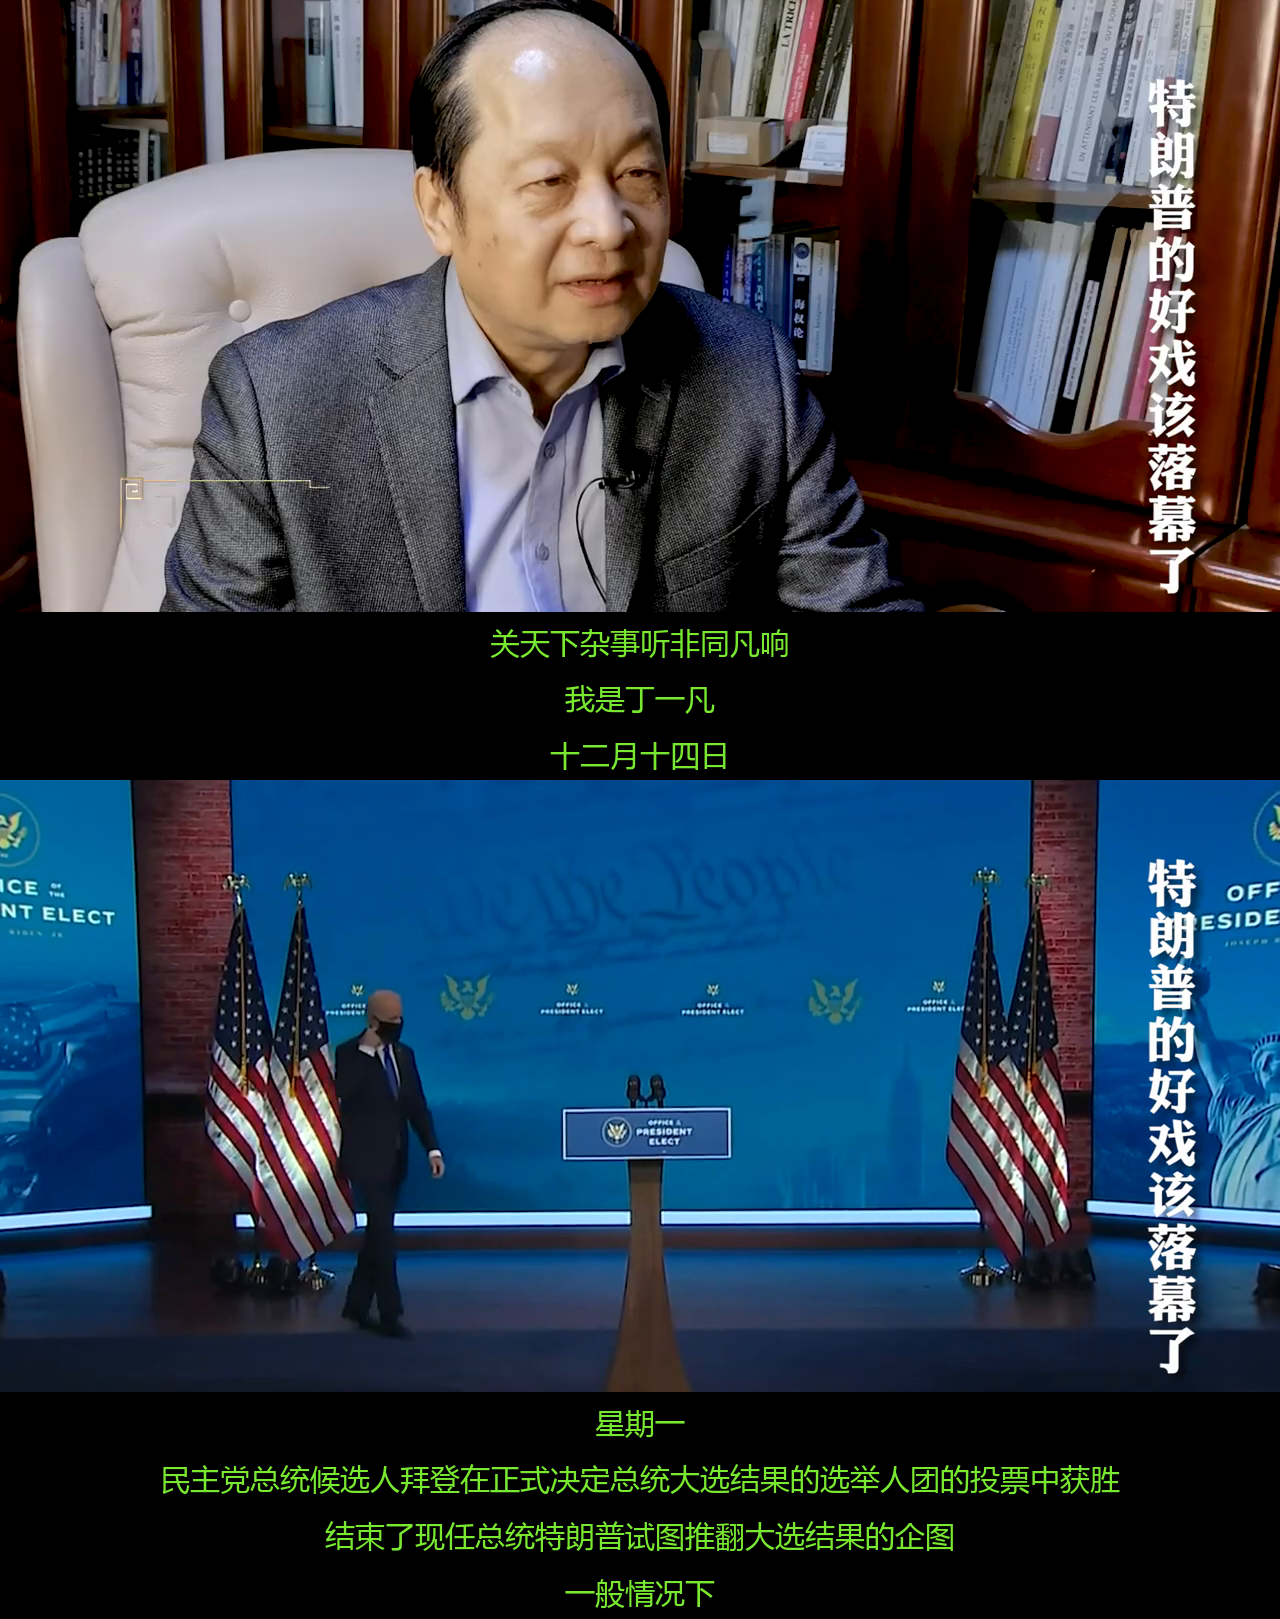

In [223]:
result_img

In [91]:
# 逐步高度
h_params = 0
for i, m in enumerate(subs_imgs):
    result_img.paste(m,box=(0,h_params))
    h_params += m.size[1]
    print(h_params)

612
684
756
828
900
1512
1584
1656
1728
1800


In [92]:
m.size

(1280, 72)

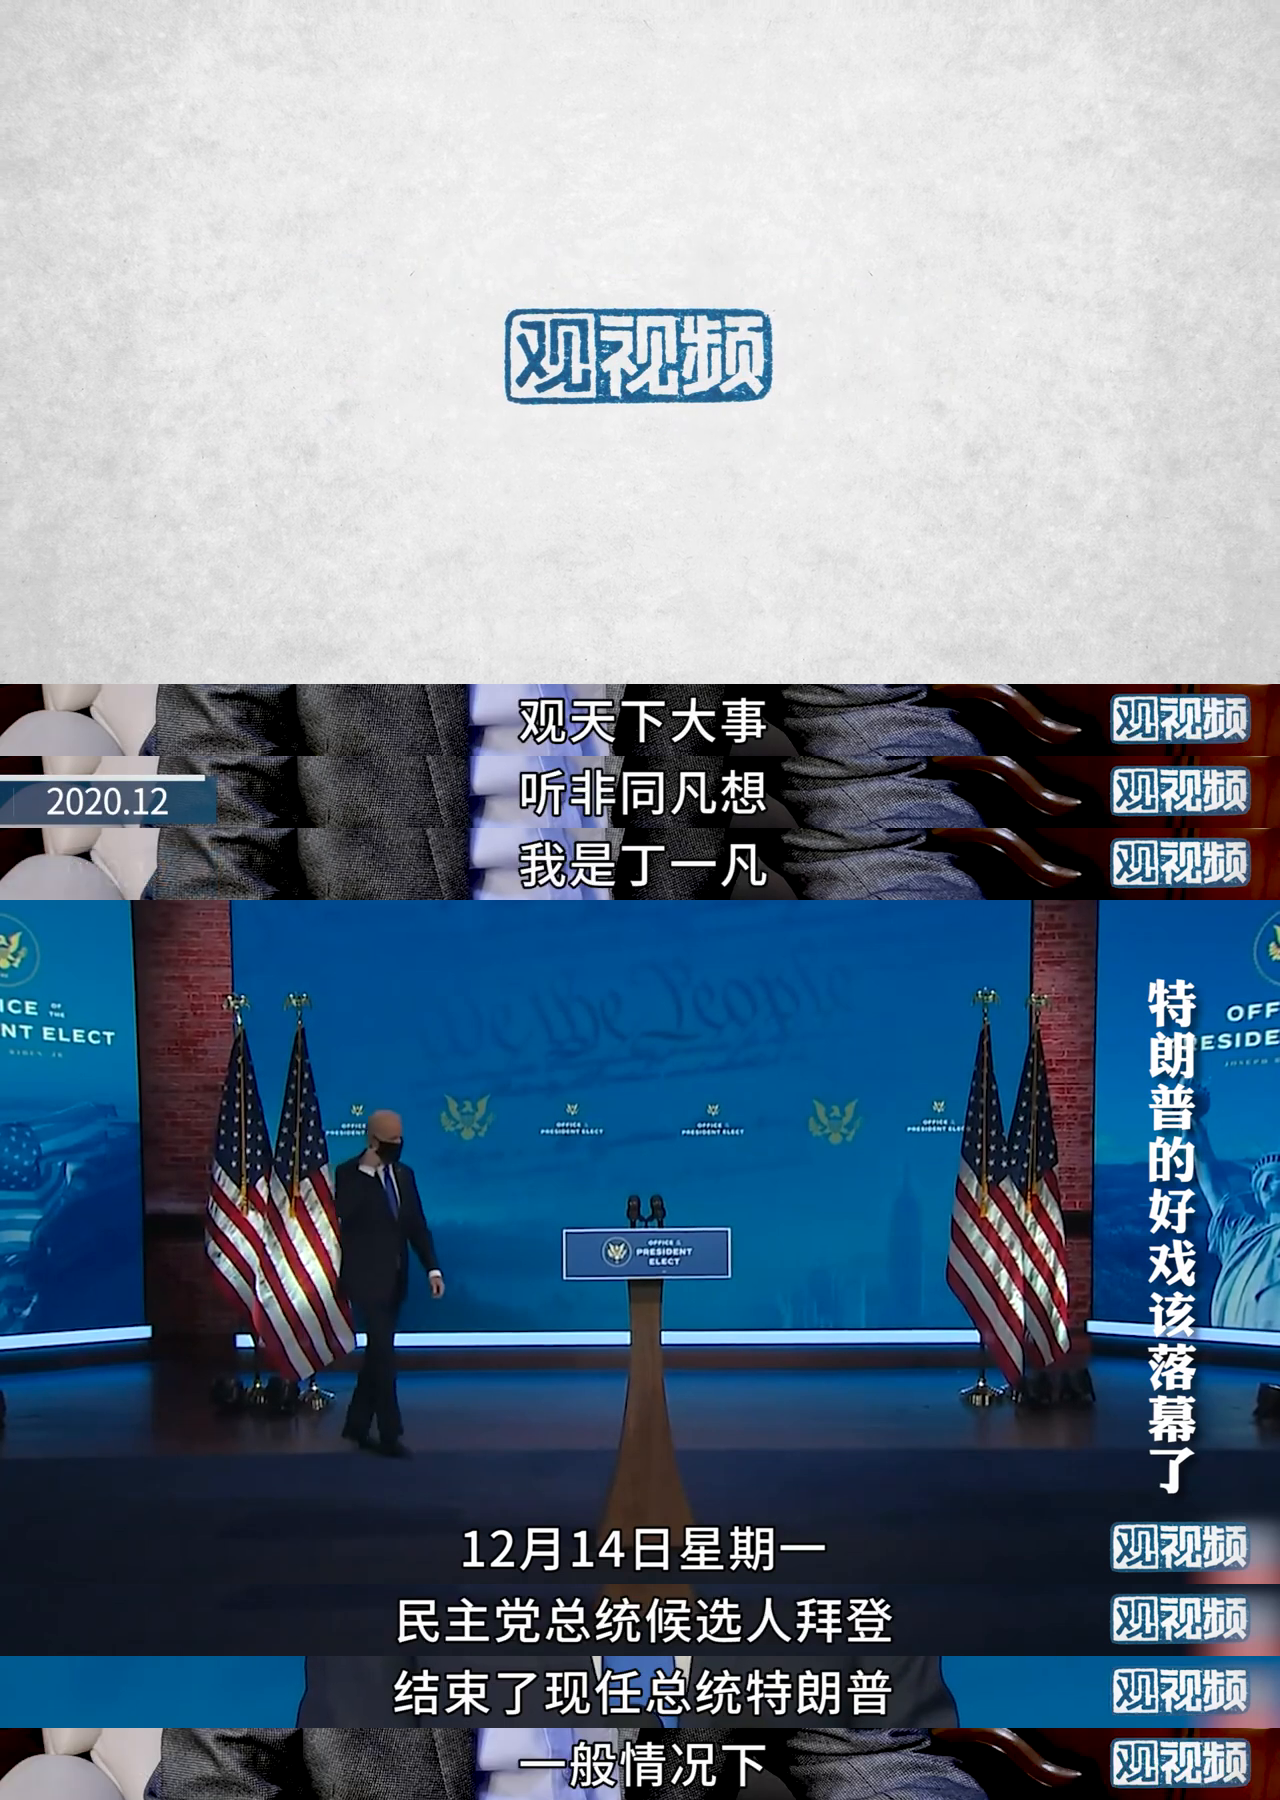

In [93]:
result_img

In [55]:
Image.new??

In [148]:
box_dict,box_bg_img = get_img_size(result_list,box_img_ratio,box_srt_ratio)

NameError: name 'box_img_ratio' is not defined

In [149]:
box_bg_img

(1280, 1728)

### 字幕拼接

In [136]:
from PIL import ImageFont,ImageDraw,Image

In [ ]:
box_img_ratio_

In [ ]:
result_combaine_list = []
for d in result_list:
    if d['type'] == 'cover':
        

In [ ]:
def

In [ ]:
subs_imgs = [img_crop(img_name=d['img'],types=d['type'],box=box_dict) for d in result_list]

In [144]:
result_list

[{'type': 'cover',
  'content': '关天下杂事听非同凡响',
  'img': '../data/观视频/imgs/9.72_12.6_0.png'},
 {'type': 'srt',
  'content': '关天下杂事听非同凡响',
  'img': '../data/观视频/imgs/9.72_12.6_0.png'},
 {'type': 'srt',
  'content': '我是丁一凡',
  'img': '../data/观视频/imgs/12.6_14.02_0.png'},
 {'type': 'srt',
  'content': '十二月十四日',
  'img': '../data/观视频/imgs/14.18_15.62_0.png'},
 {'type': 'cover',
  'content': '星期一',
  'img': '../data/观视频/imgs/15.62_16.34_0.png'},
 {'type': 'srt',
  'content': '星期一',
  'img': '../data/观视频/imgs/15.62_16.34_0.png'},
 {'type': 'srt',
  'content': '民主党总统候选人拜登在正式决定总统大选结果的选举人团的投票中获胜',
  'img': '../data/观视频/imgs/16.34_24.02_0.png'},
 {'type': 'srt',
  'content': '结束了现任总统特朗普试图推翻大选结果的企图',
  'img': '../data/观视频/imgs/24.02_29.48_0.png'},
 {'type': 'srt',
  'content': '一般情况下',
  'img': '../data/观视频/imgs/29.81_31.295_0.png'}]

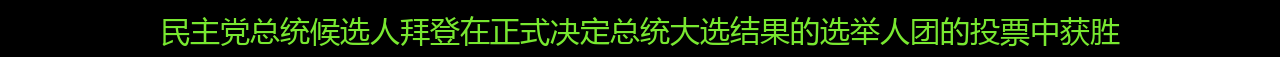

In [198]:
generate_content_img(content,width,fontsize=30)

In [146]:
content = '民主党总统候选人拜登在正式决定总统大选结果的选举人团的投票中获胜'

In [180]:
font = ImageFont.truetype('./fonts/msyh.ttc',30)

In [181]:
width = box_bg_img[0]

In [194]:
srt_gap = 7

In [182]:
w, h = font.getsize(content)

In [189]:
bg = Image.new('RGB', (width, h+srt_gap ), color=(0,0,0))

In [190]:
# 创建一个可以在给定图像上绘图的对象
draw = ImageDraw.Draw(bg)

In [191]:
draw.text(((width-w)/2, 0), content, fill="#78e830", font=font)

In [192]:
draw=ImageDraw.Draw(bg,"RGB")

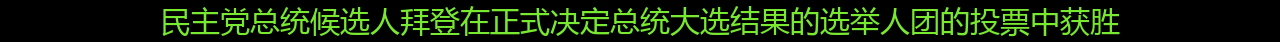

In [193]:
bg